<a href="https://colab.research.google.com/github/DavidRodriguezEdel/Fake_news/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U gensim

     |████████████████████████████████| 24.2MB 1.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=35012ba6110b7c991e0c96206993366faaba4c382651f88a0c5152e992346286
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
pip install q keras==2.3.0

     |████████████████████████████████| 378kB 15.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [ ]:
!git clone https://github.com/shantnu/FaceDetect.git

Cloning into 'FaceDetect'...
remote: Enumerating objects: 64, done.
remote: Total 64 (delta 0), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (64/64), done.


In [ ]:
pip install h5py

In [ ]:
pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 26kB/s 
     |████████████████████████████████| 3.0MB 59kB/s 
     |████████████████████████████████| 460kB 52.5MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.models import load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Embedding, GRU
from keras.utils import np_utils, to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.initializers import Constant
from keras.layers.merge import Concatenate
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping

#from tensorflow.python.framework import tensor_util

from tensorflow.python.client import device_lib

from scipy.special import expit as sigmoid
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn import model_selection

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from itertools import chain, repeat

import gensim
from gensim import corpora
from gensim.models import Word2Vec

import re
import tweepy
from tweepy import OAuthHandler

import json
import wget

import multiprocessing as mp

import pickle

import os

from google.colab.patches import cv2_imshow

from random import uniform

import tensorflow as tf

from collections import Counter
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3491832548202850522, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12227039758295017457
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
keras.__version__

'2.3.0'

In [ ]:
mp.cpu_count()

2

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link1 = 'https://drive.google.com/open?id=1G76KilGfD2AElVSns5oeRhk1BQs7ABsk' #BuzzFeed_fake_news_content.csv
link2 = 'https://drive.google.com/open?id=1G9svZyD-DT66KehmZQAnBzuCdMzjJSWS' #BuzzFeed_real_news_content.csv
link3 = 'https://drive.google.com/open?id=1YNp3BL322nWuGhkxpJcpNE5CO7dDBepJ' #PolitiFact_fake_news_content.csv
link4 = 'https://drive.google.com/open?id=1S5JulHUKCg2ffHPikGYLlQzFiB4-Q-pR' #PolitiFact_real_news_content.csv
link5 = 'https://drive.google.com/open?id=1v6O87fMxSypqOCqUT2gZqiu4lsHziXgj' #binary_tweets.csv (just describing verified and non verified profiles)
link6 = 'https://drive.google.com/open?id=1RsJGVx3dV37RVqP8Hvjxl2Ogsa3avakT' #multiclass_tweets.csv (describing whether the tweet is propaganda, Clickbait, satire or hoax)
link7 = 'https://drive.google.com/open?id=1B_bGeSkwU5EWd8z06_wNbLbgPgDiFNxr' #cred_event_SearchTweets.csv
link8 = 'https://drive.google.com/open?id=1Rj5XTH68yf-YTKck2WiO_QDwxNWIJhXM' #cred_event_TurkRatings.csv
link9 = 'https://drive.google.com/open?id=1HfSm065-fk1BRTnqi838bTVL2aOhB4__' #eventNonEvent_annotations.csv
link10 = 'https://drive.google.com/open?id=1ZRWc6wsGqW94yyr9iAGnvYrSdaeLw354' #en_scheme_annotations.json - Source Tweets
link11 = 'https://drive.google.com/open?id=1ofE644O-YhADWZOXZEEwIb3k4RBzI23q' #bintweets3.csv
link12 = 'https://drive.google.com/open?id=1NG_duE3M4Y6DYwvlbVqaZihj-h0TOzZD' #cred_slicetx3.csv
link13 = 'https://drive.google.com/open?id=1VtruUSC8XNCPGfZaYpa5RAslkGWuK3TQ' #cred1x_target.pkl
link14 = 'https://drive.google.com/open?id=1X-Zua05BlQxuMMpqhRof9pGrL1nK0PAX' #Phemen_direct_replies.csv
link15 = 'https://drive.google.com/open?id=1qJMtY5YTjA2a1exsrL_piEs9qgvNRHWN' #bintweets4.csv
link16 = 'https://drive.google.com/open?id=1a7mP7GjoTwFOugKyJFx-BmiI-SgyKqQk' #padded_cred_total.pkl
link17 = 'https://drive.google.com/open?id=1dh-L3n-u3BBejx7eYM3pUXOlXtzdjKZp' #credt1_xt.csv
link18 = 'https://drive.google.com/open?id=1Ju4NhYbDmHtr7hEx5MxtS6IxhMMiABRC' #cred1x_embeddings.txt
link19 = 'https://drive.google.com/open?id=1IqnnQC-3xNV_-_U2Vk36dqmzMjankz_o' #Buzz_embeddings.txt
link20 = 'https://drive.google.com/open?id=16tf5bwEHhZoozlqzYqGN901LZcqrPF29' #bintweets_embeddings.txt
link21 = 'https://drive.google.com/open?id=1wwkd5mEN8Mr_5sntZSmxcOFMj4Q-eiCH' #cred1x_content.pkl
link22 = 'https://drive.google.com/open?id=10dctsXHoDQgPWy2MLvmxG_7DNLF1Km1n' #glove.twitter.27B.100d.txt
link23 = 'https://drive.google.com/open?id=18RNJCrZ2rqqRYKyxoPqQQs8fxbHZAfel' #glove.6B.100d.txt
link24 = 'https://drive.google.com/open?id=15KXYsN6_6_SdfZF9-Z0i-gxeUSarUhqx' #padded_B.pkl
link25 = 'https://drive.google.com/open?id=1Bswv6gdimAdFUxa94ZHo0bMkNW4XoM4W' #veracity_B.pkl
link26 = 'https://drive.google.com/open?id=1KZpuZ53yz4S66_XJP--M5qR9cPZ3m1Gm' #padded_bint.pkl
link27 = 'https://drive.google.com/open?id=1b_D6BT655b8HGk0qVZnAhFsUnH8g70-a' #veracity_bint.pkl
link28 = 'https://drive.google.com/open?id=1sL5nd9xO6wTnMPTTOO-IeL3aVVoyOTCR' #veracity_bint2.pkl
link29 = 'https://drive.google.com/open?id=1kwy4DDl4hNdcUjcIUMmWoSWut22g6WZM' #cred_slicetx4.csv
link30 = 'https://drive.google.com/open?id=1C5gaydBD3liAHUAnu-yTBAONduF6hVgo' #veracity_cred_total.pkl
link31 = 'https://drive.google.com/open?id=1P5PCOERlAJ4_XK9NIXHS6uaKn2_eviJI' #model_Buzz2_weights.h5
link32 = 'https://drive.google.com/open?id=18sb-AQ7xp7xPt-lHyebUMUhp2bNonC6_' #model_bint.hdf5
link33 = 'https://drive.google.com/open?id=1SmjCfTi5dwnzj_Z6_8H7rpJcRc7rGpUx' #bintweets5.csv
link35 = 'https://drive.google.com/open?id=1qN_lrgeIchc7UGlmQO0QMS0Vo4FDnO2S' #cred_slice.csv
link36 = 'https://drive.google.com/open?id=1D6plsIIreE5fXBFydtlmCLQ3pywNfQFc' #cred_slicetx1.csv
link37 = 'https://drive.google.com/open?id=13kSykwuI4p990_6qM_jKTMO9ZLcXNvLV' #Buzz.csv

In [ ]:
fluff, id1 = link1.split('=')
fluff, id2 = link2.split('=')
fluff, id3 = link3.split('=')
fluff, id4 = link4.split('=')
fluff, id5 = link5.split('=')
fluff, id6 = link6.split('=')
fluff, id7 = link7.split('=')
fluff, id8 = link8.split('=')
fluff, id9 = link9.split('=')
fluff, id10 = link10.split('=')
fluff, id11 = link11.split('=')
fluff, id12 = link12.split('=')
fluff, id13 = link13.split('=')
fluff, id14 = link14.split('=')
fluff, id15 = link15.split('=')
fluff, id16 = link16.split('=')
fluff, id17 = link17.split('=')
fluff, id18 = link18.split('=')
fluff, id19 = link19.split('=')
fluff, id20 = link20.split('=')
fluff, id21 = link21.split('=')
fluff, id22 = link22.split('=')
fluff, id23 = link23.split('=')
fluff, id24 = link24.split('=')
fluff, id25 = link25.split('=')
fluff, id26 = link26.split('=')
fluff, id27 = link27.split('=')
fluff, id28 = link28.split('=')
fluff, id29 = link29.split('=')
fluff, id30 = link30.split('=')
fluff, id31 = link31.split('=')
fluff, id32 = link32.split('=')
fluff, id33 = link33.split('=')
fluff, id35 = link35.split('=')
fluff, id36 = link36.split('=')
fluff, id37 = link37.split('=')
print (id1) # Verify that you have everything after '='
print (id2)
print (id3)
print (id4)
print (id5)
print (id6)
print (id7)
print (id8)
print (id9)
print (id10)
print (id11)
print (id12)
print (id13)
print (id14)
print (id15)
print (id17)
print (id16)
print (id19)
print (id20)
print (id21)
print (id22)
print (id23)
print (id24)
print (id25)
print (id26)
print (id27)
print (id28)
print (id29)
print (id30)
print (id31)
print (id32)
print (id33)
print (id35)
print (id36)
print (id37)

1G76KilGfD2AElVSns5oeRhk1BQs7ABsk
1G9svZyD-DT66KehmZQAnBzuCdMzjJSWS
1YNp3BL322nWuGhkxpJcpNE5CO7dDBepJ
1S5JulHUKCg2ffHPikGYLlQzFiB4-Q-pR
1v6O87fMxSypqOCqUT2gZqiu4lsHziXgj
1RsJGVx3dV37RVqP8Hvjxl2Ogsa3avakT
1B_bGeSkwU5EWd8z06_wNbLbgPgDiFNxr
1Rj5XTH68yf-YTKck2WiO_QDwxNWIJhXM
1HfSm065-fk1BRTnqi838bTVL2aOhB4__
1ZRWc6wsGqW94yyr9iAGnvYrSdaeLw354
1ofE644O-YhADWZOXZEEwIb3k4RBzI23q
1NG_duE3M4Y6DYwvlbVqaZihj-h0TOzZD
1VtruUSC8XNCPGfZaYpa5RAslkGWuK3TQ
1X-Zua05BlQxuMMpqhRof9pGrL1nK0PAX
1qJMtY5YTjA2a1exsrL_piEs9qgvNRHWN
1dh-L3n-u3BBejx7eYM3pUXOlXtzdjKZp
1a7mP7GjoTwFOugKyJFx-BmiI-SgyKqQk
1IqnnQC-3xNV_-_U2Vk36dqmzMjankz_o
16tf5bwEHhZoozlqzYqGN901LZcqrPF29
1wwkd5mEN8Mr_5sntZSmxcOFMj4Q-eiCH
10dctsXHoDQgPWy2MLvmxG_7DNLF1Km1n
18RNJCrZ2rqqRYKyxoPqQQs8fxbHZAfel
15KXYsN6_6_SdfZF9-Z0i-gxeUSarUhqx
1Bswv6gdimAdFUxa94ZHo0bMkNW4XoM4W
1KZpuZ53yz4S66_XJP--M5qR9cPZ3m1Gm
1b_D6BT655b8HGk0qVZnAhFsUnH8g70-a
1sL5nd9xO6wTnMPTTOO-IeL3aVVoyOTCR
1kwy4DDl4hNdcUjcIUMmWoSWut22g6WZM
1C5gaydBD3liAHUAnu-yTBAONduF6hVgo
1P5PCOERlAJ4_X

In [ ]:
downloaded1 = drive.CreateFile({'id':id1})
downloaded1.GetContentFile('BuzzFeed_fake_news_content.csv')
Buzzfake = pd.read_csv('BuzzFeed_fake_news_content.csv')

downloaded2 = drive.CreateFile({'id':id2})
downloaded2.GetContentFile('BuzzFeed_real_news_content.csv')
Buzzreal = pd.read_csv('BuzzFeed_real_news_content.csv')

downloaded3 = drive.CreateFile({'id':id3})
downloaded3.GetContentFile('PolitiFact_fake_news_content.csv')
polfake = pd.read_csv('PolitiFact_fake_news_content.csv')

downloaded4 = drive.CreateFile({'id':id4})
downloaded4.GetContentFile('PolitiFact_real_news_content.csv')
polreal = pd.read_csv('PolitiFact_real_news_content.csv')

downloaded5 = drive.CreateFile({'id':id5})
downloaded5.GetContentFile('binary_tweets.csv')
bintweets = pd.read_csv('binary_tweets.csv', header=0)

downloaded6 = drive.CreateFile({'id':id6})
downloaded6.GetContentFile('multiclass_tweets.csv')
multweets = pd.read_csv('multiclass_tweets.csv')

downloaded7 = drive.CreateFile({'id':id7})
downloaded7.GetContentFile('cred_event_SearchTweets.csv')
credevent = pd.read_csv('cred_event_SearchTweets.csv', sep=';', engine='python')

downloaded8 = drive.CreateFile({'id':id8})
downloaded8.GetContentFile('cred_event_TurkRatings.csv')
credturk = pd.read_csv('cred_event_TurkRatings.csv', sep=';', engine='python') # index_col='topic_key',       , skiprows=2

downloaded9 = drive.CreateFile({'id':id9})
downloaded9.GetContentFile('eventNonEvent_annotations.csv')
eventan = pd.read_csv('eventNonEvent_annotations.csv', sep=';')

downloaded10 = drive.CreateFile({'id':id10})
downloaded10.GetContentFile('en_scheme_annotations.csv')
Pheme = pd.read_csv('en_scheme_annotations.csv')

downloaded11 = drive.CreateFile({'id':id11})
downloaded11.GetContentFile('bintweets3.csv')
bintweets2 = pd.read_csv(r'bintweets3.csv', engine='python', sep='\t')

downloaded12 = drive.CreateFile({'id':id12})
downloaded12.GetContentFile('cred_slicetx3.csv')
cred_slicetx2 = pd.read_csv(r'cred_slicetx3.csv', engine='python', sep='\t', index_col=None, dtype='str')

downloaded13 = drive.CreateFile({'id':id13})
downloaded13.GetContentFile('cred1x_target.pkl')

downloaded14 = drive.CreateFile({'id':id14})
downloaded14.GetContentFile('Phemen_direct_replies.csv')
PhemeDir = pd.read_csv(r'Phemen_direct_replies.csv')

downloaded15 = drive.CreateFile({'id':id15})
downloaded15.GetContentFile('bintweets4.csv')
bintweets3 = pd.read_csv(r'bintweets4.csv', engine='python', sep='\t', index_col=None)

downloaded16 = drive.CreateFile({'id':id16})
downloaded16.GetContentFile('padded_cred_total.pkl')

downloaded17 = drive.CreateFile({'id':id17})
downloaded17.GetContentFile('cred1_xt.csv')
cred1x = pd.read_csv(r'cred1_xt.csv', engine='python', sep='\t', index_col=None)

downloaded18 = drive.CreateFile({'id':id18})
downloaded18.GetContentFile('cred1x_embeddings.txt')

downloaded19 = drive.CreateFile({'id':id19})
downloaded19.GetContentFile('Buzz_embeddings.txt')

downloaded20 = drive.CreateFile({'id':id20})
downloaded20.GetContentFile('bintweets_embeddings.txt')

downloaded21 = drive.CreateFile({'id':id21})
downloaded21.GetContentFile('cred1x_content.pkl')

downloaded22 = drive.CreateFile({'id':id22})
downloaded22.GetContentFile('glove.twitter.27B.100d.txt')

downloaded23 = drive.CreateFile({'id':id23})
downloaded23.GetContentFile('glove.6B.100d.txt')

downloaded24 = drive.CreateFile({'id':id24})
downloaded24.GetContentFile('padded_B.pkl')

downloaded25 = drive.CreateFile({'id':id25})
downloaded25.GetContentFile('veracity_B.pkl')

downloaded26 = drive.CreateFile({'id':id26})
downloaded26.GetContentFile('padded_bint.pkl')

downloaded27 = drive.CreateFile({'id':id27})
downloaded27.GetContentFile('veracity_bint.pkl')

downloaded28 = drive.CreateFile({'id':id28})
downloaded28.GetContentFile('veracity_bint2.pkl')

downloaded29 = drive.CreateFile({'id':id29})
downloaded29.GetContentFile('cred_slicetx4.csv')
cred_slicetx3 = pd.read_csv(r'cred_slicetx4.csv', engine='python', sep='\t', index_col=None, dtype='str')

downloaded30 = drive.CreateFile({'id':id30})
downloaded30.GetContentFile('cred1x_target.pkl')

downloaded31 = drive.CreateFile({'id':id31})
downloaded31.GetContentFile('model_Buzz2_weights.h5')

downloaded32 = drive.CreateFile({'id':id32})
downloaded32.GetContentFile('model_bint.hdf5')

downloaded33 = drive.CreateFile({'id':id33})
downloaded33.GetContentFile('bintweets5.csv')
bintweets4 = pd.read_csv(r'bintweets5.csv', engine='python', sep='\t', index_col=None, dtype='str')

downloaded35 = drive.CreateFile({'id':id35})
downloaded35.GetContentFile('cred_slice.csv')
cred_slice = pd.read_csv(r'cred_slice.csv', engine='python', sep='\t', index_col=None, dtype='str')

downloaded36 = drive.CreateFile({'id':id36})
downloaded36.GetContentFile('cred_slicetx1.csv')
cred_slicetx1 = pd.read_csv(r'cred_slicetx1.csv', engine='python', sep='\t', index_col=None, dtype='str')

downloaded37 = drive.CreateFile({'id':id37})
downloaded37.GetContentFile('Buzz.csv')
Buzz = pd.read_csv(r'Buzz.csv', engine='python', sep='\t', index_col=None, dtype='str')
#encoding='utf-8', header=None,  sep='\s+|;', engine='python') #error_bad_lines=False, warn_bad_lines=False, index_col=False

In [ ]:
#TODO: set 'access_token' and 'access_token_secret' to x
consumer_key = 'ATZCP5COyOIxkMc7MFFZC2mJR'
consumer_secret = 'giEPIR2fO3rbeisBRkAyDiHbNRIlnUPRMGE7gt2ASY1n9Zptxi'
#access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
#access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

try:
  # create OAuthHandler object 
  auth = OAuthHandler(consumer_key, consumer_secret) 
  # set access token and secret 
  auth.set_access_token(access_token, access_token_secret) 
  # create tweepy API object to fetch tweets 
  api = tweepy.API(auth)
except:
  print("Error: Authentication Failed")

##'Buzzfake'

At this point I start the exploration of the data. I start with the data set `Buzzfake` (i.e. the fake news collected by *Kumun Chahuan*.)

**Data exploration and data cleaning**

In [ ]:
Buzzfake.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,veracity
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ...",0
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis...",0
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi...",0
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ...",0
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty...",0


In [ ]:
Buzzfake['veracity'] = 0

In [ ]:
print(Buzzfake.iloc[0,2])

I woke up this morning to find a variation of this headline splashed all over my news feed:

Bill Clinton: ‘Natural’ For Foundation Donors to Seek Favors

Here’s Google:

Naturally, my reaction was “oh, s**t, what did Bill Clinton do to damage his wife’s campaign now?”

Of course, the headline sounds really, really awful. It plays right into the idea that the Clinton Foundation is all about pay to play, just like Donald Trump has been saying all along. Unfortunately, it takes reading beyond the headlines, which is something most people don’t do, to find out the real story – and the real story is that there is no pay to play.

“It was natural for people who’ve been our political allies and personal friends to call and ask for things. And I trusted the State Department wouldn’t do anything they shouldn’t do,” Clinton told NPR in an interview that aired Monday morning. Source: CNN

In other words, people can ask for favors, but that certainly doesn’t mean they’ll get them. Leaked emails h

Just by looking through the data set, one regards that there are some items that are not of interestfor the research. Hence, I solely will consider the items `title` and `text`.

In [ ]:
Buzzfake.loc[Buzzfake.duplicated(keep='last'), :].sum()

id                0.0
title             0.0
text              0.0
url               0.0
top_img           0.0
authors           0.0
source            0.0
publish_date      0.0
movies            0.0
images            0.0
canonical_link    0.0
meta_data         0.0
dtype: float64

In [ ]:
Buzzfake.isnull().sum()

id                 0
title              0
text               0
url                8
top_img           10
authors           34
source             8
publish_date      14
movies            70
images            10
canonical_link    11
meta_data          0
dtype: int64

In [ ]:
Buzzfake.dtypes

id                object
title             object
text              object
url               object
top_img           object
authors           object
source            object
publish_date      object
movies            object
images            object
canonical_link    object
meta_data         object
dtype: object

In [ ]:
Buzzfake.duplicated(subset=['authors']).sum()

60

In [ ]:
Buzzfake.duplicated(subset=['text']).sum()

4

In [ ]:
Buzzfake.duplicated(subset=['url']).sum()

6

In [ ]:
Buzzfake.duplicated(subset=['text', 'authors']).sum()

4

In [ ]:
Buzzfake.drop_duplicates(subset=['text', 'authors'], inplace=True)

In [ ]:
Buzzfake.shape

(87, 12)

In [ ]:
print(Buzzfake.iloc[66, 2]) #2=text, 5=author

Philip Hodges,View All Posts


In [ ]:
print(Buzzfake.authors.value_counts())

Terresa Monroe-hamilton                                                                          6
Cassy Fiano                                                                                      4
Grant Stern,Brett Bose,Natalie Dickinson                                                         4
Tiffiny Ruegner                                                                                  3
Sierra Marlee                                                                                    3
View All Posts                                                                                   3
Martin Lioll,John Falkenberg,Ben Marquis,Kimberly J Smith,Martin Walsh,V Saxena,Benjamin Arie    2
Blair Patterson                                                                                  2
Fed Up                                                                                           2
Wendy Gittleson                                                                                  2
Kevin Jack

In [ ]:
Buzzfake.authors.nunique()

30

##'Buzzreal'

**Data exploration and data cleaning**

Now, I will go through the data set `Buzzreal` (i.e. the real news collected by *Kumun Chauhan*.)

In [ ]:
Buzzreal.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [ ]:
Buzzreal['veracity'] = 1

In [ ]:
print(Buzzreal.iloc[0,2])

On Saturday, September 17 at 8:30 pm EST, an explosion rocked West 23 Street in Manhattan, in the neighborhood commonly referred to as Chelsea, injuring 29 people, smashing windows and initiating street closures. There were no fatalities. Officials maintain that a homemade bomb, which had been placed in a dumpster, created the explosion. The explosive device was removed by the police at 2:25 am and was sent to a lab in Quantico, Virginia for analysis. A second device, which has been described as a “pressure cooker” device similar to the device used for the Boston Marathon bombing in 2013, was found on West 27th Street between the Avenues of the Americas and Seventh Avenue. By Sunday morning, all 29 people had been released from the hospital. The Chelsea incident came on the heels of an incident Saturday morning in Seaside Heights, New Jersey where a bomb exploded in a trash can along a route where thousands of runners were present to run a 5K Marine Corps charity race. There were no ca

In [ ]:
print(Buzzreal.iloc[0,11])

{"description": "\u201cWe believe at this point in this time this was an intentional act,\" de Blasio said. Isn\u2019t \u201can intentional act\u201d terrorism?", "og": {"site_name": "Eagle Rising", "description": "\u201cWe believe at this point in this time this was an intentional act,\" de Blasio said. Isn\u2019t \u201can intentional act\u201d terrorism?", "title": "Another Terrorist Attack in NYC...Why Are we STILL Being Politically Correct", "locale": "en_US", "image": "http://eaglerising.com/wp-content/uploads/2016/09/terrorism-2.jpg", "updated_time": "2016-09-22T10:49:05+00:00", "url": "http://eaglerising.com/36942/another-terrorist-attack-in-nyc-why-are-we-still-being-politically-correct/", "type": "article"}, "robots": "noimageindex", "fb": {"app_id": 256195528075351, "pages": 135665053303678}, "article": {"section": "Political Correctness", "tag": "terrorism", "published_time": "2016-09-22T07:10:30+00:00", "modified_time": "2016-09-22T10:49:05+00:00"}, "viewport": "initial-sca

The data set `Buzzreal` contains the same items as the data set `Buzzfake`. Therefoe I solely will consider the items `title`, `text`, `url` and `authors` here too.

In [ ]:
Buzzreal.shape

(91, 12)

In [ ]:
Buzzreal.loc[Buzzreal.duplicated(keep='last'), :].sum()

id                0.0
title             0.0
text              0.0
url               0.0
top_img           0.0
authors           0.0
source            0.0
publish_date      0.0
movies            0.0
images            0.0
canonical_link    0.0
meta_data         0.0
dtype: float64

In [ ]:
Buzzreal.isnull().sum()

id                 0
title              0
text               0
url                0
top_img            0
authors            7
source             0
publish_date      35
movies            87
images             0
canonical_link     1
meta_data          0
dtype: int64

In [ ]:
Buzzreal.dtypes

id                object
title             object
text              object
url               object
top_img           object
authors           object
source            object
publish_date      object
movies            object
images            object
canonical_link    object
meta_data         object
dtype: object

In [ ]:
Buzzreal.duplicated(subset=['authors']).sum()

25

In [ ]:
Buzzreal.duplicated(subset=['text']).sum()

0

In [ ]:
Buzzreal.duplicated(subset=['url']).sum()

0

In [ ]:
print(Buzzreal.authors.value_counts())

Jack Shafer,Louis Nelson                                      5
Jack Shafer,Nolan D                                           4
Philip Hodges,View All Posts                                  3
Terresa Monroe-hamilton                                       2
Kevin Liptak,Cnn White House Producer                         2
                                                             ..
Steven Shepard                                                1
Abc News                                                      1
Edward-isaac Dovere,Eli Stokols,Politico Staff,Jack Shafer    1
Deirdre Walsh,Cnn Senior Congressional Producer               1
John Parkinson,More John,Abc News,More Alexander              1
Name: authors, Length: 65, dtype: int64


In [ ]:
Buzzreal.authors.nunique()

65

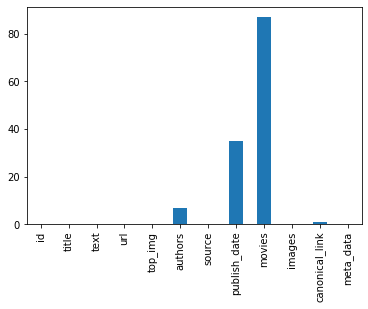

In [ ]:
%matplotlib inline
Buzzreal.isnull().sum().plot(kind='bar')

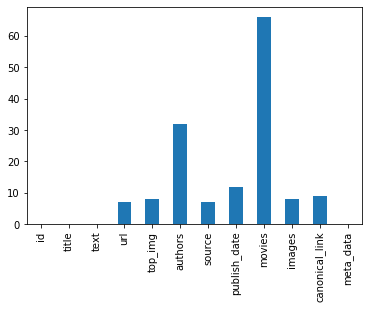

In [ ]:
Buzzfake.isnull().sum().plot(kind='bar')

After having explored and cleaned both data sets `Buzzreal` and `Buzzfake`, I concatenated both data sets to the data set `Buzz` which includes 1 in the column `veracity` for the rows of the data set `Buzzreal` and 0 in this column for the rows of the data set `Buzzfake`.

In [ ]:
Buzz = pd.concat([Buzzreal, Buzzfake], keys=['Buzzreal', 'Buzzfake'], axis=0, ignore_index=True)

In [ ]:
Buzz.to_csv('Buzz.csv', sep='\t', encoding='utf-8', index=True, header=True)

In [ ]:
Buzz.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,veracity
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",1
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",1
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",1
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b...",1
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict...",1


In [ ]:
Buzz.shape

(178, 13)

In [ ]:
Buzz.duplicated(subset=['text']).sum()

0

In [ ]:
print(Buzz.authors.value_counts())

Terresa Monroe-hamilton                     8
Cassy Fiano                                 6
Jack Shafer,Louis Nelson                    5
Sierra Marlee                               5
Grant Stern,Brett Bose,Natalie Dickinson    5
                                           ..
Nick Gass,Madeline Conway,Jack Shafer       1
Abc News                                    1
Laura Koran                                 1
Stephen D Foster Jr                         1
View All Posts,Matt Barber                  1
Name: authors, Length: 90, dtype: int64


In [ ]:
Buzz[Buzz.duplicated(subset=['authors'])]

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,veracity
5,Real_14-Webpage,CHAOS! NC Protest MOB Ambushes Female Truck Dr...,CHAOS! NC Protest MOB Ambushes Female Truck Dr...,http://rightwingnews.com/black-lives-matter/ch...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474473199000},https://www.youtube.com/embed/7LUv7x5bXV4,http://rightwingnews.com/wp-content/uploads/wo...,http://rightwingnews.com/black-lives-matter/ch...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",True
20,Real_28-Webpage,“How Can we LEAD When we Can’t Even Control Ou...,"Donald Trump was in Pittsburgh, Pennsylvania T...",http://eaglerising.com/36966/trump-how-can-we-...,http://eaglerising.com/wp-content/uploads/2016...,"Philip Hodges,View All Posts",http://eaglerising.com,{'$date': 1474615804000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36966/trump-how-can-we-...,"{""description"": ""\""There is no compassion in t...",True
23,Real_30-Webpage,"Obama wears hat, breaking ‘Politics 101’ rule ...","Obama wears hat, breaking ‘Politics 101’ rule ...",http://politi.co/2dbESny,http://v.politico.com/images/1155968404/201609...,"Jack Shafer,Louis Nelson",http://politi.co,{'$date': 1474908937000},NaN,http://v.politico.com/images/1155968404/201609...,http://www.politico.com/story/2016/09/barack-o...,"{""description"": ""The president was given the h...",True
26,Real_33-Webpage,NC State Troopers Take A Knee Before Protectin...,NC State Troopers Take A Knee Before Protectin...,http://rightwingnews.com/black-lives-matter/nc...,http://rightwingnews.com/wp-content/uploads/20...,Terresa Monroe-hamilton,http://rightwingnews.com,{'$date': 1474655224000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/black-lives-matter/nc...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",True
30,Real_37-Webpage,Donna Brazile slams Trump for not apologizing ...,Donna Brazile said Trump’s hectoring of Americ...,http://politi.co/2cSX97k,http://static.politico.com/b5/be/fed7973e4fcb9...,"Jack Shafer,Louis Nelson",http://politi.co,{'$date': 1474974570000},NaN,http://static.politico.com/b5/be/fed7973e4fcb9...,http://www.politico.com/story/2016/09/trump-de...,"{""description"": ""\u201cI think it's a shame we...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Fake_87-Webpage,BREAKING: Steps to FORCE FBI Director Comey to...,BREAKING: Steps to FORCE FBI Director Comey to...,http://rightwingnews.com/hillary-clinton-2/bre...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474907754000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/hillary-clinton-2/bre...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",False
173,Fake_88-Webpage,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,http://rightwingnews.com/hillary-clinton-2/hil...,http://rightwingnews.com/wp-content/uploads/20...,Terresa Monroe-hamilton,http://rightwingnews.com,{'$date': 1474912025000},NaN,http://1.gravatar.com/avatar/d35b77ff6c3900715...,http://rightwingnews.com/hillary-clinton-2/hil...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",False
174,Fake_89-Webpage,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,http://conservativetribune.com/lester-holt-lie...,http://conservativetribune.com/wp-content/uplo...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,{'$date': 1474934400000},https://www.youtube.com/embed/ThwaDSaoGU8?feat...,http://conservativetribune.com/wp-content/uplo...,http://conservativetribune.com/lester-holt-lie...,"{""description"": ""People are already calling th...",False
175,Fake_9-Webpage,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is .

In [ ]:
Buzz.shape

(178, 13)

Here, I joined the values of both columns `authors` and `text` in a separeted data frame `B_features` and defined a separated data frame `B_target` with the column `veracity`. Hence I converted the data type of the values of the data frame `B_target` to integers.

In [ ]:
Buzz.loc[:, 'authors'] = Buzz.authors.fillna("")

In [ ]:
B_features = Buzz['text'] + ' ' + Buzz['title']
B_target = Buzz['veracity']

In [ ]:
B_target = B_target.astype(int)

In [ ]:
B_target.describe()

count    178.000000
mean       0.511236
std        0.501284
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: veracity, dtype: float64

**NLP model with Word2Vec**

I developed the function `preprocess_Buzz()` in order to extract all the stop words, fill all the `None` values with spaces, extract all the characters which were not alphanumeric, tokenize, lower and lemmatize the words included in the features. As a result one obtains a list of lists that contains all the words included in an article of this data set.

In [ ]:
def preprocess_Buzz(features):
  from nltk.corpus import stopwords
  lemmatizer = WordNetLemmatizer() #groups different inflected forms of a word
  stop_words = stopwords.words("english")
  stop_words.append('u')
  stemmer = PorterStemmer()

  features.loc[:, 'text'] = features.text.fillna("")
  features.loc[:, 'text'] = features.apply(lambda row: re.sub('[^a-zA-z]', ' ', row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word.lower() for word in row['text'] if word.isalpha()], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word for word in row['text'] if word not in stop_words], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['text']], axis=1)

  articles = features['text'].tolist()

  return articles

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

clean_sentences = preprocess_Buzz(Buzz)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Here in introduced a tokenizer object which sets an index to all the words included in the list of lists. Afterward, the each word is assigned to a number and the length of the longestarticle is computed. Having these both variables it is possible to padd the articles, i.e. that the articles are filled with zeros and only contain the numbers of the words used in this article at the corresponding position to the number of the word.

In [ ]:
tokenizer_obj = Tokenizer()

In [ ]:
tokenizer_obj.fit_on_texts(clean_sentences)
seq = tokenizer_obj.texts_to_sequences(clean_sentences)

In [ ]:
longest_article_B = Buzz['text'].apply(len).max()
print(longest_article_B)

2862


In [ ]:
longest_article_B = 2862

In [ ]:
padded_B = pad_sequences(seq, longest_article_B)

In [ ]:
padded_B[0]

array([  0,   0,   0, ..., 566, 643, 134], dtype=int32)

In [ ]:
print(padded_B.shape)
print(B_target.shape)

(178, 2862)
(178,)


Here, I split both the features and the target variable into train and test sets. For this target I used the function `split_data()`

In [ ]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    return X_train, X_test, y_train, y_test

In [ ]:
X_trainB, X_testB, y_trainB, y_testB = split_data(padded_B, B_target)

Paralelly to that, I defined the embedding model applying `Word2Vec` to the whole set of clean articles. I defined the embedding with 100 dimensions and for a window of 10 words which makes the model to look 10 words before and 10 words after the regarded word in order to compute the co-occurances of it.

In [ ]:
model_w2v = Word2Vec(clean_sentences,
                     min_count = 1,
                     window = 10,
                     iter = 10,
                     size = 100,
                     workers = 4)
print(model_w2v)

Word2Vec(vocab=8813, size=100, alpha=0.025)


In [ ]:
words = list(model_w2v.wv.vocab)

In [ ]:
print(model_w2v['trump'])

[-1.0754883   0.7596911   0.607671   -0.45054674  1.370487    1.594455
  0.7854538   0.40384352 -2.7981198  -0.26622754 -0.83840716  0.45572746
  1.1974187   0.8117424   0.23113973 -0.00629416 -0.29830238  0.14923005
  0.12444529  0.5615498   0.39486006 -0.19531468  0.11406942  1.0730743
 -1.424621   -1.3444237   1.664702    0.2617463  -0.05840329  0.49250212
 -0.85220367  0.5177567   1.2405137   0.37294975  0.72869897  0.88955724
  0.3297652   1.0837849  -1.3770236   0.57376987  0.36764786 -1.577209
  0.8682806  -0.6327553   1.1334246   0.5321368   0.44246927  0.16765358
 -1.8899496   1.210166    0.02981145 -1.4068396  -0.32812038  0.14100939
  0.58646506 -0.27113104  0.66998225  0.82527006 -0.66922545  0.6903075
 -1.5576602   0.4496288   0.31250277  0.4650049   0.88986486  0.50143015
  0.6139626   0.288488    0.8465587   0.01246956 -0.6501745  -1.7230277
 -1.0063475   0.475779   -2.3806086  -0.48829484 -1.6820648  -0.62256145
  1.8747865   0.27378628 -0.49355283  0.8541839  -0.398578

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(words[0:10])

['saturday', 'september', 'pm', 'est', 'explosion', 'rocked', 'west', 'street', 'manhattan', 'neighborhood']


In [ ]:
model_w2v.wv.most_similar('trump', topn=10)

[('clinton', 0.9997836351394653),
 ('presidential', 0.9996762275695801),
 ('nominee', 0.9995394349098206),
 ('donald', 0.9995017051696777),
 ('checking', 0.9991528391838074),
 ('debate', 0.9991449117660522),
 ('hillary', 0.9990779161453247),
 ('barack', 0.9989476799964905),
 ('highlight', 0.9987534284591675),
 ('secretary', 0.9982988238334656)]

In [ ]:
embsB = 'Buzz_embeddings.txt'
model_w2v.wv.save_word2vec_format(embsB, binary=False)

In [ ]:
embeddings_index={}
with open("Buzz_embeddings.txt") as loaded_embs:
    for line in loaded_embs:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:])
        embeddings_index[word]=coefs

In [ ]:
embeddings_index['trump']

array(['-1.0754883', '0.7596911', '0.607671', '-0.45054674', '1.370487',
       '1.594455', '0.7854538', '0.40384352', '-2.7981198', '-0.26622754',
       '-0.83840716', '0.45572746', '1.1974187', '0.8117424',
       '0.23113973', '-0.00629416', '-0.29830238', '0.14923005',
       '0.12444529', '0.5615498', '0.39486006', '-0.19531468',
       '0.114069425', '1.0730743', '-1.424621', '-1.3444237', '1.664702',
       '0.2617463', '-0.05840329', '0.49250212', '-0.85220367',
       '0.5177567', '1.2405137', '0.37294975', '0.72869897', '0.88955724',
       '0.3297652', '1.0837849', '-1.3770236', '0.57376987', '0.36764786',
       '-1.577209', '0.8682806', '-0.6327553', '1.1334246', '0.5321368',
       '0.44246927', '0.16765358', '-1.8899496', '1.210166',
       '0.029811451', '-1.4068396', '-0.32812038', '0.14100939',
       '0.58646506', '-0.27113104', '0.66998225', '0.82527006',
       '-0.66922545', '0.6903075', '-1.5576602', '0.4496288',
       '0.31250277', '0.4650049', '0.88986486', '

In [ ]:
word_index = tokenizer_obj.word_index

In [ ]:
num_wordsB = len(word_index)+1

Here I definde the embedding matrix which includes the embedding weights of each word contained in the articles of the data set `clean_articles`. All the articles create a vocabulary of 8814 different words. Next I define the embedding for the neuronal network using this embedding matrix as input.

In [ ]:
embedding_matrix = np.zeros((num_wordsB, 100))

for word, i in word_index.items():
    if i > num_wordsB:
        continue
    embedding_vector=embeddings_index[word]
    #dealing with words that we have not embeddings for
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector
#embedding_matrix is our lookup table
print(embedding_matrix.shape)
print(num_wordsB)

(8814, 100)
8814


In [ ]:
embedding_Buzz_layer=Embedding(num_wordsB, #size of vocab
                          100, #size of embedding 
                          embeddings_initializer=Constant(embedding_matrix), #weights to start with, and not touch during training
                          input_length=longest_article_B, 
                          trainable=False  # do no update these weights
                         )

In [ ]:
Best 0.508333 using {'optimizer': 'Adagrad'}
Best 0.563462 using {'neuron': 256}
Best 0.483974 using {'dropout_rate': 0.3}
Best 0.516667 using {'optimizer': 'Adagrad', 'neuron': 16, 'dropout_rate': 0.4}

Hence, I defined the neuronal network `model_Buzz` as a function in order to be able to conduct a grid search and a random serach by using a Keras classifier wrapper on it. I defined the model with the embedding layer as input layer, a dropout layer, a LSTM layer, a second dropout layer and finally a dense layer with only one neuron that has to determine whether the article is either `fake` or `real`. Since it is a binary classification between `real` and `fake` news, I used the `sigmoid function` as activation function of the last neuron and  `binary crossentropy` as loss function of the whole model. The previous tuning process of the hyperparameters concluded that the best hyperparameters were a dropout rate of 0.3, to use 256 neurons in the LSTM-layer and to use `Adagrad` as optimizer for the neuronal model.

In [ ]:
def model_Buzz(embedding=embedding_Buzz_layer, dropout_rate=0.3, neuron=256, optimizer='Adagrad'):
  model=Sequential()
  model.add(embedding)
  model.add(Dropout(dropout_rate))
  model.add(LSTM(neuron, recurrent_dropout=0.1))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model_Buzz = KerasClassifier(build_fn=model_Buzz, batch_size=20, nb_epoch=100, verbose=0)

In [ ]:
model_Buzz = model_Buzz()

In [ ]:
model_Buzz.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2862, 100)         881400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2862, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,247,225
Trainable params: 365,825
Non-trainable params: 881,400
_________________________________________________________________


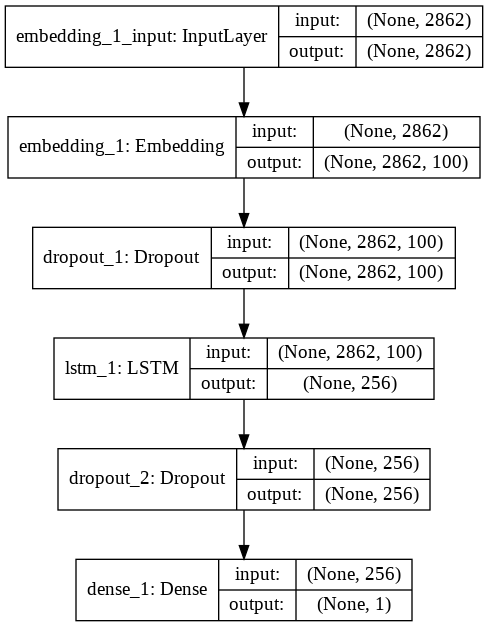

In [ ]:
plot_model(model_Buzz, to_file='model_Buzz.png', show_shapes=True, show_layer_names=True)

In [ ]:
batch_sizes=[10, 20, 40, 60, 80, 100]
param_grid = dict(batch_size=batch_sizes)

In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizers)

In [ ]:
neurons=[16, 32, 64, 128, 256, 512]
param_grid = dict(neuron=neurons)

In [ ]:
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate=dropout_rates)

In [ ]:
grid_Buzz = GridSearchCV(estimator=model_Buzz, param_grid=param_grid, n_jobs=1, cv=10)
grid_Buzz = grid_Buzz.fit(X_trainB, y_trainB)

In [ ]:
print('Best %f using %s' % (grid_Buzz.best_score_, grid_Buzz.best_params_))
means = grid_Buzz.cv_results_['mean_test_score']
stds = grid_Buzz.cv_results_['std_test_score']
params = grid_Buzz.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.483974 using {'dropout_rate': 0.3}
0.451923 (0.122577) with: {'dropout_rate': 0.1}
0.473077 (0.141717) with: {'dropout_rate': 0.2}
0.483974 (0.142367) with: {'dropout_rate': 0.3}
0.442308 (0.146429) with: {'dropout_rate': 0.4}
0.451923 (0.143459) with: {'dropout_rate': 0.5}


In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
neurons=[16, 32, 64, 128, 256, 512]
param_dist_buzz = dict(optimizer=optimizers, dropout_rate=dropout_rates, neuron=neurons)

In [ ]:
n_iter_search=3

In [ ]:
random_search = RandomizedSearchCV(estimator=model_Buzz,
                                   param_distributions=param_dist_buzz,
                                   n_iter=n_iter_search,
                                   n_jobs=1,
                                   cv=10,
                                   verbose=0)

In [ ]:
random_search.fit(X_trainB, y_trainB)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f22dc3d32e8>,
                   iid='deprecated', n_iter=3, n_jobs=1,
                   param_distributions={'dropout_rate': [0.1, 0.2, 0.3, 0.4,
                                                         0.5],
                                        'neuron': [16, 32, 64, 128, 256, 512],
                                        'optimizer': ['SGD', 'RMSprop',
                                                      'Adagrad', 'Adadelta',
                                                      'Adam', 'Adamax']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print('Best %f using %s' % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.516667 using {'optimizer': 'Adagrad', 'neuron': 16, 'dropout_rate': 0.4}
0.451923 (0.143459) with: {'optimizer': 'SGD', 'neuron': 128, 'dropout_rate': 0.5}
0.468590 (0.148005) with: {'optimizer': 'RMSprop', 'neuron': 64, 'dropout_rate': 0.3}
0.516667 (0.162780) with: {'optimizer': 'Adagrad', 'neuron': 16, 'dropout_rate': 0.4}


In [ ]:
Best 0.581410 using {'optimizer': 'Adam', 'neuron': 256, 'dropout_rate': 0.1}
Best 0.489744 using {'batch_size': 20}
Best 0.529487 using {'optimizer': 'RMSprop'}
Best 0.483974 using {'neuron': 64}
Best 0.526923 using {'dropout_rate': 0.1}

In [ ]:
cb_buzz=EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=400, restore_best_weights=True)

In [ ]:
history_Buzz=model_Buzz.fit(X_trainB, y_trainB, batch_size=20, epochs=500, validation_data=(X_testB, y_testB), shuffle=True, callbacks=[cb_buzz], verbose=1)

Train on 124 samples, validate on 54 samples
Epoch 1/500
124/124 [==============================] - 52s 419ms/step - loss: 0.9856 - accuracy: 0.5000 - val_loss: 0.7515 - val_accuracy: 0.4630
Epoch 2/500
124/124 [==============================] - 50s 401ms/step - loss: 0.6902 - accuracy: 0.5242 - val_loss: 0.6884 - val_accuracy: 0.5185
Epoch 3/500
124/124 [==============================] - 50s 403ms/step - loss: 0.6714 - accuracy: 0.5645 - val_loss: 0.6941 - val_accuracy: 0.5185
Epoch 4/500
124/124 [==============================] - 50s 401ms/step - loss: 0.6751 - accuracy: 0.5323 - val_loss: 0.6884 - val_accuracy: 0.5185
Epoch 5/500
124/124 [==============================] - 50s 405ms/step - loss: 0.6684 - accuracy: 0.5968 - val_loss: 0.7066 - val_accuracy: 0.5185
Epoch 6/500
124/124 [==============================] - 50s 406ms/step - loss: 0.6258 - accuracy: 0.6774 - val_loss: 0.6903 - val_accuracy: 0.5370
Epoch 7/500
124/124 [==============================] - 50s 405ms/step - loss: 0

After training the neuronal network with 500 epochs (i.e. iterations) I used a callback in order to save the weights that produced the best accuracy for the validation test. It produced an accuracy of 0.592. The development of the train and test accuracy and from the train and test loss can be seen on the following plots.

In [ ]:
scores_Buzz={}
score_best_Buzz = model_Buzz.evaluate(X_testB, y_testB, verbose=0)
scores_Buzz["Buzz_finetuned"] = score_best_Buzz
print('Test loss:', score_best_Buzz[0])
print('Test accuracy:', score_best_Buzz[1])

Test loss: 1.1915361395588628
Test accuracy: 0.5925925970077515


In [ ]:
def show_history_acc(story, embedding_name):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.figtext(0, 1, embedding_name)
    plt.show()

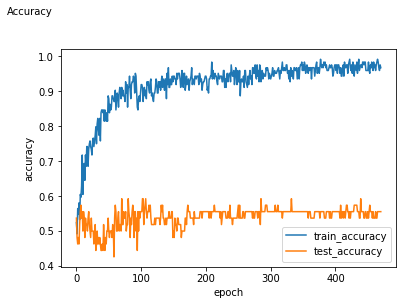

In [ ]:
show_history_acc(history_Buzz, 'Accuracy')

In [ ]:
def show_history_loss(story, embedding_name):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['loss'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'train_loss'], loc='best')
    plt.figtext(0, 1, embedding_name)
    plt.show()

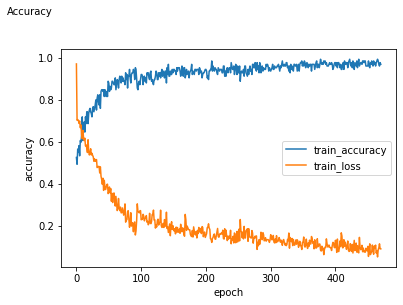

In [ ]:
show_history_loss(history_Buzz, 'Accuracy')

Afterward I set the threshold of 0.5 separating `fake` from `real` news. So I obtained a precision of 0.56 and a recall of 0.56 for the `fake news` and a precision of 0.62 and a recall of 0.62 for the `real news`. The AUC of this model was equal to 0.59

In [ ]:
Buzz_predict = model_Buzz.predict(X_testB)
Buzz_predict = (Buzz_predict>0.5)
#Buzz_predict = [int(x) for x in Buzz_predict]
#Buzz_predict = pd.Series(Buzz_predict, dtype=int)
print('\nClassification report RandomOverSampling:\n', classification_report(y_testB, Buzz_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56        25
           1       0.62      0.62      0.62        29

    accuracy                           0.59        54
   macro avg       0.59      0.59      0.59        54
weighted avg       0.59      0.59      0.59        54



In [ ]:
confusion_matrix(y_testB, Buzz_predict)

array([[14, 11],
       [11, 18]])

In [ ]:
fpr_Buzz, tpr_Buzz, thresholds_Buzz = roc_curve(y_testB, Buzz_predict)

In [ ]:
auc_Buzz = auc(fpr_Buzz, tpr_Buzz)

In [ ]:
auc_Buzz

0.5903448275862069

In [ ]:
model_Buzz.save('model_Buzz.h5')

**Benchmark**

As benchmark I chose the Random Forest Classifier. First of all I conducted both a grid and a random search with the train set. The best hyperparameters were `entropy` as criterion, maximum amount of features according to `log2`, minimum 10 samples per leaf, minimum 4 splits per leaf and 40 estimators.

In [ ]:
rfc = RandomForestClassifier(n_estimators=60)

In [ ]:
param_grid = {'n_estimators':[20, 40, 60, 80, 100],
              'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'min_samples_split':[4],
              'min_samples_leaf':[10]}

In [ ]:
grid_buzz_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_buzz_rfc.fit(X_trainB, y_trainB)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=60, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(grid_buzz_rfc.best_score_)
print(grid_buzz_rfc.best_params_)
MyBestModel_rfc_buzz = grid_buzz_rfc.best_estimator_

0.6480158730158729
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 40}


In [ ]:
MyBestModel_rfc_buzz = RandomForestClassifier(criterion='entropy', max_features='log2', min_samples_leaf=10, min_samples_split=4, n_estimators=40)

In [ ]:
MyBestModel_rfc_buzz.fit(X_trainB, y_trainB)
MyBestModelbuzz_target_pred=MyBestModel_rfc_buzz.predict(X_testB)
MyBestModelbuzz_target_pred[0:5]

array([0, 1, 1, 1, 0])

In [ ]:
buzz_target_matrix = metrics.confusion_matrix(y_testB, MyBestModelbuzz_target_pred)

The Random Forest Classifier produced a precision of 0.5 and a recall of 0.72 for the `fake news` and a precision of 0.61 and a recall of 0.38 for the `real news`. The AUC was equal to 0.549, i.e. smaller to the AUC of the neuronal network model.

In [ ]:
print('Confussion Matrix: \n', buzz_target_matrix)

Confussion Matrix: 
 [[18  7]
 [18 11]]


In [ ]:
print(classification_report(y_testB, MyBestModelbuzz_target_pred))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59        25
           1       0.61      0.38      0.47        29

    accuracy                           0.54        54
   macro avg       0.56      0.55      0.53        54
weighted avg       0.56      0.54      0.52        54



In [ ]:
fpr_rf_Buzz, tpr_rf_Buzz, thresholds_rf_Buzz = roc_curve(y_testB, MyBestModelbuzz_target_pred)
auc_rf_Buzz = auc(fpr_rf_Buzz, tpr_rf_Buzz)

In [ ]:
auc_rf_Buzz

0.5496551724137931

**Roc-curve**

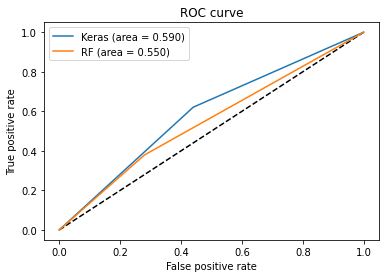

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Buzz, tpr_Buzz, label='Keras (area = {:.3f})'.format(auc_Buzz))
plt.plot(fpr_rf_Buzz, tpr_rf_Buzz, label='RF (area = {:.3f})'.format(auc_rf_Buzz))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##'polfake'

Now I will explore the data set `polfake` which is also contained in the file that Kumun Chahuan let available on the internet. According to the name of the data set I would assume that it contains fake news.

In [ ]:
polfake.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."
3,Real_101-Webpage,America Just Tragically Lost A Country Music I...,We are absolutely heartbroken to hear about th...,http://newsbake.com/entertainment-news/music-e...,http://newsbake.com/wp-content/uploads/2016/05...,Nancy Wells,http://newsbake.com,{'$date': 1474898600000},https://www.youtube.com/embed/8ozTJcu-_BU,http://0.gravatar.com/avatar/0d702c6042933cd78...,http://newsbake.com/entertainment-news/music-e...,"{""shareaholic"": {""site_name"": ""NewsBake"", ""lan..."
4,Real_102-Webpage,Monuments to the Battle for the New South,"Nine years ago, a driver lost control of his p...",http://politi.co/2dd9U1x,http://static.politico.com/25/ed/85332de14c45b...,"Jack Shafer,Lisa Rab",http://politi.co,{'$date': 1473941820000},NaN,http://static.politico.com/25/ed/85332de14c45b...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""Virginia, increasingly divers..."


In [ ]:
print(polfake.iloc[0,2])

16.8k SHARES SHARE THIS STORY

Hillary Clinton just called out the fact that Donald Trump cheered for the housing crisis in anticipation of its collapse – which is absolutely true. Trump told The Globe and Mail in March of 2007: “People have been talking about the end of the cycle for 12 years, and I’m excited if it is. I’ve always made more money in bad markets than in good markets.”

In fact, Trump thought the housing crisis was much-ado-do about nothing for high-end investments, and told investors: “I don’t see the subprime problems affecting the higher-end stuff…In fact, he is advising investors that there are now great deals in buying subprime mortgages at a discount and repossessed houses at low prices.”

Of course, on one level, Trump wasn’t wrong­­—in that the subprime crisis affected mostly poorer Americans who lost their homes and jobs and the ability to support their families. The collapse of home prices caused by the housing bubble cost roughly seven million Americans more 

In [ ]:
polfake.shape

(120, 12)

This data set contains the same items contained in the data sets `Buzzfake` and `Buzzreal` and it has 120 tuples.

##'polreal'

Now I will explore the data set `polreal` which is also  provided by Kumun Chauan and should contain real news.

In [ ]:
polreal.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."
3,Real_101-Webpage,America Just Tragically Lost A Country Music I...,We are absolutely heartbroken to hear about th...,http://newsbake.com/entertainment-news/music-e...,http://newsbake.com/wp-content/uploads/2016/05...,Nancy Wells,http://newsbake.com,{'$date': 1474898600000},https://www.youtube.com/embed/8ozTJcu-_BU,http://0.gravatar.com/avatar/0d702c6042933cd78...,http://newsbake.com/entertainment-news/music-e...,"{""shareaholic"": {""site_name"": ""NewsBake"", ""lan..."
4,Real_102-Webpage,Monuments to the Battle for the New South,"Nine years ago, a driver lost control of his p...",http://politi.co/2dd9U1x,http://static.politico.com/25/ed/85332de14c45b...,"Jack Shafer,Lisa Rab",http://politi.co,{'$date': 1473941820000},NaN,http://static.politico.com/25/ed/85332de14c45b...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""Virginia, increasingly divers..."


In [ ]:
print(polreal.iloc[0,2])

16.8k SHARES SHARE THIS STORY

Hillary Clinton just called out the fact that Donald Trump cheered for the housing crisis in anticipation of its collapse – which is absolutely true. Trump told The Globe and Mail in March of 2007: “People have been talking about the end of the cycle for 12 years, and I’m excited if it is. I’ve always made more money in bad markets than in good markets.”

In fact, Trump thought the housing crisis was much-ado-do about nothing for high-end investments, and told investors: “I don’t see the subprime problems affecting the higher-end stuff…In fact, he is advising investors that there are now great deals in buying subprime mortgages at a discount and repossessed houses at low prices.”

Of course, on one level, Trump wasn’t wrong­­—in that the subprime crisis affected mostly poorer Americans who lost their homes and jobs and the ability to support their families. The collapse of home prices caused by the housing bubble cost roughly seven million Americans more 

After having exploring the items `text` and `id` on both data sets `polfake` and `polreal` I realized that both data sets are identical. Therefore I decided not to use neither of both data sets, since it is impossible to label the tuples.

##'bintweets'

**Data exploration and data cleaning**

Now, I will explore the data set `bintweets` which is contained in the file provided by Volkova et al.(2017).

In [ ]:
bintweets.head()

,user_id,tweet_id,label
0,1495729418,713291759388921857,1
1,4759224608,714837313960878080,1
2,61482996,709767014018056192,1
3,41767207,714280648555372545,1
4,428221173,712533209234464769,1


In [ ]:
bintweets.shape

(131584, 3)

In [ ]:
print(bintweets.label.value_counts())

1    65792
0    65792
Name: label, dtype: int64


The data set contains the items `user_id` and `tweet_id` and each tuple is labeled either as `0` if it is a fake news or as `1` if it is a real news. Moreover, the whole set contains 131584 tuples (65792 of them are fake and thhe other 65792 of them are real news.)

In [ ]:
bintweets.loc[bintweets.duplicated(), :].sum()

user_id    -6459431159659337247
tweet_id    8120838829613896080
label                       659
dtype: int64

In [ ]:
bintweets.duplicated(subset=['tweet_id']).sum()

724

In [ ]:
bintweets.duplicated(subset=['user_id']).sum()

65611

In [ ]:
bintweets.duplicated(subset=['user_id', 'tweet_id']).sum()

724

By looking for duplicated values on the data set `bintweets` one finds 724 diplucated values for the subset `tweet_id`, for the subsets `tweet_id` and `user_id` also 724 duplicated values and 65611 duplicates in the subset `user_id`. Since there could be active twitter users who repeatedly tweet, I will only delete the duplicated values on the subsets `tweet_id` and `tweet_id` together with `user_id`.

In [ ]:
def bin_dupli(tweet):
  tweet.drop_duplicates(inplace=True)
  tweet.drop_duplicates(subset = 'tweet_id', inplace=True)
  tweet.drop_duplicates(subset = ['tweet_id', 'user_id'], inplace=True)
  return tweet

In [ ]:
bintweets = bin_dupli(bintweets)

In [ ]:
print(bintweets.label.value_counts())

0    65727
1    65133
Name: label, dtype: int64


In [ ]:
bintweets.shape

(130860, 3)

**Data preprocessing**

I sorted the rows acording to the label in order to be able to select a similar amount of rows labeled as `fake` and `real`. Subsequently, I picked 7500 rows labeled as `fake` and other 7500 rows labeled as `real` in order to design the data set that contains the features I will analyze.

In [ ]:
def cleanbint(bint):
  bint['text'] = ''
  bint0 = bint.sort_values(by='label', ignore_index=True)
  bint1 = bint0.iloc[0:7500, :]
  bint2 = bint0.iloc[65728:73228, :]
  bint3 = pd.concat([bint1, bint2], keys=['bint1', 'bint2'], axis=0, ignore_index=True)
  return bint3

In [ ]:
bintweets1 = cleanbint(bintweets)
print(bintweets1.label.value_counts())

1    7500
0    7500
Name: label, dtype: int64


In [ ]:
binmess=list(bintweets1.tweet_id)

In [ ]:
len(binmess)

10000

**Downloading tweets**

In order to be able to download the corresponding tweets' messages for the 15000 observations I constructed some methods in order to implement the Twitter API which among others downloads the tweets' content. I implemented many strategies but at the end I decided to keep using the method `getMessages2` which downloads only one tweet at a time. Hence, I converted the resultung series into a Python list and made use of its streaming property as an iterable in order to download the content for each of the status in this list. This methos was conducted in slots of 500 observations because the method was able to download more tweets in this fashion. The method returns the value `'suspended'` if an exception is raised by the downloading process.

In [ ]:
def getMessages(list):
  statusls = []
  for status in list:
    try:
      x = api.get_status(status)
      statusls.append(x.text)
    except:
      statusls.append('suspended')
      pass
  return statusls

In [ ]:
def getMessages2(status):
  try:
    x = api.get_status(status)
    x = x.text
    return x
  except:
    x = 'suspended'
    return x
    pass

In [ ]:
tweet_text = getMessages(binmess)

In [ ]:
tweet_text3 = getMessages3(binmess)

In [ ]:
count = tweet_text3.count('suspended')
print(count)

4540


In [ ]:
len(binmess2)

499

In [ ]:
binmess1 = getMessages(binmess[0:500])
binmess2 = getMessages(binmess[500:1000])
binmess3 = getMessages(binmess[1000:1500])
binmess4 = getMessages(binmess[1500:2000])
binmess5 = getMessages(binmess[2000:2500])
binmess6 = getMessages(binmess[2500:3000])
binmess7 = getMessages(binmess[3000:3500])
binmess8 = getMessages(binmess[3500:4000])
binmess9 = getMessages(binmess[4000:4500])
binmess10 = getMessages(binmess[4500:5000])
binmess11 = getMessages(binmess[5000:5500])
binmess12 = getMessages(binmess[5500:6000])
binmess13 = getMessages(binmess[6000:6500])
binmess14 = getMessages(binmess[6500:7000])
binmess15 = getMessages(binmess[7000:7500])
binmess16 = getMessages(binmess[7500:8000])
binmess17 = getMessages(binmess[8000:8500])
binmess18 = getMessages(binmess[8500:9000])
binmess19 = getMessages(binmess[9000:9500])
binmess20 = getMessages(binmess[9500:10000])
binmess21 = getMessages(binmess[10000:10500])
binmess22 = getMessages(binmess[10500:11000])
binmess23 = getMessages(binmess[11000:11500])
binmess24 = getMessages(binmess[11500:12000])
binmess25 = getMessages(binmess[12000:12500])
binmess26 = getMessages(binmess[12500:13000])
binmess27 = getMessages(binmess[13000:13500])
binmess28 = getMessages(binmess[13500:14000])
binmess29 = getMessages(binmess[14000:14500])
binmess30 = getMessages(binmess[14500:15000])
tweet_text4 = binmess1 + binmess2 + binmess3 + binmess4 + binmess5 + binmess6 + binmess7 + binmess8 + binmess9 + binmess10 + binmess11 + binmess12 + binmess13 + binmess14 + binmess15 + binmess16 + binmess17 + binmess18 + binmess19 + binmess20 + binmess21 + binmess22 + binmess23 + binmess24 + binmess25 + binmess26 + binmess27 + binmess28 + binmess29 + binmess30

In [ ]:
len(tweet_text4)

15000

Altogether 13069 exceptions were raised, i.e. 1931 tweets were downloaded. According to the documentation, The Twitter API raises an exception if the the tweet was already deleted, the author was banned on Twitter or the author set their tweets in the protected mode.

In [ ]:
count4 = tweet_text4.count('suspended')
print(count4)

13069


In [ ]:
print(tweet_text4[2489:2550])

['suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended']


In [ ]:
count = tweet_text.count('suspended')
print(count)

4440


In [ ]:
print(tweet_text2[2489:2550])

['suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended', 'suspended']


In [ ]:
count2 = tweet_text2.count('suspended')
print(count2)

4455


In [ ]:
len(tweet_text)

5000

In [ ]:
len(tweet_text2)

5000

In [ ]:
pool = mp.Pool(mp.cpu_count())
tweet_text2 = pool.map(getMessages2, [status for status in binmess])
pool.close()
print(tweet_text2[0:11])

["RT @ActivistPost: All of America's Wars Begin with False Flags (and WWIII Will Too) https://t.co/2LYZ2OAPuv", '#BREAKING #UPDATE 10 killed at Maalbeek metro station according to @RT_com https://t.co/s5MkKBBWJP', 'RT @RT_com: #FlyDubai issues official statement on flight #FZ981, confirms there were 62 people on board https://t.co/SGGg0KnL2U https://t.…', 'RT @RT_com: EU condemns Israel’s latest massive land appropriation in the West Bank https://t.co/qV5AJtPRVm https://t.co/no1nZ4EQrQ', 'RT @RT_com: VIDEO: Drone buzzes over ancient #Palmyra after Syrian army retakes city from #ISIS https://t.co/w3azwvBGWP https://t.co/Jreqlr…', 'US gears up to fight Russian ‘disinformation’ with… disinformation https://t.co/oD3Hu2ALHF via @rt_com #news #propaganda #paranoia', 'RT @RT_com: DETAILS: Strong 22 m/s wind, rain believed to be among main reasons for crash #FZ981 https://t.co/SGGg0K69Ek https://t.co/uqJ93…', 'suspended', 'suspended', 'suspended', 'suspended']


In [ ]:
bt_text = pd.Series(tweet_text4)
bt_text.head()

0    RT @ActivistPost: All of America's Wars Begin ...
1    #BREAKING #UPDATE 10 killed at Maalbeek metro ...
2    RT @RT_com: #FlyDubai issues official statemen...
3    RT @RT_com: EU condemns Israel’s latest massiv...
4    RT @RT_com: VIDEO: Drone buzzes over ancient #...
dtype: object

In [ ]:
bt_text[2503]

'suspended'

In [ ]:
bt_text.shape

(10000,)

Since the tweets' downloading process is a very time intensive process I decided to save many data sets in order to save the downloaded tweets on them during many days.

In [ ]:
bt_text.to_csv('bintweets_series', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
bintweets1['text'] = bt_text
bintweets1.head()

,user_id,tweet_id,label,text
0,2750161886,712223078533767168,0,RT @ActivistPost: All of America's Wars Begin ...
1,709310749013897216,712202728278269952,0,#BREAKING #UPDATE 10 killed at Maalbeek metro ...
2,75711015,711114641187971072,0,RT @RT_com: #FlyDubai issues official statemen...
3,75711015,710779311813431296,0,RT @RT_com: EU condemns Israel’s latest massiv...
4,2204890428,714422869711785986,0,RT @RT_com: VIDEO: Drone buzzes over ancient #...


In [ ]:
bintweets1.shape

(10000, 4)

In [ ]:
bintweets1.to_csv('bintweets3', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
bintweets2.shape

(10000, 4)

In [ ]:
bintweets2.head()

,user_id,tweet_id,label,text
0,2750161886,712223078533767000,0,RT @ActivistPost: All of America's Wars Begin ...
1,709310749013897000,712202728278270000,0,#BREAKING #UPDATE 10 killed at Maalbeek metro ...
2,75711015,711114641187971000,0,RT @RT_com: #FlyDubai issues official statemen...
3,75711015,710779311813431000,0,RT @RT_com: EU condemns Israel’s latest massiv...
4,2204890428,714422869711786000,0,RT @RT_com: VIDEO: Drone buzzes over ancient #...


In [ ]:
bintweets2.text.describe()

count         10000
unique         2456
top       suspended
freq           7545
Name: text, dtype: object

In [ ]:
bintweets2.columns

Index(['user_id', 'tweet_id', 'label', 'text'], dtype='object')

The value `'suspended'` was filtered from the data set because it was saved as a string. Hence, it would be assumed as a word present on many tweets and this could bias the data.

In [ ]:
bintweets2 = bintweets2[bintweets2.text != 'suspended']

**Calculating face/not face**

In order to be able to define whether the tweet's author has a face as a profile picture or not, I downloaded and storaged the corresponding pictures using the Twitter API's command `api.get_user()` in function `getPhoto()`, set them in their original size, saved them with their original size by substracting the termination `_normal.png` and replacing it to the corresponding data type (in this case `.png`) and constructed a list with the images' names in order to be able to find them later in the memory and to apply the functions `isFace` and `isFace2`.

In [ ]:
def getPhoto(ID_list):
  photo = set()
  test = ''
  name = ''
  photolist = []
  for i in ID_list:
    try:
      photo = api.get_user(user_id=i)
      if (photo.profile_image_url_https.find('_normal.png') != -1):
        test = photo.profile_image_url_https.replace('_normal.png', '.png')
        name = str(wget.download(test))
        photolist.append(name)
      elif (photo.profile_image_url_https.find('_normal.jpeg') != -1):
        test = photo.profile_image_url_https.replace('_normal.jpeg', '.jpeg')
        name = str(wget.download(test))
        photolist.append(name)
      elif (photo.profile_image_url_https.find('_normal.jpg') != -1):
        test = photo.profile_image_url_https.replace('_normal.jpg', '.jpg')
        name = str(wget.download(test))
        photolist.append(name)
      else:
        test = photo.profile_image_url_https
        name = str(wget.download(test))
        photolist.append(name)
    
    except:
      photolist.append('suspended')
      pass
  
  return photolist

In [ ]:
binuser = list(bintweets2.user_id)

In [ ]:
binPhoto = getPhoto(binuser)

In [ ]:
binPhoto.count('suspended')

6432

In [ ]:
binFace = [isFace(x) for x in binPhoto]

In [ ]:
binFace.count('suspended')

6432

Subsequently, I defined a new column `'is_Face'` with '1' for the case that a face was found on the profile picture and with a '0' if no face was found on the profile picture. Only rows with valid values for `is_Face` are kept.

In [ ]:
bintweets2['is_Face'] = pd.Series(binFace)

In [ ]:
bintweets2.head()

,text,is_Face,label
0,RT @ActivistPost: All of America's Wars Begin ...,0,0
1,#BREAKING #UPDATE 10 killed at Maalbeek metro ...,suspended,0
2,RT @RT_com: #FlyDubai issues official statemen...,1,0
3,RT @RT_com: EU condemns Israel’s latest massiv...,1,0
4,RT @RT_com: VIDEO: Drone buzzes over ancient #...,1,0


In [ ]:
bintweets2 = bintweets2[['text', 'is_Face', 'label']]

In [ ]:
bintweets2.to_csv('bintweets4', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
bintweets3.head()

,text,is_Face,label
0,RT @ActivistPost: All of America's Wars Begin ...,0,0
1,#BREAKING #UPDATE 10 killed at Maalbeek metro ...,suspended,0
2,RT @RT_com: #FlyDubai issues official statemen...,1,0
3,RT @RT_com: EU condemns Israel’s latest massiv...,1,0
4,RT @RT_com: VIDEO: Drone buzzes over ancient #...,1,0


In [ ]:
bintweets3.shape

(10000, 3)

In [ ]:
bintweets3['label'].value_counts()

1    5000
0    5000
Name: label, dtype: int64

In [ ]:
bintweets4 = bintweets3[bintweets3['is_Face'].str.contains('0') | bintweets3['is_Face'].str.contains('1')]

Since this model is based on mixed data, It is mandatory that all rows contain valid values in order to mix the all by row. After having filtering the rows containing unvalid values for all columns, I narrowed the original amount of 10000 rows to 1134 valud rows.

In [ ]:
bintweets4['is_Face'].value_counts()

0    704
1    430
Name: is_Face, dtype: int64

In [ ]:
1967+1597

3564

In [ ]:
bintweets4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1134 non-null   object
 1   is_Face  1134 non-null   int64 
 2   label    1134 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.7+ KB


In [ ]:
bintweets3.loc[12, 'text']

'RT @mfa_russia: #Lavrov: We drew attention of High Commissioner for Human Rights to the evidence of crimes against Kurds in SE Turkey found…'

In [ ]:
bintweets4.to_csv('bintweets5.csv', sep='\t', encoding='utf-8', index=False, header=True)

At this point I cast the data type of the items `is_Face` and `label` in order to make them usable for the neuronal network and NLP models.

In [ ]:
bintweets4['is_Face'] = bintweets4['is_Face'].astype(int)
bintweets4['label'] = bintweets4['label'].astype(int)

In [ ]:
bintweets4 = bintweets4[bintweets4.text != 'suspended']
bintweets4.reset_index(inplace=True, drop=True)

In [ ]:
bintweets4['text'].describe()

count                                                  1134
unique                                                 1134
top       RT @RT_com: ‘Flight commander makes final deci...
freq                                                      1
Name: text, dtype: object

In [ ]:
bintweets4.label.value_counts()

0    635
1    499
Name: label, dtype: int64

In [ ]:
635+499

1134

**Correlation is_face/veracity**

One of the research questions is whether the property of uploading an image with a face as a profile picture is likely to post `real` information and on the contrary whether a person who does no upload a face as profile picture is likely to publish `fake` information. For this reason I analyzed the correlation between the values of the item `is_Face` and the values of the item `label`. For this purpose I computed the dummy values of both items and computed the Pearson correlation coefficient among them and plotted it. 

In [ ]:
bintweets4 = bintweets4.drop('text', axis=1)
bintweets4.head()

,is_Face,label
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
bin_face = bintweets4.is_Face.map({0 : 'no_face', 1 : 'face'})
bin_label = bintweets4.label.map({0 : 'fake', 1 : 'real'})
print(bin_face.head())
print(bin_label.head())

0    no_face
1       face
2       face
3       face
4       face
Name: is_Face, dtype: object
0    fake
1    fake
2    fake
3    fake
4    fake
Name: label, dtype: object


In [ ]:
bin1 = pd.concat([bin_face, bin_label], axis=1)
x = [1, 2]
bin1.columns = x
bin1.head()

,1,2
0,no_face,fake
1,face,fake
2,face,fake
3,face,fake
4,face,fake


In [ ]:
bint_dummies = pd.get_dummies(bin1)
bint_dummies.head()

,1_face,1_no_face,2_fake,2_real
0,0,1,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [ ]:
bin2 = bint_dummies.corr(method='pearson')
print(bin2)

             1_face  1_no_face    2_fake    2_real
1_face     1.000000  -1.000000  0.055821 -0.055821
1_no_face -1.000000   1.000000 -0.055821  0.055821
2_fake     0.055821  -0.055821  1.000000 -1.000000
2_real    -0.055821   0.055821 -1.000000  1.000000


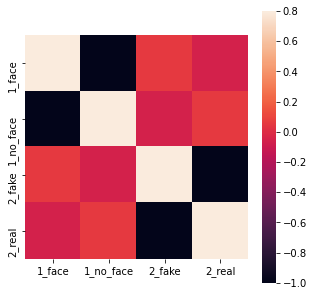

In [ ]:
%matplotlib inline
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(bin2, vmax=0.8, square=True, ax=ax)

**Modeling**

In [ ]:
bintweets4.head()

,text,is_Face,label
0,RT @ActivistPost: All of America's Wars Begin ...,0,0
1,RT @RT_com: #FlyDubai issues official statemen...,1,0
2,RT @RT_com: EU condemns Israel’s latest massiv...,1,0
3,RT @RT_com: VIDEO: Drone buzzes over ancient #...,1,0
4,US gears up to fight Russian ‘disinformation’ ...,1,0


In [ ]:
bintweets4.duplicated(subset=['text']).sum()

0

In [ ]:
bintweets4.shape

(1134, 3)

The first model is the NLP model. The column `text` is the input and the column `label` is the target.

In [ ]:
bin_target = bintweets4['label']
bin_features = bintweets4.drop('label', axis=1)

**NLP Model with Word2Vec**

Similarly to the function `preprocess_Buzz()` I developed the function `getContent_bint()` which appends some stop words related to Twitter which do not contribute to the information gaining of the model, removes stop words in English and Spanish, computes the words' stemm, fills the `None` values with spaces, removes all words which do not contain alphanumeric characters, tokenize all the words, lowers all the words' characters, lemmatizes them and returns the cleaned tweets as a list of lists.

In [ ]:
def getContent_bint(features):
  from nltk.corpus import stopwords
  lemmatizer = WordNetLemmatizer() #groups different inflected forms of a word
  stop_words = stopwords.words(["english", "spanish"])
  stop_words.append('rt')
  stop_words.append('http')
  stop_words.append('Http')
  stop_words.append('co')
  stop_words.append('n')
  stop_words.append('u')
  stop_words.append('U')
  stemmer = PorterStemmer()

  features.loc[:, 'text'] = features.text.fillna("")
  features.loc[:, 'text'] = features.apply(lambda row: re.sub('[^a-zA-z]', ' ', row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word.lower() for word in row['text'] if word.isalpha()], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word for word in row['text'] if word not in stop_words], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['text']], axis=1)

  articles = features['text'].tolist()

  return articles

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
clean_bintweets = getContent_bint(bin_features)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
clean_bintweets[10]

['rtsportnews', 'deliberate']

Here, a tokenizer object is applied to the tweets and transforms the tweets to sequences. Hence, each word is assigned to an index and the list of lists with the tweets' words is traduced to this index. Next, the length of the longest tweets is calculated (148 words). Having this, they can be padded which means that the tweets are transformed to a matrix which contains only zeros and ones at the position of the columns belonging to the numbers of the words in each tweet.

In [ ]:
tokenizer_obj = Tokenizer()

In [ ]:
tokenizer_obj.fit_on_texts(clean_bintweets)
seq_bint = tokenizer_obj.texts_to_sequences(clean_bintweets)
seq_bint[0:2]

[[1546, 533, 53, 391, 1547, 1548, 1549, 1, 1550, 1551],
 [47, 247, 300, 534, 142, 78, 535, 10, 248, 1, 249, 392, 1]]

In [ ]:
longest_bintweet = bintweets4['text'].apply(len).max()
print(longest_bintweet)

148


In [ ]:
padded_bint = pad_sequences(seq_bint, longest_bintweet)

In [ ]:
print(padded_bint.shape)
print(bin_target.shape)

(1134, 148)
(1134,)


In [ ]:
'''with open('padded_bint.pkl','wb') as f:
    pickle.dump(padded_bint, f)'''

In [ ]:
with open('padded_bint.pkl','rb') as f:
    padded_bint = pickle.load(f)
    print(padded_bint[10])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 1577 1578]


Since the longest tweet contains 148 words and the data set included 1134 tweets, the pad matrix contains 148 columns and 1134 rows. Next, I storaged the column `label` as a separate data frame and took it as a target variable and the pad as feature variable to split and mix it. Parallelly to that I computed the embedding model using Word2Vec. There I used again 100 dimensions and a co-occurance window of 10 words before and after each computed word in the list of lists with the clean tweets. This model obtained a vocabulary of 6005 words.

In [ ]:
print(padded_bint.shape)
print(bin_target.shape)

(1134, 148)
(1134,)


In [ ]:
Xtrain_bin, Xtest_bin, ytrain_bin, ytest_bin = split_data(padded_bint, bin_target)

In [ ]:
longest_bintweet = 148

In [ ]:
model_w2v_bint = Word2Vec(clean_bintweets,
                     min_count = 1,
                     window = 10,
                     iter = 10,
                     size = 100,
                     workers = 4)
print(model_w2v_bint)

Word2Vec(vocab=6005, size=100, alpha=0.025)


In [ ]:
words_bint = list(model_w2v_bint.wv.vocab)

In [ ]:
print(model_w2v_bint['trump'])

[-0.05326273 -0.00340571 -0.04124945 -0.00220275  0.06855652  0.10555273
 -0.00759551  0.06456317 -0.02951069 -0.02381486 -0.11464536 -0.05737542
  0.0428833   0.14158198 -0.11109644  0.05182542 -0.02948076  0.05030179
  0.00120261 -0.04928726 -0.06290532 -0.12065042  0.08451934 -0.0586336
 -0.03211531 -0.03113368  0.04928328 -0.06513885  0.03342104  0.06743268
 -0.08852074  0.01167987  0.13334626 -0.03940866  0.03000956  0.0514357
  0.06674255  0.08466074 -0.0539469  -0.02698044 -0.08496712 -0.11513878
  0.10336889 -0.02996788  0.04224675 -0.09107319  0.0022766   0.04477646
 -0.11414362  0.09895226 -0.02810778 -0.07866743  0.0726633  -0.12046601
  0.0802582   0.09603311  0.10739171  0.09837697 -0.07049088 -0.04466819
 -0.1309578  -0.02748268 -0.04138469 -0.04477437 -0.0021054  -0.00261837
 -0.0080856  -0.0196289   0.10436454  0.06279998 -0.01348325  0.01840019
 -0.06137489 -0.02796894  0.0214435   0.02825559 -0.0716992   0.00241679
  0.1199823  -0.08247163 -0.03192904 -0.0888119   0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(words_bint[0:10])

['activistpost', 'america', 'war', 'begin', 'false', 'flag', 'wwiii', 'http', 'lyz', 'oapuv']


In [ ]:
model_w2v_bint.wv.most_similar('trump', topn=10)

[('http', 0.9990417957305908),
 ('v', 0.9985719323158264),
 ('people', 0.9985637068748474),
 ('via', 0.9985198974609375),
 ('video', 0.9984114170074463),
 ('u', 0.998369574546814),
 ('amp', 0.9983491897583008),
 ('isi', 0.998255729675293),
 ('c', 0.9981420636177063),
 ('russia', 0.9981287717819214)]

In [ ]:
embsBint = 'bintweets_embeddings.txt'
model_w2v_bint.wv.save_word2vec_format(embsBint, binary=False)

In [ ]:
embeddings_bint_index={}
with open("bintweets_embeddings.txt") as loaded_embs:
    for line in loaded_embs:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:])
        embeddings_bint_index[word]=coefs

In [ ]:
embeddings_bint_index['trump']

array(['-0.05326273', '-0.0034057102', '-0.041249454', '-0.0022027518',
       '0.06855652', '0.10555273', '-0.0075955056', '0.06456317',
       '-0.029510694', '-0.023814864', '-0.11464536', '-0.057375416',
       '0.0428833', '0.14158198', '-0.11109644', '0.051825423',
       '-0.02948076', '0.050301787', '0.0012026128', '-0.049287256',
       '-0.06290532', '-0.12065042', '0.08451934', '-0.058633603',
       '-0.03211531', '-0.03113368', '0.04928328', '-0.06513885',
       '0.033421043', '0.06743268', '-0.088520736', '0.011679872',
       '0.13334626', '-0.039408658', '0.030009557', '0.051435698',
       '0.066742554', '0.08466074', '-0.053946897', '-0.026980445',
       '-0.08496712', '-0.11513878', '0.103368886', '-0.029967876',
       '0.04224675', '-0.091073185', '0.0022765966', '0.044776462',
       '-0.11414362', '0.09895226', '-0.02810778', '-0.07866743',
       '0.0726633', '-0.12046601', '0.0802582', '0.09603311',
       '0.10739171', '0.098376974', '-0.07049088', '-0.04466

In [ ]:
bint_word_index = tokenizer_obj.word_index

In [ ]:
num_wordsBint = len(bint_word_index)+1
num_wordsBint

6006

In [ ]:
num_wordsBint = 6006

Here, the indexes resulted from the tokenizer object applied to the list of clean. Hence, the tokenizer object finds the "ones", looks the number of the corresponding column and uses this number to find the word. Once it has the word, it look for it in the embedding model. The embedding with the "ones" ins transformed to a numpy matrix. This numpy matrix can be used as input for the embedding layer of the neuronal network.

In [ ]:
bint_embedding_matrix = np.zeros((num_wordsBint, 100))

In [ ]:
for word, i in bint_word_index.items():
    if i > num_wordsBint:
        continue
    embedding_vector=embeddings_bint_index[word]
    #dealing with words that we have not embeddings for
    if embedding_vector is not None:
        bint_embedding_matrix[i]=embedding_vector
#embedding_matrix is our lookup table
print(bint_embedding_matrix.shape)
print(num_wordsBint)

(6006, 100)
6006


In [ ]:
embedding_bint_layer=Embedding(num_wordsBint, #size of vocab
                              100, #size of embedding 
                              embeddings_initializer=Constant(bint_embedding_matrix), #weights to start with, and not touch during training
                              input_length=longest_bintweet,
                              trainable=False  # do no update these weights
                              )

For the purpose of tuning the hyperparameters, I defined the neuronal network as a function `model_bint()`. Again, I defined the neuronal network with one the embedding layer as input layer, next a dropout layer with a droput rate of 0.2, then a LSTM-layer with 256 neurons, a dropout layer with a dropout rate of 0.2 too and finally a single dense connected neuron as output layer with the sigmoid function as activation function. The whole neuronal network had th binary crossentropy function as loss function because it is again a binary classifification between `real` and `fake` information. After the fine tunning process the results showed that the `Adam` optimizer was the one which computed the best accuracy results. For this reason it was used as optimizer.

In [ ]:
def model_bint(embedding=embedding_bint_layer, optimizer='Adam', dropout_rate=0.2, neuron=256):
  model=Sequential()
  model.add(embedding)
  model.add(Dropout(dropout_rate))
  model.add(LSTM(neuron))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model_bint = model_bint()

In [ ]:
model_bint.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 148, 100)          600600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 148, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 966,425
Trainable params: 365,825
Non-trainable params: 600,600
_________________________________________________________________


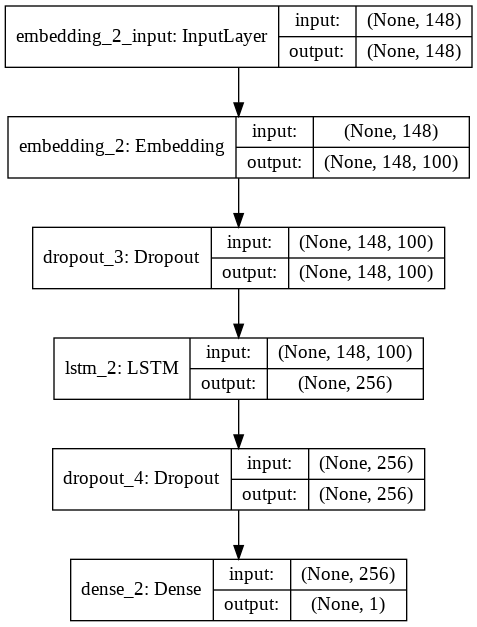

In [ ]:
plot_model(model_bint, 'model_bint.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_bint = KerasClassifier(build_fn=model_bint, nb_epoch=100, batch_size=24, verbose=0)

In [ ]:
ytest_bin = ytest_bin.reset_index(drop=True)

In [ ]:
batch_sizes=[24, 50, 64]
epochs1=[100, 150, 200]

param_grid = dict(batch_size=batch_sizes, epochs=epochs1)

In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizers)

In [ ]:
grid_bin_text = GridSearchCV(estimator=model_bint, param_grid=param_grid, n_jobs=2, cv=10)

In [ ]:
grid_bin_result = grid_bin_text.fit(Xtrain_bin, ytrain_bin)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('Best %f using %s' % (grid_bin_result.best_score_, grid_bin_result.best_params_))
means = grid_bin_result.cv_results_['mean_test_score']
stds = grid_bin_result.cv_results_['std_test_score']
params = grid_bin_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.577611 using {'optimizer': 'Adagrad'}
0.570016 (0.039746) with: {'optimizer': 'SGD'}
0.567468 (0.042491) with: {'optimizer': 'RMSprop'}
0.577611 (0.054888) with: {'optimizer': 'Adagrad'}
0.573750 (0.044412) with: {'optimizer': 'Adadelta'}
0.566313 (0.036967) with: {'optimizer': 'Adam'}
0.572421 (0.048065) with: {'optimizer': 'Adamax'}


In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons=[16, 32, 64, 128, 256, 512]
param_dist_bin = dict(optimizer=optimizers, dropout_rate=dropout_rates, neuron=neurons)

In [ ]:
n_iter_search=3

In [ ]:
random_search = RandomizedSearchCV(estimator=model_bint,
                                   param_distributions=param_dist_bin,
                                   n_iter=n_iter_search,
                                   n_jobs=1,
                                   cv=10,
                                   verbose=0)

In [ ]:
random_search.fit(Xtrain_bin, ytrain_bin)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa126784550>,
                   iid='deprecated', n_iter=3, n_jobs=1,
                   param_distributions={'dropout_rate': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9],
                                        'neuron': [16, 32, 64, 128, 256, 512],
                                        'optimizer': ['SGD', 'RMSprop',
                                                      'Adagrad', 'Adadelta',
                                                      'Adam', 'Adamax']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print('Best %f using %s' % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.568750 using {'optimizer': 'SGD', 'neuron': 256, 'dropout_rate': 0.2}
0.568750 (0.037881) with: {'optimizer': 'SGD', 'neuron': 256, 'dropout_rate': 0.2}
0.563687 (0.042983) with: {'optimizer': 'RMSprop', 'neuron': 32, 'dropout_rate': 0.2}
0.561266 (0.041762) with: {'optimizer': 'RMSprop', 'neuron': 32, 'dropout_rate': 0.7}


For training the neuronal network I used a call back in order to restore the best results after ending the training process (the focus was more on this than in early stoping and therefore the patience was set on 250 iterations). I set the neuronal network altogether for 600 iterations.

In [ ]:
cb_bint=EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=250, restore_best_weights=True)

In [ ]:
history_bint=model_bint.fit(Xtrain_bin, ytrain_bin, batch_size=24, epochs=600, validation_data=(Xtest_bin, ytest_bin), shuffle=True, callbacks=[cb_bint], verbose=1)

Train on 793 samples, validate on 341 samples
Epoch 1/600
793/793 [==============================] - 8s 10ms/step - loss: 0.0504 - accuracy: 0.9786 - val_loss: 1.5738 - val_accuracy: 0.7449
Epoch 2/600
793/793 [==============================] - 8s 10ms/step - loss: 0.0498 - accuracy: 0.9786 - val_loss: 1.5791 - val_accuracy: 0.7390
Epoch 3/600
793/793 [==============================] - 9s 11ms/step - loss: 0.0506 - accuracy: 0.9798 - val_loss: 1.5814 - val_accuracy: 0.7390
Epoch 4/600
793/793 [==============================] - 8s 10ms/step - loss: 0.0501 - accuracy: 0.9798 - val_loss: 1.5886 - val_accuracy: 0.7419
Epoch 5/600
793/793 [==============================] - 8s 11ms/step - loss: 0.0506 - accuracy: 0.9773 - val_loss: 1.5932 - val_accuracy: 0.7390
Epoch 6/600
793/793 [==============================] - 8s 11ms/step - loss: 0.0554 - accuracy: 0.9773 - val_loss: 1.5931 - val_accuracy: 0.7331
Epoch 7/600
793/793 [==============================] - 8s 11ms/step - loss: 0.0516 - accur

In [ ]:
scores_bint={}
score_best_bint = model_bint.evaluate(Xtest_bin, ytest_bin, verbose=0)
scores_bint["bint_embeddings_matrix"] = score_best_bint
print('Test loss:', score_best_bint[0])
print('Test accuracy:', score_best_bint[1])

Test loss: 1.5738168440955824
Test accuracy: 0.7448680400848389


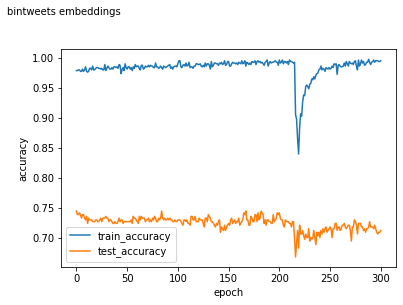

In [ ]:
show_history_acc(history_bint, 'bintweets embeddings')

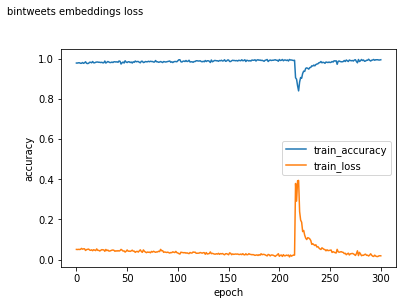

In [ ]:
show_history_loss(history_bint, 'bintweets embeddings loss')

After having trained the neuronal network, the model calculates an accuracy of 0.744 with the best weights. After calculating the model's predictions of the test features set and setting a threshold of 0.5 for filtering the `real` from the `fake` tweets, the model obtained a precision of 0.75 and a recall of 0.79 for the `fake news` and a precision of 0.74 and a recall of 0.69 for the `real news`. The model's AUC was 0.741

In [ ]:
bint_predict = model_bint.predict(Xtest_bin)
bint_predict = (bint_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(ytest_bin, bint_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       183
           1       0.72      0.78      0.75       158

    accuracy                           0.76       341
   macro avg       0.76      0.76      0.76       341
weighted avg       0.76      0.76      0.76       341



In [ ]:
confusion_matrix(ytest_bin, bint_predict)

array([[135,  48],
       [ 35, 123]])

In [ ]:
fpr_bint, tpr_bint, thresholds_bint = roc_curve(ytest_bin, bint_predict)

In [ ]:
auc_bint = auc(fpr_bint, tpr_bint)
auc_bint

0.7580929653455073

In [ ]:
model_bint.save('model_bint.hdf5')

In [ ]:
model_bint = keras.models.load_model('model_bint.hdf5')

In [ ]:
bint_predict = model_bint.predict(Xtest_bin)
bint_predict[0:10]

array([[0.76070315],
       [0.25884706],
       [0.03190606],
       [0.12047579],
       [0.11499017],
       [0.9979651 ],
       [0.03481923],
       [0.5563567 ],
       [0.00616955],
       [0.52156144]], dtype=float32)

In [ ]:
ytest_bin[0:10]

1099    1
774     1
385     0
94      0
403     0
935     1
244     0
917     1
331     0
776     1
Name: label, dtype: int64

**Benchmark**

As benchmark I used the Random Forest Classifier. First of all I conducted a Grid Search for different hyperparameters using the test set of the clean tweets.

In [ ]:
rfc = RandomForestClassifier(n_estimators=60)

In [ ]:
param_grid = {'n_estimators':[20, 40, 60, 80, 100],
              'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'min_samples_split':[4],
              'min_samples_leaf':[10]}

In [ ]:
grid_bint_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_bint_rfc.fit(Xtrain_bin, ytrain_bin)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print(grid_bint_rfc.best_score_)
print(grid_bint_rfc.best_params_)
MyBestModel_rfc_bint = grid_bint_rfc.best_estimator_

0.9986956521739131
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 60}


After conducting a Grid Serach on the Random Forest Classifier applied to the train data set, it came to the result that the best hyperparameters for this classifier are `entropy` as criterion, the maximum amount  of features has to be calculated with the square root, it has to contain minimum 10 samples per leaf, split at least 4 times the samples and contain 60 estimators. Thus, I declare the Random Forest Classifier with these hyperparameters in order to aplly it to compute the predictions using both the train and the test set.

In [ ]:
MyBestModel_rfc_bint = RandomForestClassifier(criterion='entropy', max_features='sqrt', min_samples_leaf=10, min_samples_split=4, n_estimators=60)

In [ ]:
MyBestModel_rfc_bint.fit(Xtrain_bin, ytrain_bin)
MyBestModelbint_target_pred=MyBestModel_rfc_bint.predict(Xtest_bin)
MyBestModelbint_target_pred[0:5]

array([1, 1, 0, 0, 0])

In [ ]:
bint_target_matrix = metrics.confusion_matrix(ytest_bin, MyBestModelbint_target_pred)

In [ ]:
print('Confussion Matrix: \n', bint_target_matrix)

Confussion Matrix: 
 [[183   0]
 [  8 150]]


As a result, the Random Forest Classifier obtains a precision of 0.96 and a recall of 1 for the `fake tweets` and a precision of 1 and a recall of 0.95 for the `real tweets`. The AUC of the classifier is 0.975

In [ ]:
print(classification_report(ytest_bin, MyBestModelbint_target_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       183
           1       1.00      0.95      0.97       158

    accuracy                           0.98       341
   macro avg       0.98      0.97      0.98       341
weighted avg       0.98      0.98      0.98       341



In [ ]:
fpr_rf_bint, tpr_rf_bint, thresholds_rf_bint = roc_curve(ytest_bin, MyBestModelbint_target_pred)

In [ ]:
auc_rf_bint = auc(fpr_rf_bint, tpr_rf_bint)
auc_rf_bint

0.9746835443037974

**ROC-curve**

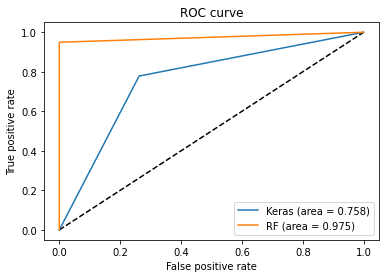

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bint, tpr_bint, label='Keras (area = {:.3f})'.format(auc_bint))
plt.plot(fpr_rf_bint, tpr_rf_bint, label='RF (area = {:.3f})'.format(auc_rf_bint))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Neuronal network (face/no face)**

In order to define the neuronal network model to predict whether the tweets are either `real` or `fake` I converted the data types of the variables `is_face` and `label` to integers and apply the function `split_data()` in order to define the train and test sets of the feature item and the target item.

In [ ]:
bint2_face = bin_features['is_Face']

In [ ]:
bface_train, bface_test, bveracity_train, bveracity_test = split_data(bint2_face, bin_target)

In [ ]:
print(bface_train.shape)
print(bveracity_train.shape)
print(bface_test.shape)
print(bveracity_test.shape)

(793,)
(793,)
(341,)
(341,)


The neuronal network is declared as a function in ored be able to define the different input variables which have to be next fine tunned. In general, the neuronal network was defined as `Sequential()` with 4 fully connected layers and two dropout rates between the first 3 layers. Also the input layer had a shape of (1,) because it has to contain the amount of items contained in the input data frame. The output layer had 1 neuron which was activated with a sigmoid function for it to carry out the binary classification between `real` and `fake` tweets. Also the binary crossentropy loss function was implemented for this purpose.

In [ ]:
def model_face(init_form='he_normal', activation='linear', dropout_rate=0.5, neuron=250, optimizer='Adamax'):
  model = Sequential()
  model.add(Dense(neuron, activation=activation, kernel_initializer=init_form, bias_initializer=init_form, input_shape=(1,)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron, activation=activation, kernel_initializer=init_form, bias_initializer=init_form))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron, activation='sigmoid', kernel_initializer=init_form, bias_initializer=init_form))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=init_form, bias_initializer=init_form))
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model_face = model_face()

In [ ]:
model_face.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               500       
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 126,251
Trainable params: 126,251
Non-trainable params: 0
________________________________________________

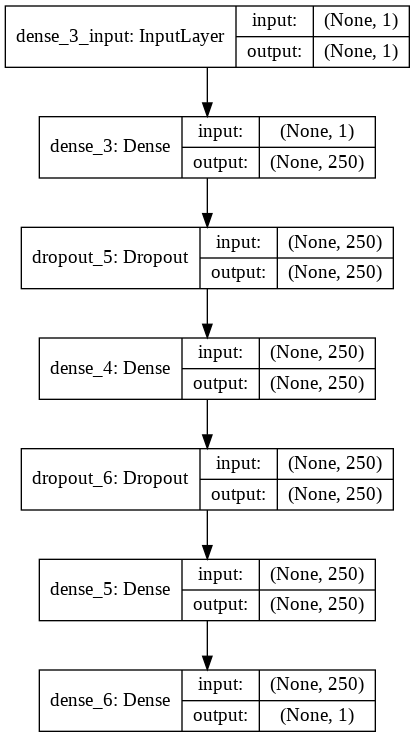

In [ ]:
plot_model(model_face, 'model_face.png', show_shapes=True, show_layer_names=True)

In [ ]:
init_form='he_normal', activation='linear', dropout_rate=0.5, neuron=250, optimizer='Adamax'

Previous to the model training, the Keras Classifier was used in order to conduct both a Grid Search and a Random Search in order to find the hyperparameters that produce the best results with this neuronal network. Since the amount of items to be regarded in this case was small, I decided to conduct the tunning proces of the hyperparameters with the complete data set. This process demonstrated that the `he normal initializer`, the `linear activation` and a `dropout rate` of 0.5 maximized the model's results. Also the `Adamax optimizer` and an amount of 250 neurons maximized the results of the neuronal network.

In [ ]:
model_bint_face = KerasClassifier(build_fn=model_face, verbose=0)

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [100, 250, 500]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [ ]:
optimizer=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizer)

In [ ]:
init_form=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_form=init_form)

In [ ]:
activation=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid=dict(activation=activation)

In [ ]:
dropout_rate=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1,2,3,4,5]
param_grid=dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

In [ ]:
neurons=[10, 50, 100, 150, 200, 250]
param_grid=dict(neurons=neurons)

In [ ]:
grid_bint_face = GridSearchCV(estimator=model_bint_face, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)

In [ ]:
bface_test = bface_test.reset_index(drop=True)

In [ ]:
print(bint2_face.shape)
print(bin_target.shape)

(1134,)
(1134,)


In [ ]:
grid_bface_result = grid_bint_face.fit(bint2_face, bin_target)

In [ ]:
print('Best %f using %s' % (grid_bface_result.best_score_, grid_bface_result.best_params_))
means = grid_bface_result.cv_results_['mean_test_score']
stds = grid_bface_result.cv_results_['std_test_score']
params = grid_bface_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.226631 using {'neurons': 10}
0.226631 (0.320505) with: {'neurons': 10}
0.106702 (0.150899) with: {'neurons': 50}
0.226631 (0.320505) with: {'neurons': 100}
0.226631 (0.320505) with: {'neurons': 150}
0.106702 (0.150899) with: {'neurons': 200}
0.106702 (0.150899) with: {'neurons': 250}


In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
init_forms=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activations=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
neurons=[10, 50, 100, 150, 200, 250]
batch_sizes=[10, 20, 40, 60, 80, 100]
epochs1=[100, 250, 500]
param_dist_binf = dict(optimizer=optimizers, init_form=init_forms, dropout_rate=dropout_rates, neuron=neurons, activation=activations, batch_size=batch_sizes, epochs=epochs1)

In [ ]:
n_iter_search=3

In [ ]:
random_search_binf = RandomizedSearchCV(estimator=model_bint_face,
                                   param_distributions=param_dist_binf,
                                   n_iter=n_iter_search,
                                   n_jobs=2,
                                   cv=10,
                                   verbose=0)

In [ ]:
random_search_binf.fit(bface_train, bveracity_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb428fa8630>,
                   iid='deprecated', n_iter=3, n_jobs=2,
                   param_distributions={'activation': ['softmax', 'softplus',
                                                       'softsign', 'relu',
                                                       'tanh', 'sigmoid',
                                                       'hard_sigmoid',
                                                       'linear'],
                                        'batch_size': [10, 20, 40, 60, 80, 100],
                                        'dropout_rate': [0.1, 0.2, 0.3, 0.4,
                                                         0.5],
                                        'epochs': [100, 250, 500],
                                        'init_form': ['uniform',
                                                      'lecun_uniform', 'normal',
 

In [ ]:
print('Best %f using %s' % (random_search_binf.best_score_, random_search_binf.best_params_))
means = random_search_binf.cv_results_['mean_test_score']
stds = random_search_binf.cv_results_['std_test_score']
params = random_search_binf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.570016 using {'optimizer': 'Adamax', 'neuron': 250, 'init_form': 'he_normal', 'epochs': 100, 'dropout_rate': 0.5, 'batch_size': 80, 'activation': 'linear'}
0.570016 (0.039746) with: {'optimizer': 'Adamax', 'neuron': 250, 'init_form': 'he_normal', 'epochs': 100, 'dropout_rate': 0.5, 'batch_size': 80, 'activation': 'linear'}
0.557516 (0.055499) with: {'optimizer': 'SGD', 'neuron': 200, 'init_form': 'lecun_uniform', 'epochs': 100, 'dropout_rate': 0.3, 'batch_size': 100, 'activation': 'linear'}
0.570016 (0.039746) with: {'optimizer': 'Adam', 'neuron': 100, 'init_form': 'normal', 'epochs': 500, 'dropout_rate': 0.3, 'batch_size': 40, 'activation': 'relu'}


In the model was also implemented a `call back` with a patience of 1750 epochs. The focus of the the implementation of the callback was to restore the best weights by producing the best accuracy result and therefore the amount of patience epochs is slightly lower than the total epoch amount of 2000. Also the `batch sice` of 20 seemed to be the best in order to maximize the model's result.

In [ ]:
cb_binm=EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=1750, restore_best_weights=True)

In [ ]:
history_bin_face=model_face.fit(bface_train, bveracity_train, batch_size=20, epochs=2000, validation_data=(bface_test, bveracity_test), shuffle=True, verbose=1, callbacks=[cb_binm])

Train on 793 samples, validate on 341 samples
Epoch 1/2000
793/793 [==============================] - 0s 216us/step - loss: 0.6862 - accuracy: 0.5675 - val_loss: 0.6907 - val_accuracy: 0.5367
Epoch 2/2000
793/793 [==============================] - 0s 199us/step - loss: 0.6905 - accuracy: 0.5612 - val_loss: 0.6889 - val_accuracy: 0.5367
Epoch 3/2000
793/793 [==============================] - 0s 194us/step - loss: 0.6829 - accuracy: 0.5687 - val_loss: 0.6918 - val_accuracy: 0.5367
Epoch 4/2000
793/793 [==============================] - 0s 193us/step - loss: 0.6888 - accuracy: 0.5712 - val_loss: 0.6897 - val_accuracy: 0.5367
Epoch 5/2000
793/793 [==============================] - 0s 194us/step - loss: 0.6842 - accuracy: 0.5662 - val_loss: 0.6925 - val_accuracy: 0.5367
Epoch 6/2000
793/793 [==============================] - 0s 197us/step - loss: 0.6845 - accuracy: 0.5574 - val_loss: 0.6965 - val_accuracy: 0.5367
Epoch 7/2000
793/793 [==============================] - 0s 206us/step - loss: 

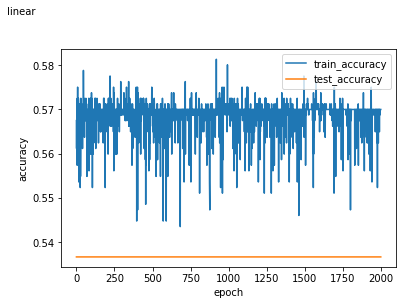

In [ ]:
show_history_acc(history_bin_face, 'linear')

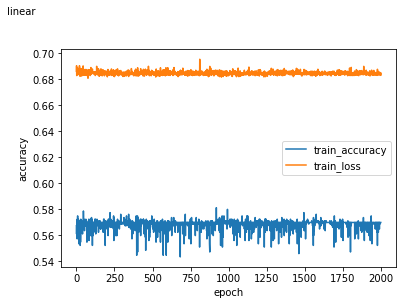

In [ ]:
show_history_loss(history_bin_face, 'linear')

After a long training process the model computed an accuracy of 0.537. However, after filtering the values above and below 0.5, the model computes a precision of 0.54 and a recall of 1 for the `fake news` and a precision of 0 and a recall of 0 for the `real news`. The model's AUC is equal to 0.5. After taking a deeper view on the model's output, it shows that it only produces the values 0.42 and 0.47 which means that the output has a high deviation.

In [ ]:
scores_binf={}
score_best_binf = model_face.evaluate(bface_test, bveracity_test, verbose=0)
scores_binf["bint_embeddings_matrix"] = score_best_binf
print('Test loss:', score_best_binf[0])
print('Test accuracy:', score_best_binf[1])

Test loss: 0.689876104729616
Test accuracy: 0.53665691614151


In [ ]:
binf_predict = model_face.predict(bveracity_test)
binf_predict[0:10]

array([[0.47086892],
       [0.47086892],
       [0.420899  ],
       [0.420899  ],
       [0.420899  ],
       [0.47086892],
       [0.420899  ],
       [0.47086892],
       [0.420899  ],
       [0.47086892]], dtype=float32)

In [ ]:
x = np.unique(binf_predict)
x

array([0.420899  , 0.47086892], dtype=float32)

In [ ]:
binf_predict = (binf_predict>0.5)

In [ ]:
print('\nClassification report RandomOverSampling:\n', classification_report(bveracity_test, binf_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       183
           1       0.00      0.00      0.00       158

    accuracy                           0.54       341
   macro avg       0.27      0.50      0.35       341
weighted avg       0.29      0.54      0.37       341



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
binf_target_matrix = metrics.confusion_matrix(bveracity_test, binf_predict)
print('Confussion Matrix: \n', binf_target_matrix)

Confussion Matrix: 
 [[183   0]
 [158   0]]


In [ ]:
fpr_binf2, tpr_binf2, thresholds_binf2 = roc_curve(bveracity_test, binf_predict)

In [ ]:
auc_binf2 = auc(fpr_binf2, tpr_binf2)
auc_binf2

0.5

**Benchmark**

As a benchmark I used the Random Forest Classifier. First of al I conducted a grid search and a random search in order to compute the hyperparameters that obtain the best results with this classifier.

In [ ]:
bint_face = bin_features.loc[:, 'is_Face']

In [ ]:
bint_face.shape

(1134,)

In [ ]:
bint_face = bint_face.map({0 : 'no_face', 1 : 'face'})
bint_face.head()

0    no_face
1       face
2       face
3       face
4       face
Name: is_Face, dtype: object

In [ ]:
bint_face = pd.get_dummies(bint_face)
bint_face.head()

,face,no_face
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
bin_target.shape

(1134,)

In [ ]:
bin_target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [ ]:
'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 20

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', max_features='log2', min_samples_leaf=10, min_samples_split=4)

In [ ]:
bin_face_train, bin_face_test, bin_target_train, bin_target_test = split_data(bint_face, bin_target)

In [ ]:
param_grid = {'n_estimators':[20, 40, 60, 80, 100],
              'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'min_samples_split':[4],
              'min_samples_leaf':[10]}

In [ ]:
grid_bin_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_bin_rfc.fit(bin_face_train, bin_target_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print(grid_bin_rfc.best_score_)
print(grid_bin_rfc.best_params_)
MyBestModel_rfc_bin = grid_bin_rfc.best_estimator_

0.5176880607315391
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 20}


The best model was obtained having entropy as criterion, obtaining the maximum amount features with log2, defining minimum 10 samples in each leaf and 4 samples per split and 20 estimators.

In [ ]:
MyBestModel_rfc_bin.fit(bin_face_train, bin_target_train)
MyBestModelbin_target_pred=rfc.predict(bin_face_test)
MyBestModelbin_target_pred[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
rfc.fit(bin_face_train, bin_target_train)
bin_target_pred = rfc.predict(bin_face_test)
bin_target_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x = set(bin_target_pred)-set(bin_target_test)
print(x)

set()


In [ ]:
bin_target_pred = (bin_target_pred>0.5)

In [ ]:
bin_target_pred[0:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
np.unique(bin_target_pred)

array([False])

In [ ]:
bin_target_matrix = metrics.confusion_matrix(bin_target_test, bin_target_pred)

Similarly to the neuronal network, the Random Forest Classifier calculated a precision of 0.54 and a recall of 1 for the `fake news` and a precision of 0 and a recall of 0 for the `real news`. The model's AUC was again 0.5 here.

In [ ]:
print('Confussion Matrix: \n', bin_target_matrix)

Confussion Matrix: 
 [[183   0]
 [158   0]]


In [ ]:
print(classification_report(bin_target_test, bin_target_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       183
           1       0.00      0.00      0.00       158

    accuracy                           0.54       341
   macro avg       0.27      0.50      0.35       341
weighted avg       0.29      0.54      0.37       341



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fpr_rf_binf, tpr_rf_binf, thresholds_rf_binf = roc_curve(bveracity_test, bin_target_pred)

In [ ]:
auc_rf_binf = auc(fpr_rf_binf, tpr_rf_binf)
auc_rf_binf

0.5

**ROC-curve**

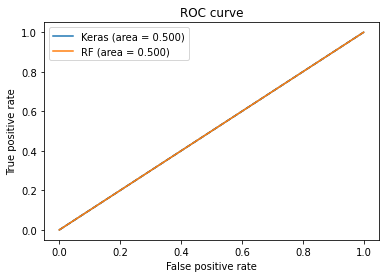

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_binf2, tpr_binf2, label='Keras (area = {:.3f})'.format(auc_binf2))
plt.plot(fpr_rf_binf, tpr_rf_binf, label='RF (area = {:.3f})'.format(auc_rf_binf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Tweets and face data combined**

At this point, both neuronal network's were mixed in order to be able to conduct the analysis with mixed data as input. Therefore I defined as first input the NLP model with a shape of (148,) since the longest tweet contains 148 words (and so does the embedding matrix). Subsequently I defined the embedding layer with the same embedding model followed by a LSTM-layer with 16 neurons. In between was defined a dropout with a rate of 0.2. The second input was also declared with a shape of (1,) since it contains the amount of columns of the data frame that has to be used as input (which is the the data set with the item `is_face`. The second input included two fully connected Dense layers both containing 10 neurons and previous to both Dense layers was declared a dropout with a dropout rate of 0.1 in both cases. Both input models got concatenated with a single Dense layer that contained 128 neurons activated by a `relu` function. An finally, this Dense layer was connected to the last Dense layer which contained solely one neuron (again, activated with a sigmoid function for the binary classification issue). Also the loss function was set to a binary crossentropy function. To train this model was used also the call backs used for the NLP model which had the main purpose to restore the weights that produced the best model's result. Again, therefore it had a patience of 250 epochs. The whole model was trained with the train and test set for 500 epochs.

In [ ]:
input_binm_1 = Input(shape=(148,))
embedding_binm_layer = Embedding(num_wordsBint, #size of vocab
                          100, #size of embedding 
                          embeddings_initializer=Constant(bint_embedding_matrix), #weights to start with, and not touch during training
                          input_length=longest_bintweet, 
                          trainable=False  # do no update these weights
                          )(input_binm_1)
dropout_layer_1 = Dropout(0.2)(embedding_binm_layer)
LSTM_binm_layer = LSTM(16, recurrent_dropout=0.1)(dropout_layer_1)

input_binm_2 = Input(shape=(1,))
dropout_layer_2 = Dropout(0.1)(input_binm_2)
dense_binm_layer1 = Dense(10, activation='tanh', kernel_initializer='zero', bias_initializer='zeros')(dropout_layer_2)
dropout_layer_3 = Dropout(0.1)(dense_binm_layer1)
dense_binm_layer2 = Dense(10, activation='sigmoid', kernel_initializer='zero', bias_initializer='zeros')(dropout_layer_3)


concat_binm_layer = Concatenate()([LSTM_binm_layer, dense_binm_layer2])
dense_binm_layer3 = Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')(concat_binm_layer)
output_binm_layer = Dense(1, activation='sigmoid')(dense_binm_layer3)

model_binm = Model(inputs=[input_binm_1, input_binm_2], outputs=output_binm_layer)

In [ ]:
model_binm.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
model_binm.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 148)          0                                            
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 148, 100)     600600      input_1[0][0]                    
____________________________________________________________________________________________

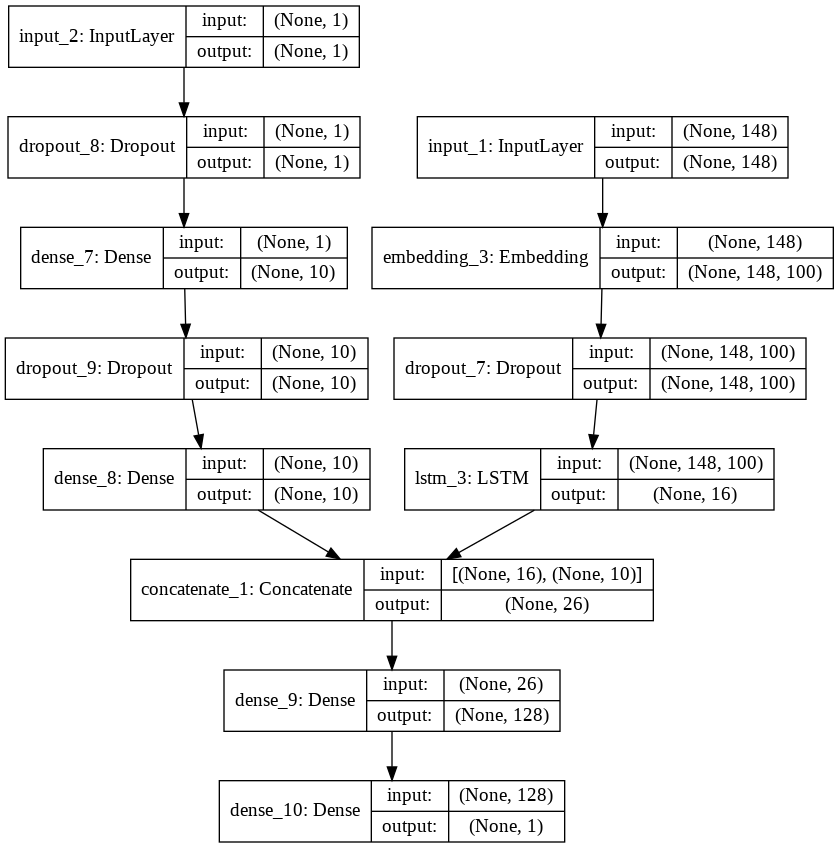

In [ ]:
plot_model(model_binm, 'model_binm.png', show_shapes=True, show_layer_names=True)

In [ ]:
history_binm=model_binm.fit(x=[Xtrain_bin, bface_train], y=ytrain_bin, batch_size=25, epochs=500, validation_data=([Xtest_bin, bface_test], ytest_bin), shuffle=True, verbose=1, callbacks=[cb_bint])

Train on 793 samples, validate on 341 samples
Epoch 1/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3194 - accuracy: 0.8651 - val_loss: 0.6269 - val_accuracy: 0.7625
Epoch 2/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3233 - accuracy: 0.8562 - val_loss: 0.6315 - val_accuracy: 0.7390
Epoch 3/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3304 - accuracy: 0.8462 - val_loss: 0.6407 - val_accuracy: 0.7419
Epoch 4/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3275 - accuracy: 0.8499 - val_loss: 0.6540 - val_accuracy: 0.7419
Epoch 5/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3135 - accuracy: 0.8575 - val_loss: 0.6556 - val_accuracy: 0.7478
Epoch 6/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3161 - accuracy: 0.8575 - val_loss: 0.6287 - val_accuracy: 0.7507
Epoch 7/500
793/793 [==============================] - 8s 10ms/step - loss: 0.3183 - accur

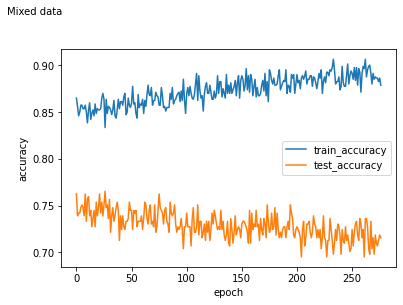

In [ ]:
show_history_acc(history_binm, 'Mixed data')

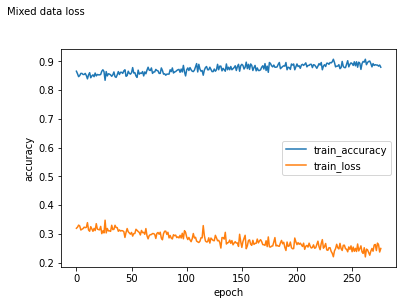

In [ ]:
show_history_loss(history_binm, 'Mixed data loss')

After training the neuronal network, the model achieves an accuracy of 0.765. After filtering the values above and below of 0.5, the 'fake news' obtain a precision of 0.78 and a recall of 0.78 too and the `real news` obtain a precision of 0.75 annd recall of 0.75. The model's AUC is equal to 0.764.

In [ ]:
scores_binmix={}
score_best_binmix = model_binm.evaluate([Xtest_bin, bface_test], ytest_bin, verbose=0)
scores_binmix["binmix_matrix"] = score_best_binmix
print('Test loss:', score_best_binmix[0])
print('Test accuracy:', score_best_binmix[1])

Test loss: 0.6466019151847033
Test accuracy: 0.7653958797454834


In [ ]:
binmix_predict = model_binm.predict([Xtest_bin, bface_test])
binmix_predict = (binmix_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(ytest_bin, binmix_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       183
           1       0.75      0.75      0.75       158

    accuracy                           0.77       341
   macro avg       0.76      0.76      0.76       341
weighted avg       0.77      0.77      0.77       341



In [ ]:
confusion_matrix(ytest_bin, binmix_predict)

array([[143,  40],
       [ 40, 118]])

In [ ]:
fpr_binm, tpr_binm, thresholds_binm = roc_curve(ytest_bin, binmix_predict)

In [ ]:
auc_binm = auc(fpr_binm, tpr_binm)
auc_binm

0.7641281040326485

In [ ]:
model_binm.save('model_binm.hdf5')

In [ ]:
model_binm = keras.models.load_model('model_bint.hdf5')

**ROC-Curve**

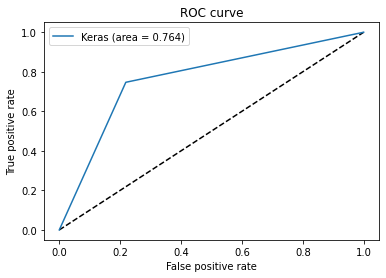

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_binm, tpr_binm, label='Keras (area = {:.3f})'.format(auc_binm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

For this neuronal network was not used a benchmark since there is not a classifier that can put together separated input data like the keras model for mixed data does. However, the AUC was compared to the AUC of the NLP model (which was 0.75) and of the neuronal network used to predict the labels with the item `is_face` (which was 0.5). Thus, it could be observed that the model with mixed data produced a slightly better AUC since it was equal to 0.764.

##'multweets'

In [ ]:
multweets.head()

,tweet_id,user_id,label
0,713252314388103168,2435083514,0
1,712985772475830272,237122922,0
2,709805496253980674,107406730,0
3,713359815800700928,619620327,0
4,711199503034875904,237122922,0


In [ ]:
multweets.label.count()

65792

In [ ]:
print(multweets.label.value_counts())

0    56709
3     4582
2     3131
1     1370
Name: label, dtype: int64


In this data set are contained 65792 tuples. The README files states that these tuples are solely the tuples which are described as `fake news` in the data set `bintweets`. These tuples are classified as `0` for `propaganda`, `1` for `clickbait`, `2` for `satire`, and `3` for `hoax`. For this reason I decide not to use this data set because the prupose of the master thesis is to detect fake news as such and all the labels used in this data set will be regarded as fake news.

##'credevent'

**Data exploration and data cleaning**

Hence, I will explorer the data set `credevent` which is provided by Mitra & Gilbert (2015).

In [ ]:
credevent.head()

,topic_key,topic_terms,tweet_count,ListOf_tweetid_author_createdAt_tuple,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 16344,Unnamed: 16345,Unnamed: 16346,Unnamed: 16347,Unnamed: 16348,Unnamed: 16349,Unnamed: 16350,Unnamed: 16351,Unnamed: 16352,Unnamed: 16353,Unnamed: 16354,Unnamed: 16355,Unnamed: 16356,Unnamed: 16357,Unnamed: 16358,Unnamed: 16359,Unnamed: 16360,Unnamed: 16361,Unnamed: 16362,Unnamed: 16363,Unnamed: 16364,Unnamed: 16365,Unnamed: 16366,Unnamed: 16367,Unnamed: 16368,Unnamed: 16369,Unnamed: 16370,Unnamed: 16371,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,host_patrick_neil-20141015_161647-20141015_172214,host,patrick,neil,34694,[('ID,522759240817971202','AUTHOR,i_Celeb_Gossips','CreatedAt,2014-10-16 14:41:30'),('ID,522759166448771073','AUTHOR,_HelenRocha','CreatedAt,2014-10-16 14:41:12'),('ID,522759166301970432','AUTHOR,YodaCon','CreatedAt,2014-10-16 14:41:12'),('ID,522759163902824448','AUTHOR,RssWeeds','CreatedAt,2014-10-16 14:41:11'),('ID,522759161860202497','AUTHOR,RssMarijuana','CreatedAt,2014-10-16 14:41:11'),('ID,522759160165707778','AUTHOR,flowswaggz','CreatedAt,...,522696946826612736','AUTHOR,nurpangarker','CreatedAt,2014-10-16 10:33:58'),('ID,522696917026099201','AUTHOR,CosetteSpa','CreatedAt,2014-10-16 10:33:50'),('ID,522696908209680385','AUTHOR,bourdonlion','CreatedAt,2014-10-16 10:33:48'),('ID,522696906062192640','AUTHOR,ElenaVillar22','CreatedAt,2014-10-16 10:33:48'),('ID,522696888026292227','AUTHOR,NewNewz_World','CreatedAt,2014-10-16 10:33:44'),('ID,522696813560995840','AUTHOR,RRyan17','CreatedAt,2014-10-16 10:33:26'),('ID,522696802877710336','AUTHOR,IroshJ','CreatedAt
1,royals_game_series-20141015_203526-20141015_21...,royals,game,series,22111,[('ID,522782817538043906','AUTHOR,topOrioles','CreatedAt,2014-10-16 16:15:11'),('ID,522782805806170112','AUTHOR,Pellegrino_Alex','CreatedAt,2014-10-16 16:15:08'),('ID,522782697039863808','AUTHOR,ExecAirShare','CreatedAt,2014-10-16 16:14:42'),('ID,522782583516848128','AUTHOR,tom_wamsley','CreatedAt,2014-10-16 16:14:15'),('ID,522782346979065856','AUTHOR,sarahlaudner','CreatedAt,2014-10-16 16:13:19'),('ID,522782055978242048','AUTHOR,losingpitcher','CreatedAt,...,522553696375562240','AUTHOR,RJonesing','CreatedAt,2014-10-16 01:04:44'),('ID,522553680881790977','AUTHOR,OldSchoolKU','CreatedAt,2014-10-16 01:04:40'),('ID,522553645326299137','AUTHOR,1Royal_Way','CreatedAt,2014-10-16 01:04:32'),('ID,522553606143483905','AUTHOR,RoyalsFanMan','CreatedAt,2014-10-16 01:04:22'),('ID,522553540972384256','AUTHOR,Seth_Singleton','CreatedAt,2014-10-16 01:04:07'),('ID,522553520630026240','AUTHOR,p90rexHud','CreatedAt,2014-10-16 01:04:02'),('ID,522553518608351232','AUTHOR,Seth_Singleton','CreatedAt
2,giants_game_win-20141015_230140-20141016_000502,giants,game,win,9990,[('ID,522861714363015169','AUTHOR,GiterDoneSports','CreatedAt,2014-10-16 21:28:41'),('ID,522859571878969344','AUTHOR,FanLucci','CreatedAt,2014-10-16 21:20:10'),('ID,522859424130412544','AUTHOR,PokeNaNa','CreatedAt,2014-10-16 21:19:35'),('ID,522857632051507200','AUTHOR,BrianSausa','CreatedAt,2014-10-16 21:12:28'),('ID,522857165418405888','AUTHOR,SLCardinals24x7','CreatedAt,2014-10-16 21:10:37'),('ID,522855896695595009','AUTHOR,SteveMerril','CreatedAt,...,522598973710688258','AUTHOR,Jonahh94','CreatedAt,2014-10-16 04:04:39'),('ID,522598973681729536','AUTHOR,heyburt23','CreatedAt,2014-10-16 04:04:39'),('ID,522598973127663616','AUTHOR,Mac_Clemons','CreatedAt,2014-10-16 04:04:39'),('ID,5225989726411202

ID = tweet ID, next to AUTHOR = user screen name

This data set and the other data sets provided by Mistra and Gilbert (2015) are a bit massy because it was provided in the internet as `.json` file and I decided to convert it into a `.cvs` file. Since I decided to separate the cells by colons `:`, comas `,` and quotation marks `"` in order to separate observations contained in each tuple, almost each word was contained in an individual column. This data set  contains 74 rows (i.e. topics) and 16384 columns. The first column contains the item `topic_key` which solely contained in this data set and can be droped. The next three rows contain the three words which are the key with the other data sets. However, they are separated. That is why they have to be joined in a single cell. The `.json` files can be seen as dictionaries in pandas where each tuple contais a key and a corresponding value. This structure was destroyed when I decided to use the colons to separate the data set. Therefore the keys `[('ID` and `'AUTHOR` are systematically replicated and they have to be droped.

In [ ]:
def cred_fix(cred):
  cred.loc[:, 'topic_terms'] = cred.apply(lambda row: row['topic_terms'] + ',' + row['tweet_count'] + ',' + row['ListOf_tweetid_author_createdAt_tuple'], axis=1)
  cred = cred.drop(['topic_key', 'tweet_count', 'ListOf_tweetid_author_createdAt_tuple'], axis=1)
  cred.rename(columns={'Unnamed: 4' : 'Amount tuples'})
  
  i = 2 #Here are deleted the values 'ID'
  while i < cred.shape[1]:
    cred = cred.drop(labels = cred.columns[i], axis=1)
    i = i+5
  
  j = 3 #The value "AUTHOR" is deleted here.
  while j < cred.shape[1]:
    cred = cred.drop(labels = cred.columns[j], axis=1)
    j = j+4

  k = 4 #The value "CreatedAt" is deleted here.
  while k < cred.shape[1]:
    cred = cred.drop(labels = cred.columns[k], axis=1)
    k = k+3

  h = 4 #The time span is deleted here.
  while h < cred.shape[1]:
    cred = cred.drop(labels = cred.columns[h], axis=1)
    h = h+2

  a = 'tweet_id'
  b = 'author_name'
  c = []
  i = 0
  while i < 5461:
    c.append(a)
    c.append(b)
    i = i+2
  
  c[0 : 1] = ['topic_terms', 'tweet_amount']
  c.pop(2)
  cred.columns = c

  return cred

In [ ]:
cred1 = cred_fix(credevent)

In [ ]:
cred1.head()

,topic_terms,tweet_amount,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,...,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name
0,"host,patrick,neil",34694,522759240817971202',i_Celeb_Gossips',522759166448771073',_HelenRocha',522759166301970432',YodaCon',522759163902824448',RssWeeds',522759161860202497',RssMarijuana',522759160165707778',flowswaggz',522759070202490881',HJBrown12',522759014531473408',DustinEvans1',522758957933551618',MarvelAssemble_',522758907576729600',GossipCenter',522758848529321984',SilverbirdTV',522758737367285760',HundredNews',522758721001103362',twishtedpizza',522758716504829953',ErickTanujaya',522758575068704768',ronfeir',522758556378886145',HundredNews',522758532568219649',flappybands42',522758508035715072',AwesomeBina',522758491879243776',danistyles23',...,522697262489960448',mshusa',522697243187765248',GayDirectTV',522697243170975744',OUTtv',522697221347635200',PanARMENIAN_eng',522697197301690369',KittyRaeRMS',522697107384582144',StaciAnn',522697092603461632',josephku',522697079940845570',tip_top_toe',522697051616718848',TheHustleEmpire',522697051151155200',RupaliTalwalkar',522697051146969088',NafeesaJAhmed',522697046696796160',PhatakAjeet',522696996185186304',EverLastin_Sara',522696946826612736',nurpangarker',522696917026099201',CosetteSpa',522696908209680385',bourdonlion',522696906062192640',ElenaVillar22',522696888026292227',NewNewz_World',522696813560995840',RRyan17',522696802877710336',IroshJ'
1,"royals,game,series",22111,522782817538043906',topOrioles',522782805806170112',Pellegrino_Alex',522782697039863808',ExecAirShare',522782583516848128',tom_wamsley',522782346979065856',sarahlaudner',522782055978242048',losingpitcher',522781875429863424',mmgoldy',522781749076852736',datboilovemoney',522781704830742528',Kaitlyn_McGuire',522781704369754112',frisch30',522781664150573057',ChristianHumps',522781606390800385',mrreynolds87',522781226847834112',iphonecdma',522781160015798272',MaggieDwyer1',522780821510717441',DjPayPay',522780820017528832',daWilkinator',522780430882181121',ramblincaddy',522780323743297536',scottyK27',522780229375258625',Kattifyy',...,522553875736178688',Jacob_Arthur15',522553873903280130',skywalk811',522553872599252992',mmarissaortegaa',522553857172598784',CWMiller91',522553851061080064',dpilant',522553836154933249',ksplowboy',522553814122233856',wildfire_coach',522553813803474944',rjflesher',522553803820634114',jbeers18',522553797244362752',breckgastinger',522553789304569858',ichweibnicht',522553720916434944',TheFakeNed',522553697817997312',ArenasCecily',522553696375562240',RJonesing',522553680881790977',OldSchoolKU',522553645326299137',1Royal_Way',522553606143483905',RoyalsFanMan',522553540972384256',Seth_Singleton',522553520630026240',p90rexHud',522553518608351232',Seth_Singleton'
2,"giants,game,win",9990,522861714363015169',GiterDoneSports',522859571878969344',FanLucci',522859424130412544',PokeNaNa',522857632051507200',BrianSausa',522857165418405888',SLCardinals24x7',522855896695595009',SteveMerril',522854838397202432',amandajeanne13',522854023850758144',RaiderUte',522853883945562112',mshusa',522853334655315969',101espn',522852556439961600',LizLudwig75',522851813561626624',alexiajane_',522850677437902848',TamaSmoove',522850133080154112',mysterious_ryan',522849224719749120'

In [ ]:
credevent.shape

(74, 16384)

In [ ]:
def replace_quote(value):
    value_as_string = str(value)
    return value_as_string.replace("'", '')

In [ ]:
cred1.iloc[:, 2:] = cred1.iloc[:, 2:].applymap(replace_quote)

In [ ]:
cred1.head()

,topic_terms,tweet_amount,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,...,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name
0,"host,patrick,neil",34694,522759240817971202,i_Celeb_Gossips,522759166448771073,_HelenRocha,522759166301970432,YodaCon,522759163902824448,RssWeeds,522759161860202497,RssMarijuana,522759160165707778,flowswaggz,522759070202490881,HJBrown12,522759014531473408,DustinEvans1,522758957933551618,MarvelAssemble_,522758907576729600,GossipCenter,522758848529321984,SilverbirdTV,522758737367285760,HundredNews,522758721001103362,twishtedpizza,522758716504829953,ErickTanujaya,522758575068704768,ronfeir,522758556378886145,HundredNews,522758532568219649,flappybands42,522758508035715072,AwesomeBina,522758491879243776,danistyles23,...,522697262489960448,mshusa,522697243187765248,GayDirectTV,522697243170975744,OUTtv,522697221347635200,PanARMENIAN_eng,522697197301690369,KittyRaeRMS,522697107384582144,StaciAnn,522697092603461632,josephku,522697079940845570,tip_top_toe,522697051616718848,TheHustleEmpire,522697051151155200,RupaliTalwalkar,522697051146969088,NafeesaJAhmed,522697046696796160,PhatakAjeet,522696996185186304,EverLastin_Sara,522696946826612736,nurpangarker,522696917026099201,CosetteSpa,522696908209680385,bourdonlion,522696906062192640,ElenaVillar22,522696888026292227,NewNewz_World,522696813560995840,RRyan17,522696802877710336,IroshJ
1,"royals,game,series",22111,522782817538043906,topOrioles,522782805806170112,Pellegrino_Alex,522782697039863808,ExecAirShare,522782583516848128,tom_wamsley,522782346979065856,sarahlaudner,522782055978242048,losingpitcher,522781875429863424,mmgoldy,522781749076852736,datboilovemoney,522781704830742528,Kaitlyn_McGuire,522781704369754112,frisch30,522781664150573057,ChristianHumps,522781606390800385,mrreynolds87,522781226847834112,iphonecdma,522781160015798272,MaggieDwyer1,522780821510717441,DjPayPay,522780820017528832,daWilkinator,522780430882181121,ramblincaddy,522780323743297536,scottyK27,522780229375258625,Kattifyy,...,522553875736178688,Jacob_Arthur15,522553873903280130,skywalk811,522553872599252992,mmarissaortegaa,522553857172598784,CWMiller91,522553851061080064,dpilant,522553836154933249,ksplowboy,522553814122233856,wildfire_coach,522553813803474944,rjflesher,522553803820634114,jbeers18,522553797244362752,breckgastinger,522553789304569858,ichweibnicht,522553720916434944,TheFakeNed,522553697817997312,ArenasCecily,522553696375562240,RJonesing,522553680881790977,OldSchoolKU,522553645326299137,1Royal_Way,522553606143483905,RoyalsFanMan,522553540972384256,Seth_Singleton,522553520630026240,p90rexHud,522553518608351232,Seth_Singleton
2,"giants,game,win",9990,522861714363015169,GiterDoneSports,522859571878969344,FanLucci,522859424130412544,PokeNaNa,522857632051507200,BrianSausa,522857165418405888,SLCardinals24x7,522855896695595009,SteveMerril,522854838397202432,amandajeanne13,522854023850758144,RaiderUte,522853883945562112,mshusa,522853334655315969,101espn,522852556439961600,LizLudwig75,522851813561626624,alexiajane_,522850677437902848,TamaSmoove,522850133080154112,mysterious_ryan,522849224719749120,rjmoran1029,522849001058480130,andreavanesaovi,522848793511731200,andreavanesaovi,522848460366548993,giants_fans10,522848037702729728,Baileysbreath13,...,522598981738586112,Ruddyy23,52

In [ ]:
print(cred1.topic_terms.value_counts().sum())

74


In [ ]:
cred1.tweet_id.apply(pd.Series.value_counts).sum()

tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
            ... 
tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
tweet_id    74.0
Length: 2730, dtype: float64

In [ ]:
cred1.tweet_id.apply(pd.Series.value_counts).sum().sum()

202020.0

In [ ]:
202020.0/74

2730.0

In [ ]:
cred1.loc[cred1.duplicated(keep='last'), :]

,topic_terms,tweet_amount,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,...,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name


In [ ]:
cred1.isnull().sum().sum()

0

In [ ]:
cred1.duplicated(subset=['tweet_id']).sum()

0

In [ ]:
cred1.duplicated(subset=['author_name']).sum()

0

##'Eventan'

**Data exploration and data cleaning**

The data set `Eventan` contained the columns `timespan_key`, `topic_terms` and `isEvent`. However, according to Mitra & Gilbert (2015) the item `isEvent` solely differentiate between events which had taken place at a specific time in a place and opinions or comments. For this reason I decided to disregard this data set. 

In [ ]:
eventan.head()

,timespan_key,topic_terms,isEvent
0,20141130_140552-20141130_142452-20141130_153132,"ass,watt,face",0
1,20141130_140552-20141130_142452-20141130_153132,"stats,followers,followed",0
2,20141130_140552-20141130_142452-20141130_153132,"december,tomorrow,birthday",0
3,20141130_140552-20141130_142452-20141130_153132,"fav,black,deals",0
4,20141130_140552-20141130_142452-20141130_153132,"fuck,shit,give",0


In [ ]:
eventan = eventan.drop(["timespan_key"], axis=1)
eventan.head()

,topic_terms,isEvent
0,"ass,watt,face",0
1,"stats,followers,followed",0
2,"december,tomorrow,birthday",0
3,"fav,black,deals",0
4,"fuck,shit,give",0


In [ ]:
eventan.shape

(62923, 3)

##'Credturk'

**Data exploration and data cleaning**

The data set `credturk` included all 30 Turks' scores for each event explored by Mitra & Gilbert (2015). Since it was stored as a `.json` file, the data was very unclean. For this reason I developed and implemented the functions `fix_values()` and `fix_turk()` on the data set.

In [ ]:
credturk.head()

,topic_key,topic_terms,Cred_Ratings,Reasons,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
0,everything_royals_rain-20141015_161647-2014101...,[u'everything',u'royals',u'rain'],['2','1','0','2','1','1','2','2','2','2','2','2','2','0','1','0','1','2','1','1','2','2','-1','1','1','2','0','2','2','2'],['Game suspended due to rain','It is true that the royals game was cancelled,but accoring to sources it was cancelled PART...,implying it was entirely cancelled or implyin...,'The posts are by individuals,not credible news sites',...,verified via espn','The Royals release statement saying rain wil...,'game WAS rained out',"'A google search of "" Rain"" and "" Royals-Indi...",'Tweets discuss rain at a Royals game.','The tweets are from far apart from each othe...,'Its raining for the game','Tweets were from dates ranging over many mon...,some games were rained out and others were no...,'Was a while ago','Royals were playing','rain did delay game','People talking about rain delaying baseball ...,'royals game did get cancelled','It is true that the game was delayed due to ...,"""Rain didn't postpone the ALCS game.""",'There appears to be rain at the game. ','About Weather Event with the Royals game ','The game was cancelled for rain.','Not a event.','This is referring to a Royals game being aff...,'It returns results about a rain delay at the...,'The tweets are talking about how the Royals ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,host_patrick_neil-20141015_161647-20141015_172214,[u'host',u'patrick',u'neil'],['2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2'],['Neil Patrick Harris will host the 2015 Oscars','The idea was confirmed by several reputable ...,as well as the actor himself over his social ...,very unlikely to be false--and at the expense...,'News sites confirm it.','NPH is hosting the Oscars.',...,'np harris WILL be hosting this year',"'A google search "" Neil Patrick Harris"" and ""...",HuffingtonPost,and other legitimate news agencies prove that...,'host,neil,patrick: Tweets discuss Neil Patrick Harris h...,ABC,and various other sources.','It was confirmed on several legitimate news ...,'Neil Patrick Harris is hosting the Oscars','Many verified and credible sources to confirm','Reported by very credible sources.','Legitimate sources','Multiple websites confirm this story.','The tweets are by reputable sources. It als...,'who would lie about NPH','Neil Patrick Harris did in fact host the cer...,'Multiple sources saying Neil Patrick Harris ...,'Confirmed by NPH himself ',"""It's about Neil Patrick Harris hosting somet...","""I think it's true that NPH host the oscars.""","""It's a real story.""",'Neil Patrick Harris is hosting the Oscars.','It returns results about actor Neil Patrick ...,'The tweets are about Neil Patrick Harris hos...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,royals_game_series-20141015_203526-20141015_21...,[u'royals',u'game',u'series'],['2','1','2','2','2','0','2','2','1','2','2','2','2','1','2','2','2','2','2','2','2','2','2','2','2','2','2',

In [ ]:
def fix_values(value):
    value_as_string = str(value)
    value_as_string = value_as_string.replace("u'", '')
    value_as_string = value_as_string.replace("[", '')
    value_as_string = value_as_string.replace("]", '')
    value_as_string = value_as_string.replace(" ", '')
    value_as_string = value_as_string.replace("'", '')
    return value_as_string

In [ ]:
credturk1 = credturk.applymap(fix_values)

In [ ]:
credturk1.head()

,topic_key,topic_terms,Cred_Ratings,Reasons,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
0,everything_royals_rain-20141015_161647-2014101...,everything,royals,rain,2,1,0,2,1,1,2,2,2,2,2,2,2,0,1,0,1,2,1,1,2,2,-1,1,1,2,0,2,2,2,Gamesuspendedduetorain,Itistruethattheroyalsgamewascancelled,butaccoringtosourcesitwascancelledPARTIALLYthr...,implyingitwasentirelycancelledorimplyingitwoul...,Thepostsarebyindividuals,notcrediblenewssites,...,verifiedviaespn,TheRoyalsreleasestatementsayingrainwillnotbean...,gameWASrainedout,"Agooglesearchof""Rain""and""Royals-Indian""showtha...",TweetsdiscussrainataRoyalsgame.,Thetweetsarefromfarapartfromeachother.,Itsrainingforthegame,Tweetswerefromdatesrangingovermanymonthsofthes...,somegameswererainedoutandotherswerenot.,Wasawhileago,Royalswereplaying,raindiddelaygame,Peopletalkingaboutraindelayingbaseballgames.Ra...,royalsgamedidgetcancelled,Itistruethatthegamewasdelayedduetorain.,"""RaindidntpostponetheALCSgame.""",Thereappearstoberainatthegame.,AboutWeatherEventwiththeRoyalsgame,Thegamewascancelledforrain.,Notaevent.,ThisisreferringtoaRoyalsgamebeingaffectedbyrain.,ItreturnsresultsaboutaraindelayattheKansasCity...,ThetweetsaretalkingabouthowtheRoyalsgamewascan...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,host_patrick_neil-20141015_161647-20141015_172214,host,patrick,neil,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NeilPatrickHarriswillhostthe2015Oscars,Theideawasconfirmedbyseveralreputablenewssources,aswellastheactorhimselfoverhissocialmediawebsi...,veryunlikelytobefalse--andattheexpenseofamajor...,Newssitesconfirmit.,NPHishostingtheOscars.,...,npharrisWILLbehostingthisyear,"Agooglesearch""NeilPatrickHarris""and""Oscars""sho...",HuffingtonPost,andotherlegitimatenewsagenciesprovethatthisist...,host,neil,patrick:TweetsdiscussNeilPatrickHarrishostingt...,ABC,andvariousothersources.,Itwasconfirmedonseverallegitimatenewsoutlets.,NeilPatrickHarrisishostingtheOscars,Manyverifiedandcrediblesourcestoconfirm,Reportedbyverycrediblesources.,Legitimatesources,Multiplewebsitesconfirmthisstory.,Thetweetsarebyreputablesources.Italsohappensto...,whowouldlieaboutNPH,NeilPatrickHarrisdidinfacthosttheceremony.,MultiplesourcessayingNeilPatrickHarriswillhost...,ConfirmedbyNPHhimself,"""ItsaboutNeilPatrickHarrishostingsomething.""","""IthinkitstruethatNPHhosttheoscars.""","""Itsarealstory.""",NeilPatrickHarrisishostingtheOscars.,ItreturnsresultsaboutactorNeilPatrickHarrishos...,ThetweetsareaboutNeilPatrickHarrishostingTheAc...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,royals_game_series-20141015_203526-20141015_21...,royals,game,series,2,1,2,2,2,0,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,TheRoyalsdidwinlastnightandareindeedheadedtoth...,theroyalsarewinningsowillprobablygoontotheseries,Thehighlightsofthegamewereonmanyreliablesports...,welltelevisedandcoveredworldseriesplayoffgame,Othernewsoutletsarereportingit,too.,...,Aboutbaseball,KansasCityRoyalswongame4andaregoingtotheWorldS...,generalconsensusamongtweets,peopletalkingabounaMLBgamethathappened,canbeverifiedbyothermedia,MajornewssourcesconfirmthattheRoyal

In [ ]:
credturk1.shape

(1378, 86)

In [ ]:
credturk1.topic_key.value_counts().sum()

1378

In [ ]:
def fix_turk(turk):
  turk = turk.drop(['topic_key'], axis=1)
  turk['Sum_rating'] = 0
  turk.loc[:, 'topic_terms'] = turk.apply(lambda row: row['topic_terms'] + ',' + row['Cred_Ratings'] + ',' + row['Reasons'], axis=1)
  turk = turk.drop(['Cred_Ratings', 'Reasons'], axis=1)
  
  a = 'Ratings'
  b = 'comments'
  c = []
  i = 0
  j = 30
  while i < 31:
    c.append(a)
    i = i+1
  while j < 82:
    c.append(b)
    j = j+1
  
  c[0] = 'topic_terms'
  c.append('Rating_sum')
  turk.columns = c

  i = 31
  while i < turk.shape[1]-1:
    turk = turk.drop(turk.columns[i], axis=1)
    i = i+1

  turk.iloc[116, 30] = 0
  turk.iloc[117, 30] = 0
  turk.iloc[536, 30] = 0
  turk.iloc[537, 30] = 0
  turk.iloc[538, 30] = 0
  turk.iloc[689, 30] = 0
  turk.iloc[1171, 30] = 0

  turk['Ratings'] = turk['Ratings'].astype('int8', errors='raise')
  turk['Rating_sum'] = turk.iloc[:, 1:turk.shape[1]].sum(axis=1)
  #turk = turk.sort_values(by = 'Rating_sum', ascending = True)

  return turk

In [ ]:
credturk1 = fix_turk(credturk1)
#credturk1.reset_index(inplace=True)

The data type of the ratings have to be casted to integers. By trying to do so an error message arrises saying that the data type of some cells are strings containing phrases and cannot be converted to integers. Therefore I decided to look for the creeped messages.

In [ ]:
#turk.Ratings.isin(['"Its December 25th therefore its Christmas']).any()
print(turk.loc[turk.iloc[:, 30].isin(['The vague nature of the words in the tweet make it impossible to verify '])])

                  topic_terms  ... Rating_sum
1171  oscars, #oscars, better  ...          0

[1 rows x 32 columns]


Here I identified 7 values in the 30th column (at rows 116, 117, 536, 537, 538, 689 and 1171) which were of type 'string' and did not allow to convert the rating values in integers in order to be able to calculate with them. I decided to set them to value 0 because according to Mistra & Gilbert (2015) this meant that the value was uncertain and this is the case. Besides that, these are only 7 of 41340 cells and won't substantially bias the results.

In [ ]:
def labelval(value):
  if value == 2:
    value = 'real'
  elif value == 1:
    value = 'real'
  elif value == 0:
    value = 'fake'
  elif value == -1:
    value = 'fake'
  elif value == -2:
    value = 'fake'
  else:
    value = 'fake'
  return value

In [ ]:
x = labelval(0)
print(x)

fake


In [ ]:
credturk1.iloc[:, 1:31] = credturk1.iloc[:, 1:31].applymap(labelval)

The scores -2, -1 and 0 were mapped as `fake` unlike the scores 1 and 2 which were mapped as `real` news. Afterwards, the amount of 'fake' scores were summed up and if the sum was equal to 3 or higher the whole row was labeled as `fake`.

In [ ]:
credturk1['fake_sum'] = credturk1.apply(lambda row: sum(row[:]=='fake'), axis=1)
#credturk1['real_sum'] = credturk1.apply(lambda row: sum(row[:]=='real'), axis=1)

In [ ]:
credturk1.head()

,topic_terms,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Ratings,Rating_sum,fake_sum
0,"everything,royals,rain",real,real,fake,real,real,real,real,real,real,real,real,real,real,fake,real,fake,real,real,real,real,real,real,fake,real,real,real,fake,real,real,real,40,5
1,"host,patrick,neil",real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,60,0
2,"royals,game,series",real,real,real,real,real,fake,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,55,1
3,"giants,game,win",real,real,real,real,real,real,real,real,fake,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,57,1
4,"october,ebola,house",real,real,real,real,real,real,real,real,real,real,fake,real,real,real,real,real,real,real,fake,fake,real,fake,real,real,fake,real,real,fake,real,real,32,6


In [ ]:
credturk1.shape

(1378, 33)

In [ ]:
credturk1['topic_terms'].nunique()

1270

In [ ]:
1378-1270

108

In [ ]:
fake = list(credturk1.fake_sum)
print(fake[0:4])

[5, 0, 1, 1]


The functtion `veracity()` set a threshold of minimum 3 considered `fake news` in order to label the whole topic as `fake` in a list, otherwise the index assigned to the topic was labeled as `real`. Afterwards this list was transformed to a data frame and append to the data frame as the item `label`. The other items were droped and at the end the data frame only contained the topic and the corresponding label.

In [ ]:
def veracity(value):
  if value >=3:
    result = 0
  else:
    result = 1
  return result

In [ ]:
veras = [veracity(x) for x in fake]

In [ ]:
print(veras)

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

In [ ]:
credturk1.fake_sum.describe()

count    1378.000000
mean        2.136430
std         3.202934
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        30.000000
Name: fake_sum, dtype: float64

In [ ]:
credturk1['label'] = pd.Series(veras)

In [ ]:
credturk1.shape

(1378, 34)

In [ ]:
def short_turk(turk):
  i = 1
  while i <= turk.shape[1]-1:
    turk = turk.drop(turk.columns[i], axis=1)
    i = i+1
  turk = turk.drop('Rating_sum', axis=1)
  return turk

In [ ]:
credturk1 = short_turk(credturk1)

In [ ]:
credturk1.head()

,topic_terms,label
0,"everything,royals,rain",0
1,"host,patrick,neil",1
2,"royals,game,series",1
3,"giants,game,win",1
4,"october,ebola,house",0


##'Cred'

**Preprocessing**

The data sets `cred1` and `credturk1` were merged using the item "topic_terms" as key. Afterward the new data set cred was cleaned by deleting duplicates.

In [ ]:
cred = pd.merge(cred1, credturk1, how='inner', on='topic_terms')
#, ignore_index=True

In [ ]:
cred.head()

,topic_terms,tweet_amount,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,...,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,label
0,"host,patrick,neil",34694,522759240817971202,i_Celeb_Gossips,522759166448771073,_HelenRocha,522759166301970432,YodaCon,522759163902824448,RssWeeds,522759161860202497,RssMarijuana,522759160165707778,flowswaggz,522759070202490881,HJBrown12,522759014531473408,DustinEvans1,522758957933551618,MarvelAssemble_,522758907576729600,GossipCenter,522758848529321984,SilverbirdTV,522758737367285760,HundredNews,522758721001103362,twishtedpizza,522758716504829953,ErickTanujaya,522758575068704768,ronfeir,522758556378886145,HundredNews,522758532568219649,flappybands42,522758508035715072,AwesomeBina,522758491879243776,danistyles23,...,mshusa,522697243187765248,GayDirectTV,522697243170975744,OUTtv,522697221347635200,PanARMENIAN_eng,522697197301690369,KittyRaeRMS,522697107384582144,StaciAnn,522697092603461632,josephku,522697079940845570,tip_top_toe,522697051616718848,TheHustleEmpire,522697051151155200,RupaliTalwalkar,522697051146969088,NafeesaJAhmed,522697046696796160,PhatakAjeet,522696996185186304,EverLastin_Sara,522696946826612736,nurpangarker,522696917026099201,CosetteSpa,522696908209680385,bourdonlion,522696906062192640,ElenaVillar22,522696888026292227,NewNewz_World,522696813560995840,RRyan17,522696802877710336,IroshJ,1
1,"royals,game,series",22111,522782817538043906,topOrioles,522782805806170112,Pellegrino_Alex,522782697039863808,ExecAirShare,522782583516848128,tom_wamsley,522782346979065856,sarahlaudner,522782055978242048,losingpitcher,522781875429863424,mmgoldy,522781749076852736,datboilovemoney,522781704830742528,Kaitlyn_McGuire,522781704369754112,frisch30,522781664150573057,ChristianHumps,522781606390800385,mrreynolds87,522781226847834112,iphonecdma,522781160015798272,MaggieDwyer1,522780821510717441,DjPayPay,522780820017528832,daWilkinator,522780430882181121,ramblincaddy,522780323743297536,scottyK27,522780229375258625,Kattifyy,...,Jacob_Arthur15,522553873903280130,skywalk811,522553872599252992,mmarissaortegaa,522553857172598784,CWMiller91,522553851061080064,dpilant,522553836154933249,ksplowboy,522553814122233856,wildfire_coach,522553813803474944,rjflesher,522553803820634114,jbeers18,522553797244362752,breckgastinger,522553789304569858,ichweibnicht,522553720916434944,TheFakeNed,522553697817997312,ArenasCecily,522553696375562240,RJonesing,522553680881790977,OldSchoolKU,522553645326299137,1Royal_Way,522553606143483905,RoyalsFanMan,522553540972384256,Seth_Singleton,522553520630026240,p90rexHud,522553518608351232,Seth_Singleton,1
2,"royals,game,series",22111,522782817538043906,topOrioles,522782805806170112,Pellegrino_Alex,522782697039863808,ExecAirShare,522782583516848128,tom_wamsley,522782346979065856,sarahlaudner,522782055978242048,losingpitcher,522781875429863424,mmgoldy,522781749076852736,datboilovemoney,522781704830742528,Kaitlyn_McGuire,522781704369754112,frisch30,522781664150573057,ChristianHumps,522781606390800385,mrreynolds87,522781226847834112,iphonecdma,522781160015798272,MaggieDwyer1,522780821510717441,DjPayPay,522780820017528832,daWilkinator,522780430882181121,ramblincaddy,522780323743297536,scottyK27,522780229375258625,Kattifyy,...,Jacob_Arthur15,522553873903280130,skywalk811,522553872599252992,mma

In [ ]:
cred.shape

(94, 5463)

In [ ]:
cred.loc[cred.duplicated(keep='last'), :]

,topic_terms,tweet_amount,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,...,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,tweet_id,author_name,label
1,"royals,game,series",22111,522782817538043906,topOrioles,522782805806170112,Pellegrino_Alex,522782697039863808,ExecAirShare,522782583516848128,tom_wamsley,522782346979065856,sarahlaudner,522782055978242048,losingpitcher,522781875429863424,mmgoldy,522781749076852736,datboilovemoney,522781704830742528,Kaitlyn_McGuire,522781704369754112,frisch30,522781664150573057,ChristianHumps,522781606390800385,mrreynolds87,522781226847834112,iphonecdma,522781160015798272,MaggieDwyer1,522780821510717441,DjPayPay,522780820017528832,daWilkinator,522780430882181121,ramblincaddy,522780323743297536,scottyK27,522780229375258625,Kattifyy,...,Jacob_Arthur15,522553873903280130,skywalk811,522553872599252992,mmarissaortegaa,522553857172598784,CWMiller91,522553851061080064,dpilant,522553836154933249,ksplowboy,522553814122233856,wildfire_coach,522553813803474944,rjflesher,522553803820634114,jbeers18,522553797244362752,breckgastinger,522553789304569858,ichweibnicht,522553720916434944,TheFakeNed,522553697817997312,ArenasCecily,522553696375562240,RJonesing,522553680881790977,OldSchoolKU,522553645326299137,1Royal_Way,522553606143483905,RoyalsFanMan,522553540972384256,Seth_Singleton,522553520630026240,p90rexHud,522553518608351232,Seth_Singleton,1
7,"news,breaking,ebola",45426,522841098331242497,gfdisneym,522841067205312512,flnewsfeed,522841058833494016,flnewsfeed,522841047001735168,flnewsfeed,522841019197321216,Joyjun,522840983025631232,mare_se,522840962721017859,kbrin_,522840889908285440,flnewsfeed,522840878872678401,EEElverhoy,522840857809276928,Heather22Bailey,522840856877740034,RobinDallasTX,522840834606374912,breaking_news_4,522840700027957249,JordanHanna_,522840683695329280,MissDiagnosis,522840586219319296,Chem_Shaw,522840536021864448,SavageDrippin_,522840411619201024,Cl3v3r_G1rl,522840378341617664,Bockscar2004,522840331453087745,GMNnews,...,Jaaaaasxo,522749044343312384,grammasu52,522748942870921216,kg6846a,522748898847502336,a_simonian,522748831021015040,squarebizhr,522748813006880770,4headJusLikTyra,522748725794713600,9ijaNews,522748638918094848,shotgunjake71,522748462522462208,JDG____,522748403697340416,TerriQuinn1,522748398525759488,Chr1st1anArauj0,522748350299648001,jules_mntgne,522748324328509440,NigeriaTell,522748312488005632,rawr164,522748305798090752,BethwoodPatch,522748303881289728,EHaddamPatch,522748302207750144,GreenwichPatch,522748300488110080,GuilfordPatch,522748299087192064,EHamptonPPatch,522748286680457216,WestonPatch,0
8,"news,breaking,ebola",45426,522841098331242497,gfdisneym,522841067205312512,flnewsfeed,522841058833494016,flnewsfeed,522841047001735168,flnewsfeed,522841019197321216,Joyjun,522840983025631232,mare_se,522840962721017859,kbrin_,522840889908285440,flnewsfeed,522840878872678401,EEElverhoy,522840857809276928,Heather22Bailey,522840856877740034,RobinDallasTX,522840834606374912,breaking_news_4,522840700027957249,JordanHanna_,522840683695329280,MissDiagnosis,522840586219319296,Chem_Shaw,522840536021864448,SavageDrippin_,522840411619201024,Cl3v3r_G1rl,522840378341617664,Bockscar2004,522840331453087745,GMNnews,...,Jaaaaasxo,522749044343312384,grammasu52,522748942870921216,kg6846a,522748898847502336,a_

The merged data frame `cred` contains 20 duplicated values. Hence, I decided to delete them. After dropping all duplicate values, the data frame contained 74 rows and 5463 columns. Afterwards, the items `tweet_id` and `author_name` were filtered using the regex filter function. The amount of columns in both resulting data frames the one with the items `tweet_id` and the other with the items `author_name` was limited to 700 for further computation purposes. Hence both data frames were manipulated in such a way that each row was flattened and so converted to a column followed by the next row which was also converted to a row. In this way it could be possible to set all values of both data frames in a column. Next, both columns were append and the `tweet_id` was in front of the corresponding `author_name`. Subsequently, each label was multiplied 700 times in a list and then converted to a data frame that was appended to the previous data frame. The resulting data frame contained the `tweet_id`, the `author_name` and the corresponding label.

In [ ]:
cred.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [ ]:
cred_tweets = cred.filter(regex='^tweet_id$')
cred_tweets.head()

,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,...,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id
0,522759240817971202,522759166448771073,522759166301970432,522759163902824448,522759161860202497,522759160165707778,522759070202490881,522759014531473408,522758957933551618,522758907576729600,522758848529321984,522758737367285760,522758721001103362,522758716504829953,522758575068704768,522758556378886145,522758532568219649,522758508035715072,522758491879243776,522758446257410048,522758440712564737,522758420190228480,522758352884236288,522758316120760320,522758279144165377,522758268205432832,522758265546219521,522758242423025665,522758223133421568,522758214534705156,522758177302249472,522758164400599040,522758060125982720,522758036629098497,522758022154944512,522758002164924416,522757961350127616,522757924234338306,522757910343192577,522757892491866114,...,522697797607636992,522697767442214912,522697758667718656,522697742456340480,522697702677966849,522697664895262721,522697662470950913,522697643546656768,522697614567825408,522697579205640192,522697566111432704,522697476739182592,522697427569373184,522697420816142337,522697407985774592,522697387803168768,522697359273504769,522697312993157120,522697287999700992,522697270215868416,522697262489960448,522697243187765248,522697243170975744,522697221347635200,522697197301690369,522697107384582144,522697092603461632,522697079940845570,522697051616718848,522697051151155200,522697051146969088,522697046696796160,522696996185186304,522696946826612736,522696917026099201,522696908209680385,522696906062192640,522696888026292227,522696813560995840,522696802877710336
1,522782817538043906,522782805806170112,522782697039863808,522782583516848128,522782346979065856,522782055978242048,522781875429863424,522781749076852736,522781704830742528,522781704369754112,522781664150573057,522781606390800385,522781226847834112,522781160015798272,522780821510717441,522780820017528832,522780430882181121,522780323743297536,522780229375258625,522780149226303489,522779482651127808,522779477399855104,522778954445254656,522778954172997632,522778859780202497,522778823117385729,522778787318992898,522778758168580098,522778357771935744,522778357210316800,522778167938125824,522777992784007168,522777954582278144,522777914077495298,522777909342535680,522777885203894274,522777884025315328,522777729998266368,522777635043024897,522777596875243520,...,522554158252298240,522554156071268352,522554146940284928,522554113062498304,522554102438694912,522554038198362112,522554015167840257,522554007806824448,522553999569203201,522553973635817472,522553965733740544,522553947622371328,522553942702428160,522553928110850049,522553927695233024,522553918212276224,522553912180486144,522553896279891968,522553892794421248,522553881503735809,522553875736178688,522553873903280130,522553872599252992,522553857172598784,522553851061080064,522553836154933249,522553814122233856,522553813803474944,522553803820634114,522553797244362752,522553789304569858,522553720916434944,522553697817997312,522553696375562240,522553680881790977,522553645326299137,522553606143483905,522553540972384256,522553520630026240,522553518608351232
2,522861714363015169,522859571878969344,522859424130412544,522857632051507200,522857165418405888,522855896695595009,522854838397202432,522854023850758144,522853883945562112,522853334655315969,522852556439961600,522851813561

In [ ]:
cred_tweets.shape

(74, 2730)

In [ ]:
cred_tweets2 = cred_tweets.iloc[:, 0:700]
cred_tweets2.head()

,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,...,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id,tweet_id
0,522759240817971202,522759166448771073,522759166301970432,522759163902824448,522759161860202497,522759160165707778,522759070202490881,522759014531473408,522758957933551618,522758907576729600,522758848529321984,522758737367285760,522758721001103362,522758716504829953,522758575068704768,522758556378886145,522758532568219649,522758508035715072,522758491879243776,522758446257410048,522758440712564737,522758420190228480,522758352884236288,522758316120760320,522758279144165377,522758268205432832,522758265546219521,522758242423025665,522758223133421568,522758214534705156,522758177302249472,522758164400599040,522758060125982720,522758036629098497,522758022154944512,522758002164924416,522757961350127616,522757924234338306,522757910343192577,522757892491866114,...,522744579166973952,522744555532075008,522744531389648896,522744529464475648,522744502583173121,522744495549726720,522744491803820032,522744489975111680,522744486347034624,522744476528152576,522744472656809985,522744470190575616,522744468965830656,522744462447886336,522744442629799936,522744440629116929,522744438875897858,522744436682264577,522744436338335746,522744432655749123,522744427073130496,522744423382544385,522744421993828352,522744419934822400,522744418126675972,522744413626175490,522744409792995328,522744408488157184,522744403404681216,522744398560251905,522744392361066496,522744380172431360,522744377647452162,522744375663534080,522744373805465600,522744365199147008,522744354872381440,522744351986692096,522744350887784449,522744340058091521
1,522782817538043906,522782805806170112,522782697039863808,522782583516848128,522782346979065856,522782055978242048,522781875429863424,522781749076852736,522781704830742528,522781704369754112,522781664150573057,522781606390800385,522781226847834112,522781160015798272,522780821510717441,522780820017528832,522780430882181121,522780323743297536,522780229375258625,522780149226303489,522779482651127808,522779477399855104,522778954445254656,522778954172997632,522778859780202497,522778823117385729,522778787318992898,522778758168580098,522778357771935744,522778357210316800,522778167938125824,522777992784007168,522777954582278144,522777914077495298,522777909342535680,522777885203894274,522777884025315328,522777729998266368,522777635043024897,522777596875243520,...,522657372825591808,522657015790071808,522655237153116160,522655156287332352,522654751918661632,522654188522979328,522652399538692096,522652175755788290,522651491555741696,522651490536534016,522651489538289664,522651240845414400,522651020178911234,522650668473937921,522650537188413440,522650519773261825,522650372205477888,522650175769440257,522649931694501889,522649373281640448,522648545942597632,522648256611110912,522647884085624832,522647468828557312,522647044172029952,522646710338596865,522646428233904128,522646374236839936,522645987039649792,522645358120546304,522645122484539392,522644959833628672,522644948047654912,522643942949781504,522643355381927937,522642440012845056,522641983852929026,522640778074787840,522640397940838400,522639740194267136
2,522861714363015169,522859571878969344,522859424130412544,522857632051507200,522857165418405888,522855896695595009,522854838397202432,522854023850758144,522853883945562112,522853334655315969,522852556439961600,522851813561

In [ ]:
cred_tweets2.shape

(74, 700)

In [ ]:
cred_tweets2_list = cred_tweets2.values.tolist()

In [ ]:
cred_tweets3_list = list(chain.from_iterable(cred_tweets2_list))

In [ ]:
cred_tweets3 = pd.Series(cred_tweets3_list)

In [ ]:
cred_tweets3.shape

(51800,)

In [ ]:
cred_authors = cred.filter(regex='^author_name$')
cred_authors.head()

,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,...,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name,author_name
0,i_Celeb_Gossips,_HelenRocha,YodaCon,RssWeeds,RssMarijuana,flowswaggz,HJBrown12,DustinEvans1,MarvelAssemble_,GossipCenter,SilverbirdTV,HundredNews,twishtedpizza,ErickTanujaya,ronfeir,HundredNews,flappybands42,AwesomeBina,danistyles23,cumberbro,diannec_bc,TheTruth24US,theblondetongue,cfcforlife101,LovelyAURA,BT_Vancouver,JulietteGuenot,3novices,Luaninha_Luv,hanaFrei,MaiteYeah,HelloCanada,GreatRixAllison,RGervaisNews,randomtweets48,peoplearecraz,Film_Shark,Brimastroianni,boniemckkelurv,Celebrity_Gossp,...,iuvodesign,Sharaka93,MadsDavies,RUSignificant,xkirstx18,bally_movie,marrakechfilms,nationheadlines,__mendokusai,farnearer1,TheMorningRev,hiyileah,naomiattwood,incomedy,NPAAssociates,dan_doona,FabulousInt,NewsToday20,einberg_kristi,misscamiegrey,mshusa,GayDirectTV,OUTtv,PanARMENIAN_eng,KittyRaeRMS,StaciAnn,josephku,tip_top_toe,TheHustleEmpire,RupaliTalwalkar,NafeesaJAhmed,PhatakAjeet,EverLastin_Sara,nurpangarker,CosetteSpa,bourdonlion,ElenaVillar22,NewNewz_World,RRyan17,IroshJ
1,topOrioles,Pellegrino_Alex,ExecAirShare,tom_wamsley,sarahlaudner,losingpitcher,mmgoldy,datboilovemoney,Kaitlyn_McGuire,frisch30,ChristianHumps,mrreynolds87,iphonecdma,MaggieDwyer1,DjPayPay,daWilkinator,ramblincaddy,scottyK27,Kattifyy,ryansalinascoop,ABSTRACKK,syndeelu,OlafFrandsen,RPapenmeier,reed_timoner,SportsApologist,theferbinater,saljsports,royals5todd,RuppArenaMike,scottywoolvett,KevinLetcher,SnappyTerp,CLTickets,kennysmith34,CLTickets,CLTickets,Patrick_Roach18,bengland11,matt_cimetti,...,Royals82SW,mdacri,Man_of_Steel16,wibwAriana,HardyWallbanger,sammatney13,benkoehn,TheGreatChako,touque42,RlCHIE,Kayron_boi,KCNFFC,CoryGuzan,ThatFawkesGuy,dbainter23,Olivia_Ope,awessley,tgoebel91,news24husa,matt_delie23,Jacob_Arthur15,skywalk811,mmarissaortegaa,CWMiller91,dpilant,ksplowboy,wildfire_coach,rjflesher,jbeers18,breckgastinger,ichweibnicht,TheFakeNed,ArenasCecily,RJonesing,OldSchoolKU,1Royal_Way,RoyalsFanMan,Seth_Singleton,p90rexHud,Seth_Singleton
2,GiterDoneSports,FanLucci,PokeNaNa,BrianSausa,SLCardinals24x7,SteveMerril,amandajeanne13,RaiderUte,mshusa,101espn,LizLudwig75,alexiajane_,TamaSmoove,mysterious_ryan,rjmoran1029,andreavanesaovi,andreavanesaovi,giants_fans10,Baileysbreath13,lexilexisimpson,louismedasduro,louismedasduro,TRACK_Giants,kevbo9,giantsgurl20,JustRusherBitch,Tony_Teixeira_,k3ismyBoyfriend,k3ismyBoyfriend,Monnica888,theroyale,BTRKARENPENA,JulieCassidy6,BTRKARENPENA,Mochafierce42,OnDeckPDX,HighlandCC_SSS,armycop1973,Rusher111k3,Rusher111k3,...,annakasirye,Sandritaaababy,daltenblake,ayoo_Luuna,rafaelfollador,GooseT_20,_YoungOldSoul,_evetteee,sarthyyy,mannyphresh18,Justinkozinski,jeffreyy_24,Harlem19therare,stevenutne,mikhaelann,goodluckiggy_,jaamiiee4,ericsterchi,_NiaaaNasty,Keptfloatin,Ruddyy23,ohkaffren,SickNanders,Kayleedaniielle,kocakwords,MarkPacker,RAYM0ND28,_brvce,AlBoff,SportsTownChi,AdrielisPomales,mattdizwhitlock,sebastianjrrr,Jonahh94,heyburt23,Mac_Clemons,joeylucchetti,LuigiAngel0,MedinaDamian,kjbas
3,lumworld,babylove_007,Colonel_House,Maekoatootz1,Maekoatootz1,Maekoatootz1,nuclea

In [ ]:
cred_authors = cred_authors.iloc[:, 0:700]

In [ ]:
cred_authors_list = cred_authors.values.tolist()

In [ ]:
cred_authors_list = list(chain.from_iterable(cred_authors_list))

In [ ]:
cred_authors2 = pd.DataFrame(cred_authors_list)

In [ ]:
cred_slice = pd.concat([cred_authors2, cred_tweets3], axis=1)
a = ['author_name', 'tweet_id']
cred_slice.columns = a

In [ ]:
cred_slice_features = cred.loc[:, 'label'].to_list()
print(cred_slice_features)

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


In [ ]:
cred_feat_mult = mult(cred_slice_features)
cred_feat_mult[0:1]

In [ ]:
cred_feat = list(chain.from_iterable(cred_feat_mult))
cred_feat[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
len(cred_feat)

51800

In [ ]:
cred_slice['label'] = pd.DataFrame(cred_feat)

In [ ]:
cred_slice.shape

(51800, 3)

In [ ]:
cred_slice.head()

,author_name,tweet_id,label
0,i_Celeb_Gossips,522759240817971202,1
1,_HelenRocha,522759166448771073,1
2,YodaCon,522759166301970432,1
3,RssWeeds,522759163902824448,1
4,RssMarijuana,522759161860202497,1


In [ ]:
cred_slice.dropna(axis=0, how='any', inplace=True, subset=['author_name'])

In [ ]:
cred_slice.shape

(51800, 3)

In [ ]:
cred_slice.to_csv('cred_slice5.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
cred_slice.dropna(inplace=True)

In [ ]:
cred_slice.shape

(51800, 3)

In [ ]:
cred_slice.iloc[698, 0]

'beejaymeisters'

**Downloading and cleaning the tweets' content**

In order to download the tweets' content, the function `getMessages2()` which implements the Twitter API was streamed. For this purpose the item `tweet_id` had to be cobnverted to a list. Therefore, the tweets were returned as a list of lists which had to be converted again to a data frame of only one column. For this reason I developed the function `fix_rows()` which manipulates the list of lists as a string in order to let it transform the list into a data frame of solely one column. It was also important to join some texts which were interpreted by pandas as an independent message because it had commas and slashes. This was fixed by the function `fix_rows()` I also droped before the `suspended` values which were returned by the function `getMessages2()` when an exception was rised. The idea was to obtain a data frame which contained only the tweets' content in order to feed the NLP model.

In [ ]:
cred1 = cred[['topic_terms', 'tweets', 'label']]

In [ ]:
cred1 = cred1.drop([37])

In [ ]:
cred_slicet = cred_slice.tweet_id.to_list()

In [ ]:
credtxt = [getMessages2(x) for x in cred_slicet]

In [ ]:
cred_slice['text'] = pd.DataFrame(credtxt)

In [ ]:
cred_slice.text.describe()

count         51800
unique         3358
top       suspended
freq          46301
Name: text, dtype: object

In [ ]:
cred_slice.text.describe()

count         32806
unique         3006
top       suspended
freq          28251
Name: text, dtype: object

In [ ]:
cred_slicetx1.head()

,author_name,tweet_id,label,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,i_Celeb_Gossips,522759240817971000,1,suspended,NaN,NaN,NaN,NaN,NaN
1,_HelenRocha,522759166448771000,1,suspended,NaN,NaN,NaN,NaN,NaN
2,YodaCon,522759166301970000,1,#TCOT #TGDN Neil Patrick Harris announces he'l...,NaN,NaN,NaN,NaN,NaN
3,RssWeeds,522759163902825000,1,#business #biz Neil Patrick Harris announces ...,NaN,NaN,NaN,NaN,NaN
4,RssMarijuana,522759161860203000,1,#business #biz Neil Patrick Harris announces ...,NaN,NaN,NaN,NaN,NaN


In [ ]:
cred_slice.to_csv('cred_slicetx2.csv', sep='\t', encoding='utf-8', index=True, header=True)

In [ ]:
cred_slicetx1 = cred_slicetx1[cred_slicetx1['text'] != 'suspended']

In [ ]:
cred_slicetx1.shape

(5507, 9)

In [ ]:
cred_slicetx1 = cred_slicetx1.fillna('')

In [ ]:
cred_slicetx1 = cred_slicetx1.reset_index(drop=True)

In [ ]:
cred_slicetx1.head()

,author_name,tweet_id,label,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,YodaCon,522759166301970000,1,#TCOT #TGDN Neil Patrick Harris announces he'l...,,,,,
1,RssWeeds,522759163902825000,1,#business #biz Neil Patrick Harris announces ...,,,,,
2,RssMarijuana,522759161860203000,1,#business #biz Neil Patrick Harris announces ...,,,,,
3,flowswaggz,522759160165708000,1,Neil Patrick Harris announces he'll host the A...,,,,,
4,HJBrown12,522759070202491000,1,RT @VanityFair: Who else is excited to see @Ac...,Neil!) http://t.co/UMWvnVDDu2 http://t.co/A3…,,,,


In [ ]:
cred_slicetx1.drop_duplicates(inplace=True)

In [ ]:
cred_slicetx1.tweet_id.drop_duplicates(inplace=True)

In [ ]:
cred_slicetx1.shape

(5498, 9)

In [ ]:
cred_slicetx1.loc[3, 'text']

"#business  #biz Neil Patrick Harris announces he'll host the Academy Awards in 2015: Neil Patrick Harris is se... http://t.co/uStpXvttAg"

In [ ]:
textcred = cred_slicetx1.iloc[:, 3:]

In [ ]:
textcred_list = textcred.values.tolist()
textcred_list

In [ ]:
def fix_rows(value):
    element_as_string = str(value)
    element_as_string = element_as_string.replace(",", ' ')
    element_as_string = element_as_string.replace('\'', '')
    element_as_string = element_as_string.replace('[', '')
    element_as_string = element_as_string.replace(']', '')
    return element_as_string

In [ ]:
textcred_row = [fix_rows(x) for x in textcred_list]

In [ ]:
cred_slicetx1['text'] = pd.DataFrame(textcred_row)

In [ ]:
cred_slicetx1 = cred_slicetx1.loc[:, ['author_name', 'tweet_id', 'label', 'text']]

**Calculating face/no face**

In [ ]:
creduser = list(cred_slicetx1.author_name)

In [ ]:
len(creduser)

5498

In [ ]:
cred_photo = getPhoto2(creduser)

The function `getPhoto2()` does the same as the function `getPhoto()` but it reads the user's screen_name instead of the user's ID. The output was a list whith the values 1 (for having found a face on the photo) and 0 (for not having found a face on the photo) which had to be converted into a data frame in order to be able to append it as an item of the data frame `cred`.

In [ ]:
def getPhoto2(name_list):
  photo = set()
  test = ''
  name = ''
  photolist = []
  j = 0
  x = ''
  for i in name_list:
    try:
      photo = api.get_user(screen_name=i)
      if (photo.profile_image_url_https.find('_normal.png') != -1):
        test = photo.profile_image_url_https.replace('_normal.png', '.png')
        name = str(wget.download(test))
        photolist.append(name)
      elif (photo.profile_image_url_https.find('_normal.jpeg') != -1):
        test = photo.profile_image_url_https.replace('_normal.jpeg', '.jpeg')
        name = str(wget.download(test))
        photolist.append(name)
      elif (photo.profile_image_url_https.find('_normal.jpg') != -1):
        test = photo.profile_image_url_https.replace('_normal.jpg', '.jpg')
        name = str(wget.download(test))
        photolist.append(name)
      else:
        test = photo.profile_image_url_https
        name = str(wget.download(test))
        photolist.append(name)
    
    except:
      photolist.append('suspended')
      pass
  
  return photolist

In [ ]:
len(cred_photo)

5498

In [ ]:
cred_slicetx1['pictures'] = pd.DataFrame(cred_photo)

In [ ]:
cred_slicetx1.head()

,author_name,tweet_id,label,text,pictures
0,YodaCon,522759166301970000,1,"""#TCOT #TGDN Neil Patrick Harris announces hel...",FXVuexM9.jpg
1,RssWeeds,522759163902825000,1,"""#business #biz Neil Patrick Harris announces...",nQlJiUXt.jpeg
2,RssMarijuana,522759161860203000,1,"""#business #biz Neil Patrick Harris announces...",-RSLMnuJ.jpeg
3,flowswaggz,522759160165708000,1,"""Neil Patrick Harris announces hell host the A...",suspended
4,HJBrown12,522759070202491000,1,RT @VanityFair: Who else is excited to see @Ac...,default_profile.png


In [ ]:
cred_isFace = [isFace(x) for x in cred_photo]

In [ ]:
cred_slicetx1['is_face'] = pd.DataFrame(cred_isFace)

In [ ]:
cred_slicetx1[cred_slicetx1['pictures']=='suspended'].shape

(3193, 6)

In [ ]:
cred_slicetx1.is_face.value_counts()

suspended           3193
0                   1491
1                    797
photo_with_space       8
Name: is_face, dtype: int64

In [ ]:
cred_slicetx1.to_csv('cred_slicetx3.csv', sep='\t', encoding='utf-8', index=True, header=True)

In [ ]:
isFace('nh8pf4EP.jpg')

0

In [ ]:
def replace_comma(value):
    value_as_string = str(value)
    value_as_string = value_as_string.replace("[", '[[')
    value_as_string = value_as_string.replace(", ", '], [')
    return value_as_string

In [ ]:
def mult(lista):
  a = 0
  i = 0
  j = 1
  b = []
  for a in lista:
    a = [a]*700
    b.append(a)
  return b

**Modeling**

In order to use the data set for feed the neuronal networks it was also important to filter all the `suspended` values of the item `is_Face` which were rised when the function `getPhoto2()` returned an exception. Next the values of the item `is_Face` and `label` were converted to integers in order to make them suitable for the deep learning analysis. The items `author_name`, `tweet_id` and `pictures` were subsequently droped.

In [ ]:
cred_slicetx2.shape

(5489, 6)

In [ ]:
cred_slicetx2.head()

,author_name,tweet_id,label,text,pictures,is_face
0,YodaCon,522759166301970000,1,"""#TCOT #TGDN Neil Patrick Harris announces hel...",FXVuexM9.jpg,0
1,RssWeeds,522759163902825000,1,"""#business #biz Neil Patrick Harris announces...",nQlJiUXt.jpeg,0
2,RssMarijuana,522759161860203000,1,"""#business #biz Neil Patrick Harris announces...",-RSLMnuJ.jpeg,0
3,flowswaggz,522759160165708000,1,"""Neil Patrick Harris announces hell host the A...",suspended,suspended
4,HJBrown12,522759070202491000,1,RT @VanityFair: Who else is excited to see @Ac...,default_profile.png,0


In [ ]:
cred_slicetx2.loc[0, 'text']

'"#TCOT #TGDN Neil Patrick Harris announces hell host the Academy Awards in 2015: Neil Patrick Harris is set to... http://t.co/0bkaccd5ZH"          '

In [ ]:
cred_slicetx2.author_name.duplicated().sum()

517

In [ ]:
cred_slicetx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2287 non-null   object
 1   author_name  2287 non-null   object
 2   tweet_id     2287 non-null   object
 3   label        2287 non-null   object
 4   text         2287 non-null   object
 5   pictures     2287 non-null   object
 6   is_face      2287 non-null   object
dtypes: object(7)
memory usage: 125.2+ KB


In [ ]:
cred_slicetx2.label.value_counts()

1    4390
0    1098
Name: label, dtype: int64

In [ ]:
cred_slicetx2 = cred_slicetx2.drop(cred_slicetx2.index[2510])

In [ ]:
print(cred_slicetx2[cred_slicetx2['label'].isnull()])

Empty DataFrame
Columns: [author_name, tweet_id, label, text, pictures, is_face]
Index: []


In [ ]:
cred_slicetx2['label'] = cred_slicetx2.label.astype(int)

In [ ]:
cred_slicetx2.to_csv('cred_slicetx3.csv', sep='\t', encoding='utf-8', index=True, header=True)

The final data frame ready to be analyzed had 2287 rows. The item `is_face` had 797 rows signaling a face on the author's  profile photo and 1490 rows signaling that there was not a face founf on the author's profile photo. 2038 rows were labeled as `real news` and 249 rows were labeled as `fake news`. This pointed out that the data set had to be balanced on a further step of the deep learning analysis.

In [ ]:
cred_slicetx3 = cred_slicetx2[cred_slicetx2['is_face'].str.contains('0') | cred_slicetx2['is_face'].str.contains('1')]

In [ ]:
cred_slicetx3['is_face'].value_counts()

0    1490
1     797
Name: is_face, dtype: int64

In [ ]:
cred_slicetx3.shape

(2287, 7)

In [ ]:
cred_slicetx3.head()

,Unnamed: 0,author_name,tweet_id,label,text,pictures,is_face
0,0,YodaCon,522759166301970000,1,"[tcot, tgdn, neil, patrick, harris, announces,...",FXVuexM9.jpg,0
1,1,RssWeeds,522759163902825000,1,"[business, biz, neil, patrick, harris, announc...",nQlJiUXt.jpeg,0
2,2,RssMarijuana,522759161860203000,1,"[business, biz, neil, patrick, harris, announc...",-RSLMnuJ.jpeg,0
3,4,HJBrown12,522759070202491000,1,"[rt, vanityfair, else, excited, see, actuallyn...",default_profile.png,0
4,5,DustinEvans1,522759014531473000,1,"[everyone, reporting, neil, patrick, harris, t...",60828edc65954e729d8229b3d1f3bc2a.jpeg,1


In [ ]:
cred_slicetx3.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [ ]:
cred_slicetx3.set_index('index', inplace=True)

In [ ]:
cred_slicetx3.index.name = None

In [ ]:
cred_slicetx3.to_csv('cred_slicetx4.csv', sep='\t', encoding='utf-8', index=True, header=True)

In [ ]:
cred_slicetx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_name  2287 non-null   object
 1   tweet_id     2287 non-null   object
 2   label        2287 non-null   int64 
 3   text         2287 non-null   object
 4   pictures     2287 non-null   object
 5   is_face      2287 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 107.3+ KB


In [ ]:
cred_slicetx3['is_face'] = cred_slicetx3['is_face'].astype(int)
cred_slicetx3['label'] = cred_slicetx3['label'].astype(int)

In [ ]:
cred_slicetx3['text'].describe()

count                                                  2287
unique                                                 1567
top       RT @RapSheet: The #Seahawks received a conditi...
freq                                                    141
Name: text, dtype: object

In [ ]:
cred_slicetx3.label.value_counts()

1    2038
0     249
Name: label, dtype: int64

**Face/true news correlation**

I used the Pearson correlation coefficient in order to find out some insights about a the correlation between the property of showing a face on the profile photo or not and publishing either `real` or `fake news`. For this purpose I picked the items `is_face` and `label`, recalled the values of both items by their semantic name, computed their dummy values and computed the Pearson correlation coefficient. This coefficient showed a slight negative correlation of -0.027 for showing a face and publishing `real news` and also a slight positive correlation of 0.027 for showing a face and publishing a `fake news`. Accordingly, the property of not showing a face as a profile picture and publishing `real news` had a small positive correlation of 0.027. The same same property of not having a face and publishing `fake news` reported a small negative correlation of -0.027. However, the whole correlations were to close to zero to claim that both variables had a significant correlation. Afterwards the different correlations were plotted.

In [ ]:
cred_slicetx3 = cred_slicetx3.drop(['text', 'author_name', 'tweet_id', 'pictures'], axis=1)
cred_slicetx3.head()

,label,is_face
0,1,0
1,1,0
2,1,0
3,1,0
4,1,1


In [ ]:
cred_face = cred_slicetx3.is_face.map({0 : 'no_face', 1 : 'face'})
cred_label = cred_slicetx3.label.map({0 : 'fake', 1 : 'real'})
print(cred_face.head())
print(cred_label.head())

0    no_face
1    no_face
2    no_face
3    no_face
4       face
Name: is_face, dtype: object
0    real
1    real
2    real
3    real
4    real
Name: label, dtype: object


In [ ]:
cred1 = pd.concat([cred_face, cred_label], axis=1)
x = [1, 2]
cred1.columns = x
cred1.head()

,1,2
0,no_face,real
1,no_face,real
2,no_face,real
3,no_face,real
4,face,real


In [ ]:
cred_dummies = pd.get_dummies(cred1)
cred_dummies.head()

,1_face,1_no_face,2_fake,2_real
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [ ]:
cred_corr = cred_dummies.corr(method='pearson')
print(cred_corr)

             1_face  1_no_face    2_fake    2_real
1_face     1.000000  -1.000000  0.027179 -0.027179
1_no_face -1.000000   1.000000 -0.027179  0.027179
2_fake     0.027179  -0.027179  1.000000 -1.000000
2_real    -0.027179   0.027179 -1.000000  1.000000


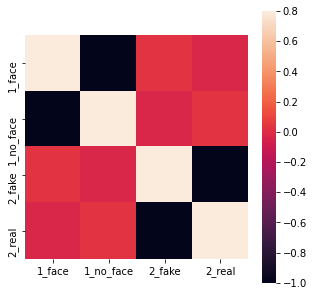

In [ ]:
%matplotlib inline
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cred_corr, vmax=0.8, square=True, ax=ax)

**Modeling**

**Wrod2Vec Model**

The function `preprocess_cred()` appends some stop words related to Twitter which do not contribute to the information gaining of the model, removes stop words in English and Spanish, computes the words' stemm, fills the `None` values with spaces, removes all words which do not contain alphanumeric characters, tokenize all the words, lowers all the words' characters, lemmatizes them and returns the cleaned tweets as a list of lists. This function was then applied to the item `text`.

In [ ]:
def preprocess_cred(features):
  from nltk.corpus import stopwords
  lemmatizer = WordNetLemmatizer() #groups different inflected forms of a word
  stop_words = stopwords.words(["english", "spanish"])
  stop_words.append('rt')
  stop_words.append('http')
  stop_words.append('Http')
  stop_words.append('co')
  stop_words.append('n')
  stop_words.append('u')
  stop_words.append('U')
  stop_words = stopwords.words("english")
  stemmer = PorterStemmer()
  features.loc[:, 'text'] = features.apply(lambda row: re.sub('[^a-zA-z]', ' ', row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word.lower() for word in row['text'] if word.isalpha()], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [word for word in row['text'] if word not in stop_words], axis=1)
  features.loc[:, 'text'] = features.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['text']], axis=1)

  articles = features['text'].tolist()

  return articles

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

cred1x_content = preprocess_cred(cred_slicetx3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
cred1x_content[0]

['tcot',
 'tgdn',
 'neil',
 'patrick',
 'harris',
 'announces',
 'hell',
 'host',
 'academy',
 'award',
 'neil',
 'patrick',
 'harris',
 'set',
 'http',
 'co',
 'bkaccd',
 'zh']

In [ ]:
cred1x_target = cred_slicetx3['label']

Here, a tokenizer object is applied to the tweets and transforms the tweets to sequences. Hence, each word is assigned to an index and the list of lists with the tweets' words is traduced to this index. Next, the length of the longest tweets is calculated (24 words). Having this, they can be padded which means that the tweets are transformed to a matrix which contains only zeros and ones at the position of the columns belonging to the numbers of the words in each tweet.

In [ ]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(cred1x_content)
cred1x_seq = tokenizer_obj.texts_to_sequences(cred1x_content)
cred1x_seq[1]

[693, 1048, 13, 18, 19, 287, 158, 22, 106, 107, 13, 18, 19, 601, 1, 2, 1549]

In [ ]:
longest_cred1xtweets = cred_slicetx3['text'].apply(len).max()
print(longest_cred1xtweets)

24


In [ ]:
longest_cred1xtweets = 24

In [ ]:
padded_cred_total = pad_sequences(cred1x_seq, longest_cred1xtweets)

In [ ]:
print(padded_cred_total.shape)
print(cred1x_target.shape)

(2287, 24)
(2287,)


In [ ]:
'''with open('padded_cred_total.pkl','wb') as f:
    pickle.dump(padded_cred_total, f)'''

In [ ]:
with open('padded_cred_total.pkl','rb') as f:
    padded_cred_total = pickle.load(f)
    print(padded_cred_total[0:1])

[[   0    0    0    0    0    0  779 2108   28   41   42  525  309   45
   222  205   28   41   42  310    1    2 3097 3098]]


In [ ]:
'''with open('cred1x_target.pkl','wb') as f:
    pickle.dump(cred1x_target, f)'''

In [ ]:
with open('cred1x_target.pkl','rb') as f:
    cred1x_target = pickle.load(f)
    print(cred1x_target[0:10])

[['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']]


Since the longest tweet contains 24 words and and the whole data set contained 2287 tweets, the pad matrix contains 24 columns and 2287 rows. Next, I storaged the column `label` as a separate data frame and took it as a target variable and the pad as feature variable to split and mix it. Parallelly to that I computed the embedding model using Word2Vec. There I used again 100 dimensions and a co-occurance window of 10 words before and after each computed word in the list of lists with the clean tweets. This model obtained a vocabulary of 4482 words.

In [ ]:
cred2_Xtrain, cred2_Xtest, cred2_ytrain, cred2_ytest = split_data(padded_cred_total, cred1x_target)

In [ ]:
model_w2v_cred1x = Word2Vec(cred1x_content,
                     min_count = 1,
                     window = 10,
                     iter = 100,
                     size = 100,
                     workers = 4)
print(model_w2v_cred1x)

Word2Vec(vocab=4482, size=100, alpha=0.025)


In [ ]:
cred1x_words = list(model_w2v_cred1x.wv.vocab)

In [ ]:
print(model_w2v_cred1x['obama'])

[ 0.731846   -0.48166558  0.2665963   1.2622018   0.2851727  -0.9193094
  0.10018761  0.43836048  0.3082736  -0.5158064  -0.18130392  0.8725686
 -0.5088199   0.6260849   0.3696304  -0.23926601  0.39548382 -0.69289666
 -0.7879041   0.7489193   0.4523303   0.1573152   0.8991736  -0.12031201
 -1.0526234   0.5604066  -0.17976575  0.10720398 -0.16752708  0.40488312
 -0.45928156  0.41453364  0.21700987  0.00378957  0.6451894  -0.8081193
  0.70417434  0.4556436   0.3549205  -0.7746948  -0.17657876  0.31975922
  1.0818996  -0.69208246 -0.655458   -0.33083996  1.1875107  -0.00951636
 -0.9140301   0.28335857  0.46370527 -0.35488838 -0.25264785 -0.5319048
  0.24857065 -0.90450716  0.23804687 -0.2754942   0.44025654 -1.252189
  0.14189681  0.2125959  -0.54045326  0.35328028  1.0278578   0.5245635
 -0.586832    0.51276034 -0.89634717 -1.4859943  -0.24046956 -0.4435206
  0.13699481 -0.6787326   0.13268028  0.36692968  0.86153036 -0.36456454
 -0.2551701   0.06012931 -0.0306283   0.3986628   0.2336326

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(cred1x_words[0:10])

['tcot', 'tgdn', 'neil', 'patrick', 'harris', 'announces', 'hell', 'host', 'academy', 'award']


In [ ]:
model_w2v_cred1x.wv.most_similar('obama', topn=10)

[('president', 0.8814597129821777),
 ('uncontained', 0.8723849058151245),
 ('exceedingly', 0.8652668595314026),
 ('administration', 0.8569154143333435),
 ('low', 0.8540021181106567),
 ('pandemic', 0.8399985432624817),
 ('deployment', 0.8396081924438477),
 ('potential', 0.8356410264968872),
 ('meet', 0.831143856048584),
 ('order', 0.8291370868682861)]

In [ ]:
embs_cred1x = 'cred1x_embeddings.txt'
model_w2v_cred1x.wv.save_word2vec_format(embs_cred1x, binary=False)

In [ ]:
cred1x_word_index = tokenizer_obj.word_index

In [ ]:
num_words_cred1x = len(cred1x_word_index)+1
print(num_words_cred1x)

4483


In [ ]:
num_words_cred1x = 4483

Here, the indexes resulted from the tokenizer object applied to the list of clean. Hence, the tokenizer object finds the "ones", looks the number of the corresponding column and uses this number to find the word. Once it has the word, it look for it in the embedding model. The embedding with the "ones" ins transformed to a numpy matrix. This numpy matrix can be used as input for the embedding layer of the neuronal network.

In [ ]:
cred1x_embeddings_index={}
with open("cred1x_embeddings.txt") as loaded_embs:
    for line in loaded_embs:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:])
        cred1x_embeddings_index[word]=coefs

In [ ]:
embedding_matrix_cred1x = np.zeros((num_words_cred1x, 100))

In [ ]:
for word, i in cred1x_word_index.items():
    if i > num_words_cred1x:
        continue
    try:
      embedding_vector=cred1x_embeddings_index[word]
    except:
      pass
    #dealing with words that we have not embeddings for
    if embedding_vector is not None:
        embedding_matrix_cred1x[i]=embedding_vector
#embedding_matrix is our lookup table
print(embedding_matrix_cred1x.shape)
print(num_words_cred1x)

(4483, 100)
4483


In [ ]:
embedding_cred1x_layer=Embedding(num_words_cred1x, #size of vocab
                                100, #size of embedding 
                                embeddings_initializer=Constant(embedding_matrix_cred1x), #weights to start with, and not touch during training
                                input_length=longest_cred1xtweets, 
                                trainable=False  # do no update these weights
                                )

For the purpose of tuning the hyperparameters, I defined the neuronal network as a function `model_credt()`. Again, I defined the neuronal network with one the embedding layer as input layer, next a dropout with a droput rate of 0.3, then a LSTM-layer with 256 neurons, a dropout with a dropout rate of 0.3 too and finally a single dense connected neuron as output layer with the sigmoid function as activation function. The whole neuronal network had the binary crossentropy function as loss function because it is again a binary classifification between `real` and `fake` information. The fine tunnin of the hyperparameters reported that the `RMSprop` was the optimizer which generated the best results with this model, for this reason I used it.

In [ ]:
def model_credt(embedding=embedding_cred1x_layer, dropout_rate=0.3, optimizer='RMSprop', neuron=256):
  model=Sequential()
  model.add(embedding)
  model.add(Dropout(dropout_rate))
  model.add(LSTM(neuron, recurrent_dropout=0.1))#GRU is a kind of LSTM layer that reduces de dimensionality of the previous layers by reducing the amount of gates.
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model_credt = KerasClassifier(build_fn=model_credt, batch_size=10, nb_epoch=100, verbose=0)

In [ ]:
model_credt = model_credt()

In [ ]:
model_credt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 100)           448300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 814,125
Trainable params: 365,825
Non-trainable params: 448,300
_________________________________________________________________


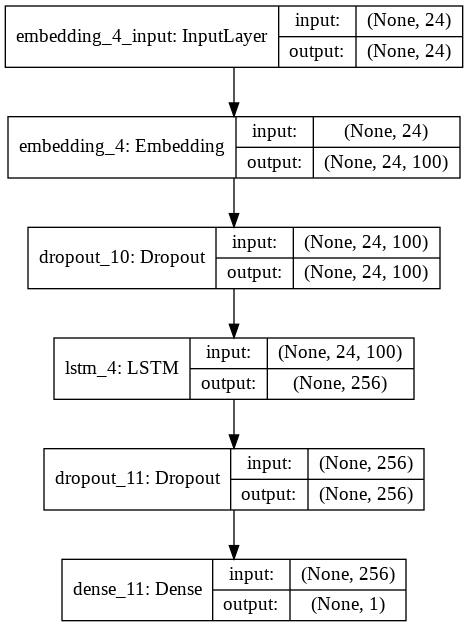

In [ ]:
plot_model(model_credt, 'model_credt.png', show_shapes=True, show_layer_names=True)

In [ ]:
cred2_ytest = cred2_ytest.reset_index(drop=True)

In [ ]:
batch_sizes=[10, 20, 40, 60, 80, 100]
param_grid = dict(batch_size=batch_sizes)

In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
neurons=[16, 32, 64, 128, 256, 512]
param_grid = dict(optimizer=optimizers, dropout_rate=dropout_rates, neuron=neurons)

In [ ]:
grid_cred_text = GridSearchCV(estimator=model_credt, param_grid=param_grid, n_jobs=2, cv=10)
grid_cred_result = grid_cred_text.fit(cred2_Xtrain, cred2_ytrain)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('Best %f using %s' % (grid_cred_result.best_score_, grid_cred_result.best_params_))
means = grid_cred_result.cv_results_['mean_test_score']
stds = grid_cred_result.cv_results_['std_test_score']
params = grid_cred_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.996875 using {'dropout_rate': 0.3, 'neuron': 256, 'optimizer': 'RMSprop'}
0.895000 (0.014197) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'SGD'}
0.988750 (0.006731) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'RMSprop'}
0.995625 (0.004002) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'Adagrad'}
0.983125 (0.007421) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'Adadelta'}
0.971875 (0.014856) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'Adam'}
0.953750 (0.010155) with: {'dropout_rate': 0.1, 'neuron': 16, 'optimizer': 'Adamax'}
0.892500 (0.017633) with: {'dropout_rate': 0.1, 'neuron': 32, 'optimizer': 'SGD'}
0.993125 (0.005192) with: {'dropout_rate': 0.1, 'neuron': 32, 'optimizer': 'RMSprop'}
0.995000 (0.005449) with: {'dropout_rate': 0.1, 'neuron': 32, 'optimizer': 'Adagrad'}
0.993125 (0.004375) with: {'dropout_rate': 0.1, 'neuron': 32, 'optimizer': 'Adadelta'}
0.991250 (0.004146) with: {'dropout_rate': 0.1, 'neuron': 32, 'optimi

In [ ]:
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
neurons=[16, 32, 64, 128, 256, 512]
param_dist_bin = dict(optimizer=optimizers, dropout_rate=dropout_rates, neuron=neurons)

In [ ]:
n_iter_search=3

In [ ]:
random_search = RandomizedSearchCV(estimator=model_credt,
                                   param_distributions=param_dist_bin,
                                   n_iter=n_iter_search,
                                   n_jobs=1,
                                   cv=10,
                                   verbose=0)

In [ ]:
random_search.fit(cred2_Xtrain, cred2_ytrain)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9502bfd160>,
                   iid='deprecated', n_iter=3, n_jobs=1,
                   param_distributions={'dropout_rate': [0.1, 0.2, 0.3, 0.4,
                                                         0.5],
                                        'neuron': [16, 32, 64, 128, 256, 512],
                                        'optimizer': ['SGD', 'RMSprop',
                                                      'Adagrad', 'Adadelta',
                                                      'Adam', 'Adamax']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print('Best %f using %s' % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.996250 using {'optimizer': 'Adagrad', 'neuron': 256, 'dropout_rate': 0.1}
0.995000 (0.006124) with: {'optimizer': 'RMSprop', 'neuron': 64, 'dropout_rate': 0.4}
0.996250 (0.003062) with: {'optimizer': 'Adagrad', 'neuron': 256, 'dropout_rate': 0.1}
0.984375 (0.006988) with: {'optimizer': 'RMSprop', 'neuron': 16, 'dropout_rate': 0.1}


In [ ]:
cred2_ytest = cred2_ytest.reset_index(drop=True)

For training the neuronal network I used a call back in order to restore the best results after ending the training process (the focus was more on this than in early stoping and therefore the patience was set on 250 iterations). I set the neuronal network altogether for 500 iterations.

In [ ]:
cb_credt=EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=250, restore_best_weights=True)

In [ ]:
history_wordcred1x=model_credt.fit(cred2_Xtrain, cred2_ytrain, batch_size=10, epochs=500, validation_data=(cred2_Xtest, cred2_ytest), shuffle=False, verbose=1, callbacks=[cb_credt])

Train on 1600 samples, validate on 687 samples
Epoch 1/500
1600/1600 [==============================] - 11s 7ms/step - loss: 0.0652 - accuracy: 0.9819 - val_loss: 0.0288 - val_accuracy: 0.9956
Epoch 2/500
1600/1600 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9937 - val_loss: 0.0142 - val_accuracy: 0.9971
Epoch 3/500
1600/1600 [==============================] - 9s 5ms/step - loss: 0.0212 - accuracy: 0.9962 - val_loss: 0.0131 - val_accuracy: 0.9971
Epoch 4/500
1600/1600 [==============================] - 9s 5ms/step - loss: 0.0291 - accuracy: 0.9950 - val_loss: 0.0167 - val_accuracy: 0.9971
Epoch 5/500
1600/1600 [==============================] - 9s 5ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 0.0076 - val_accuracy: 0.9985
Epoch 6/500
1600/1600 [==============================] - 9s 5ms/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 7/500
1600/1600 [==============================] - 9s 6ms/step - loss: 0.015

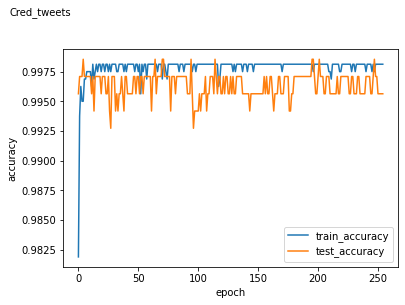

In [ ]:
show_history_acc(history_wordcred1x, 'Cred_tweets')

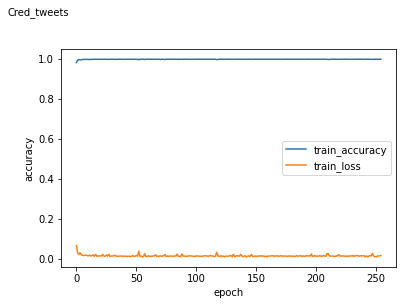

In [ ]:
show_history_loss(history_wordcred1x, 'Cred_tweets')

After having trained the neuronal network, the `model_credt()` calculates an accuracy of 0.998 with the best weights. After calculating the model's predictions of the test features set and setting a threshold of 0.5 for filtering the `real` from the `fake` tweets, the model obtained a precision of 1 and a recall of 0.99 for the `fake news` and a precision of 1 and a recall of 1 for the `real news`. The model's AUC was 0.994. **Caveat:** since the `label` data was so inbalanced, it is very likely that these results were overfitting. For this reason, I also balanced the whole data set in the following subsection.

In [ ]:
scores_cred2s={}
score_best_cred2s = model_credt.evaluate(cred2_Xtest, cred2_ytest, verbose=0)
scores_cred2s["credt_finetuned"] = score_best_cred2s
print('Test loss:', score_best_cred2s[0])
print('Test accuracy:', score_best_cred2s[1])

Test loss: 0.007583774476541881
Test accuracy: 0.9985443949699402


In [ ]:
credt_predict = model_credt.predict(cred2_Xtest)
credt_predict = (credt_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(cred2_ytest, credt_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       1.00      1.00      1.00       607

    accuracy                           1.00       687
   macro avg       1.00      0.99      1.00       687
weighted avg       1.00      1.00      1.00       687



In [ ]:
confusion_matrix(cred2_ytest, credt_predict)

array([[ 79,   1],
       [  0, 607]])

In [ ]:
fpr_credt, tpr_credt, thresholds_credt = roc_curve(cred2_ytest, credt_predict)

In [ ]:
auc_credt = auc(fpr_credt, tpr_credt)
auc_credt

0.99375

In [ ]:
model_credt.save('model_credt.h5')

**Benchmark**

As a benchmark I used the Random Forest Classifier. First of al I conducted a grid search in order to compute the hyperparameters that obtain the best results with this classifier.

In [ ]:
rfc = RandomForestClassifier(n_estimators=60)

In [ ]:
param_grid = {'n_estimators':[20, 40, 60, 80, 100],
              'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'min_samples_split':[4],
              'min_samples_leaf':[10]}

In [ ]:
grid_credt_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_credt_rfc.fit(cred2_Xtrain, cred2_ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=60, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(grid_credt_rfc.best_score_)
print(grid_credt_rfc.best_params_)
MyBestModel_rfc_bint = grid_credt_rfc.best_estimator_

0.9805978871006443
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100}


The best model was obtained having entropy as criterion, obtaining the maximum amount features with log2, defining minimum 10 samples in each leaf and 4 samples per split and 100 estimators.

In [ ]:
MyBestModel_rfc_credt = RandomForestClassifier(criterion='entropy', max_features='log2', min_samples_leaf=10, min_samples_split=4, n_estimators=100)

In [ ]:
MyBestModel_rfc_credt.fit(cred2_Xtrain, cred2_ytrain)
MyBestModelcredt_target_pred=MyBestModel_rfc_credt.predict(cred2_Xtest)
MyBestModelcredt_target_pred[0:5]

array([1, 1, 1, 0, 0])

In [ ]:
credt_target_matrix = metrics.confusion_matrix(cred2_ytest, MyBestModelcredt_target_pred)

Similarly to the neuronal network, the Random Forest Classifier calculated a precision of 0.98 and a recall of 0.55 for the `fake news` and a precision of 0.94 and a recall of 1 for the `real news`. The classifiers's AUC was 0.77 here.

In [ ]:
print('Confussion Matrix: \n', credt_target_matrix)

Confussion Matrix: 
 [[ 44  36]
 [  1 606]]


In [ ]:
print(classification_report(cred2_ytest, MyBestModelcredt_target_pred))

              precision    recall  f1-score   support

           0       0.98      0.55      0.70        80
           1       0.94      1.00      0.97       607

    accuracy                           0.95       687
   macro avg       0.96      0.77      0.84       687
weighted avg       0.95      0.95      0.94       687



In [ ]:
fpr_rf_credt, tpr_rf_credt, thresholds_rf_credt = roc_curve(cred2_ytest, MyBestModelcredt_target_pred)

In [ ]:
auc_rf_credt = auc(fpr_rf_credt, tpr_rf_credt)
auc_rf_credt

0.774176276771005

**ROC-curve**

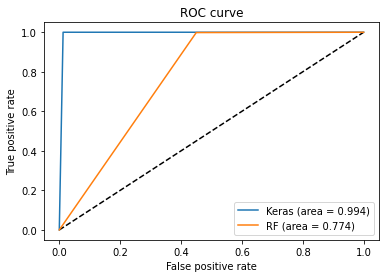

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_credt, tpr_credt, label='Keras (area = {:.3f})'.format(auc_credt))
plt.plot(fpr_rf_credt, tpr_rf_credt, label='RF (area = {:.3f})'.format(auc_rf_credt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Neuronal network (face/not face)**

In order to define the neuronal network model to predict whether the tweets are either `real` or `fake` I converted the data types of the variables `is_face` and `label` to integers and apply the function `split_data()` in order to define the train and test sets of the feature item and the target item.

In [ ]:
cred_slicetx3.head()

,author_name,tweet_id,label,text,pictures,is_face
0,YodaCon,522759166301970000,1,"""#TCOT #TGDN Neil Patrick Harris announces hel...",FXVuexM9.jpg,0
1,RssWeeds,522759163902825000,1,"""#business #biz Neil Patrick Harris announces...",nQlJiUXt.jpeg,0
2,RssMarijuana,522759161860203000,1,"""#business #biz Neil Patrick Harris announces...",-RSLMnuJ.jpeg,0
3,HJBrown12,522759070202491000,1,RT @VanityFair: Who else is excited to see @Ac...,default_profile.png,0
4,DustinEvans1,522759014531473000,1,Everyone is reporting that Neil Patrick Harris...,60828edc65954e729d8229b3d1f3bc2a.jpeg,1


In [ ]:
cred_slicetx3.dtypes

author_name    object
tweet_id       object
label           int64
text           object
pictures       object
is_face         int64
dtype: object

In [ ]:
cred_slicetx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_name  2287 non-null   object
 1   tweet_id     2287 non-null   object
 2   label        2287 non-null   int64 
 3   text         2287 non-null   object
 4   pictures     2287 non-null   object
 5   is_face      2287 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 107.3+ KB


In [ ]:
cred_slicetx3['label'] = cred_slicetx3.label.astype(int)
cred_slicetx3['is_face'] = cred_slicetx3.is_face.astype(int)

In [ ]:
credf_features = cred_slicetx3['is_face']
credf_target = cred_slicetx3['label']

In [ ]:
cred_f_Xtrain, cred_f_Xtest, cred_f_ytrain, cred_f_ytest = split_data(credf_features, credf_target)

In [ ]:
print(cred_f_Xtrain.shape)
print(cred_f_ytrain.shape)
print(cred_f_Xtest.shape)
print(cred_f_ytest.shape)

(1600,)
(1600,)
(687,)
(687,)


The neuronal network is declared as a function in ored be able to define the different input variables which have to be next fine tunned. In general, the neuronal network was defined as `Sequential()` with 4 fully connected layers and two dropout rates between the first 3 layers. Also the input layer had a shape of (1,) because it has to contain the amount of items contained in the input data frame. The output layer had 1 neuron which was activated with a sigmoid function for it to carry out the binary classification between `real` and `fake` tweets. Also the binary crossentropy loss function was implemented for this purpose.

In [ ]:
def model_credf(neuron=256, activation='softmax', optimizer='SGD', dropout_rate=0.4, init_form='uniform'):
  model = Sequential()
  model.add(Dense(neuron, activation=activation, kernel_initializer=init_form, bias_initializer='zeros', input_shape=(1,)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron, activation=activation, kernel_initializer=init_form, bias_initializer='zeros'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron, activation=activation, kernel_initializer=init_form, bias_initializer='zeros'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=init_form, bias_initializer='zeros'))
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model_credf = KerasClassifier(build_fn=model_credf, epochs=100, verbose=0)

In [ ]:
model_credf = model_credf()

In [ ]:
model_credf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
________________________________________________

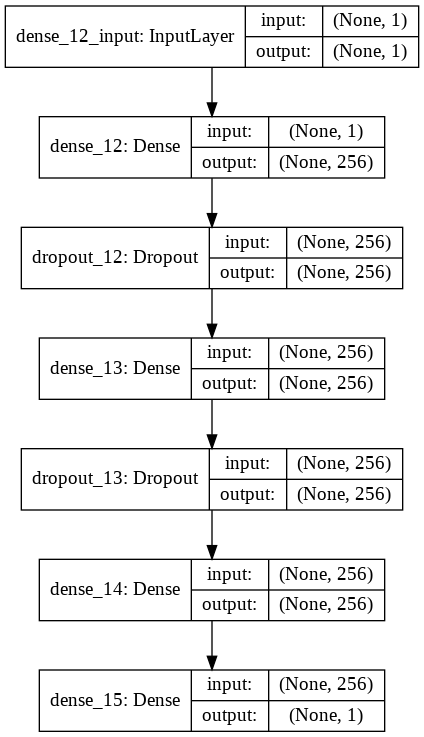

In [ ]:
plot_model(model_credf, 'model_credf.png', show_shapes=True, show_layer_names=True)

Previous to the model training, the Keras classifier wrapper was used to conduct both a Grid Search and a Random Search in order to find the hyperparameters that produce the best results with this neuronal network. Since the amount of items to be regarded in this case was small, I decided to conduct the tunning process of the hyperparameters with the complete data set. This process demonstrated that the `uniform initializer`, the `Softmax activation` and a `dropout rate` of 0.4 maximized the model's results. Also the `SGD optimizer` and an amount of 256 neurons maximized the results of the neuronal network.

In [ ]:
neurons=[16, 32, 64, 128, 256, 512]
param_grid=dict(neuron=neurons)

In [ ]:
batch_sizes=[10, 20, 40, 60, 80, 100]
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid=dict(batch_size=batch_sizes, optimizer=optimizers)

In [ ]:
init_forms=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid=dict(init_form=init_forms)

In [ ]:
activations=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5]
param_grid=dict(activation=activations, dropout_rate=dropout_rates)

In [ ]:
grid_credf = GridSearchCV(estimator=model_credf, param_grid=param_grid, n_jobs=2, cv=10)
grid_cred_result = grid_credf .fit(cred_f_Xtrain, cred_f_ytrain)

In [ ]:
print('Best %f using %s' % (grid_cred_result.best_score_, grid_cred_result.best_params_))
means = grid_cred_result.cv_results_['mean_test_score']
stds = grid_cred_result.cv_results_['std_test_score']
params = grid_cred_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.894375 using {'activation': 'softmax', 'dropout_rate': 0.1}
0.894375 (0.016642) with: {'activation': 'softmax', 'dropout_rate': 0.1}
0.894375 (0.016642) with: {'activation': 'softmax', 'dropout_rate': 0.2}
0.894375 (0.016642) with: {'activation': 'softmax', 'dropout_rate': 0.3}
0.894375 (0.016642) with: {'activation': 'softmax', 'dropout_rate': 0.4}
0.894375 (0.016642) with: {'activation': 'softmax', 'dropout_rate': 0.5}
0.894375 (0.016642) with: {'activation': 'softplus', 'dropout_rate': 0.1}
0.894375 (0.016642) with: {'activation': 'softplus', 'dropout_rate': 0.2}
0.894375 (0.016642) with: {'activation': 'softplus', 'dropout_rate': 0.3}
0.894375 (0.016642) with: {'activation': 'softplus', 'dropout_rate': 0.4}
0.894375 (0.016642) with: {'activation': 'softplus', 'dropout_rate': 0.5}
0.894375 (0.016642) with: {'activation': 'softsign', 'dropout_rate': 0.1}
0.894375 (0.016642) with: {'activation': 'softsign', 'dropout_rate': 0.2}
0.894375 (0.016642) with: {'activation': 'softsign

In [ ]:
neurons=[16, 32, 64, 128, 256, 512]
batch_sizes=[10, 20, 40, 60, 80, 100]
init_forms=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizers=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
dropout_rates=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_dist_credf = dict(neuron=neurons, batch_size=batch_sizes, init_form=init_forms, optimizer=optimizers, dropout_rate=dropout_rates)
n_iter_search=3

In [ ]:
random_search = RandomizedSearchCV(estimator=model_credf,
                                   param_distributions=param_dist_bin,
                                   n_iter=n_iter_search,
                                   n_jobs=1,
                                   cv=10,
                                   verbose=0)

In [ ]:
random_search.fit(cred_sl_Xtrain, cred_sl_ytrain)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f030a386240>,
                   iid='deprecated', n_iter=3, n_jobs=1,
                   param_distributions={'batch_size': [10, 20, 40, 60, 80, 100],
                                        'dropout_rate': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9],
                                        'init_form': ['uniform',
                                                      'lecun_uniform', 'normal',
                                                      'zero', 'glorot_normal',
                                                      'glorot_uniform',
                                                      'he_normal',
                                                      'he_uniform'],
                                        'neuron': 

In [ ]:
print('Best %f using %s' % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r'%(mean, stdev, param))

Best 0.894375 using {'optimizer': 'Adamax', 'neuron': 256, 'init_form': 'he_uniform', 'dropout_rate': 0.4, 'batch_size': 10}
0.894375 (0.016642) with: {'optimizer': 'Adamax', 'neuron': 256, 'init_form': 'he_uniform', 'dropout_rate': 0.4, 'batch_size': 10}
0.894375 (0.016642) with: {'optimizer': 'Adadelta', 'neuron': 16, 'init_form': 'zero', 'dropout_rate': 0.6, 'batch_size': 10}
0.894375 (0.016642) with: {'optimizer': 'SGD', 'neuron': 32, 'init_form': 'uniform', 'dropout_rate': 0.5, 'batch_size': 100}


In the model was also implemented a `call back` with a patience of 800 epochs. The focus of the the implementation of the callback was to restore the best weights by producing the best accuracy result and therefore the amount of patience epochs is slightly lower than the total epoch amount of 1000. Also the `batch sice` of 20 seemed to be the best in order to maximize the model's result.

In [ ]:
cb_credf=EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=800, restore_best_weights=True)

In [ ]:
history_credf=model_credf.fit(cred_f_Xtrain, cred_f_ytrain, batch_size=20, epochs=1000, validation_data=(cred_f_Xtest, cred_f_ytest), shuffle=True, callbacks=[cb_credf], verbose=1)

Train on 1600 samples, validate on 687 samples
Epoch 1/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6390 - accuracy: 0.8856 - val_loss: 0.5933 - val_accuracy: 0.8836
Epoch 2/1000
1600/1600 [==============================] - 0s 154us/step - loss: 0.5537 - accuracy: 0.8944 - val_loss: 0.5264 - val_accuracy: 0.8836
Epoch 3/1000
1600/1600 [==============================] - 0s 159us/step - loss: 0.4957 - accuracy: 0.8944 - val_loss: 0.4807 - val_accuracy: 0.8836
Epoch 4/1000
1600/1600 [==============================] - 0s 163us/step - loss: 0.4554 - accuracy: 0.8944 - val_loss: 0.4489 - val_accuracy: 0.8836
Epoch 5/1000
1600/1600 [==============================] - 0s 159us/step - loss: 0.4269 - accuracy: 0.8944 - val_loss: 0.4264 - val_accuracy: 0.8836
Epoch 6/1000
1600/1600 [==============================] - 0s 181us/step - loss: 0.4063 - accuracy: 0.8944 - val_loss: 0.4102 - val_accuracy: 0.8836
Epoch 7/1000
1600/1600 [==============================] - 0s 195us/

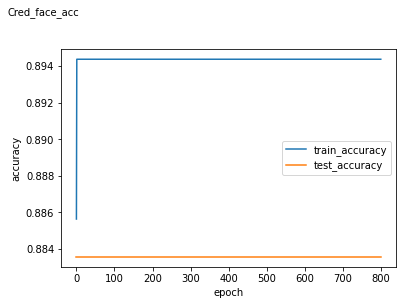

In [ ]:
show_history_acc(history_credf, 'Cred_face_acc')

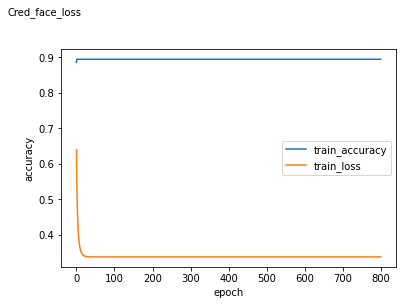

In [ ]:
show_history_loss(history_credf, 'Cred_face_loss')

After a long training process the model computed an accuracy of 0.883. However, after filtering the values above and below 0.5, the model computes a precision of 0 and a recall of 0 for the `fake news` and a precision of 0 and a recall of 0 for the `real news`. The model's AUC is equal to 0.5. After taking a deeper view on the model's output, it shows that it only produces the values 0.42 and 0.47 which means that the output has a high deviation.

In [ ]:
scores_credf={}
score_best_credf = model_credf.evaluate(cred_f_Xtest, cred_f_ytest, verbose=0)
scores_credf["credt_finetuned"] = score_best_credf
print('Test loss:', score_best_credf[0])
print('Test accuracy:', score_best_credf[1])

Test loss: 0.5933184942130265
Test accuracy: 0.8835516571998596


In [ ]:
credf_predict = model_credf.predict(cred_f_Xtest)
credf_predict = (credf_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(cred_f_ytest, credf_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.88      1.00      0.94       607

    accuracy                           0.88       687
   macro avg       0.44      0.50      0.47       687
weighted avg       0.78      0.88      0.83       687



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(cred_f_ytest, credf_predict)

array([[  0,  80],
       [  0, 607]])

In [ ]:
fpr_credf, tpr_credf, thresholds_credf = roc_curve(cred_f_ytest, credf_predict)

In [ ]:
auc_credf = auc(fpr_credf, tpr_credf)
auc_credf

0.5

In [ ]:
model_cred_mix.save('model_credf.h5')

**Resampling**

According to the previous report about theinbalanced distribution of the item `label` and also regarding the underperforming AUC value for the neuronal network trained with the data set containing the item `is_face`, it was mandatory to resample the data set in order to prove the models (specially to prove the mixed data model with the resampled data). Therefore, three different resampling strategies were implemented: the "random oversampling" (ros), the "synthetic minority oversampling" (SMOTE) and the "random undersampling" (rus). Both resampling strategies `ros` and `SMOTE` produced an output of 2038 rows for both values included in the item `label`. `rus` on the other hand produced 249 rows for each value of the item `label`.

In [ ]:
credf_features.shape

(2287,)

In [ ]:
ros = RandomOverSampler(random_state=80)
Xros_credf, yros_credf = ros.fit_sample(credf_features[:, None], credf_target)
print(Xros_credf[0:10])
print(yros_credf[0:10])

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print(sorted(Counter(yros_credf).items()))

[(0, 2038), (1, 2038)]


In [ ]:
smote = SMOTE(random_state=80)
Xsmote_credf, ysmote_credf = smote.fit_sample(credf_features[:, None], credf_target)
print(Xsmote_credf[0:10])
print(ysmote_credf[0:10])

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print(sorted(Counter(ysmote_credf).items()))

[(0, 2038), (1, 2038)]


In [ ]:
rus = RandomUnderSampler(random_state=80)
Xrus_credf, yrus_credf = rus.fit_sample(credf_features[:, None], credf_target)
print(Xrus_credf[0:10])
print(yrus_credf[0:10])

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print(sorted(Counter(yrus_credf).items()))

[(0, 249), (1, 249)]


In order to chose one the resampling strategies, I trained the neuronal network having the data set with the items `is_face` and `label` as input resampled with the three different strategies and then I compared the different accuracies produced by each input. The model feed with the `ros` values produced an accuracy of 0.714, with the `SMOTE` values produced an accuracy of 0.7249 and the `rus` values produced an accuracy of 0.794. For this reason I decided to use the `rus` strategy.

In [ ]:
history_credf=model_credf.fit(Xsmote_credf, ysmote_credf, batch_size=20, epochs=1000, validation_split=0.3, shuffle=True, callbacks=[cb_credf], verbose=1)

Train on 2853 samples, validate on 1223 samples
Epoch 1/1000
2853/2853 [==============================] - 0s 175us/step - loss: 0.6193 - accuracy: 0.7143 - val_loss: 1.0016 - val_accuracy: 0.0000e+00
Epoch 2/1000
2853/2853 [==============================] - 0s 171us/step - loss: 0.6093 - accuracy: 0.7143 - val_loss: 1.0661 - val_accuracy: 0.0000e+00
Epoch 3/1000
2853/2853 [==============================] - 1s 181us/step - loss: 0.6041 - accuracy: 0.7143 - val_loss: 1.1145 - val_accuracy: 0.0000e+00
Epoch 4/1000
2853/2853 [==============================] - 0s 174us/step - loss: 0.6014 - accuracy: 0.7143 - val_loss: 1.1502 - val_accuracy: 0.0000e+00
Epoch 5/1000
2853/2853 [==============================] - 1s 179us/step - loss: 0.5999 - accuracy: 0.7143 - val_loss: 1.1779 - val_accuracy: 0.0000e+00
Epoch 6/1000
2853/2853 [==============================] - 0s 175us/step - loss: 0.5992 - accuracy: 0.7143 - val_loss: 1.1975 - val_accuracy: 0.0000e+00
Epoch 7/1000
2853/2853 [================

In [ ]:
#ros
scores_credf={}
score_best_credf = model_credf.evaluate(Xros_credf, yros_credf, verbose=0)
scores_credf["credt_finetuned"] = score_best_credf
print('Test loss:', score_best_credf[0])
print('Test accuracy:', score_best_credf[1])

Test loss: 0.7135366790428012
Test accuracy: 0.5


In [ ]:
#smote
scores_credf={}
score_best_credf = model_credf.evaluate(Xrus_credf, yrus_credf, verbose=0)
scores_credf["credt_finetuned"] = score_best_credf
print('Test loss:', score_best_credf[0])
print('Test accuracy:', score_best_credf[1])

Test loss: 0.7296772001976948
Test accuracy: 0.5


In [ ]:
#rus
scores_credf={}
score_best_credf = model_credf.evaluate(Xsmote_credf, ysmote_credf, verbose=0)
scores_credf["credt_finetuned"] = score_best_credf
print('Test loss:', score_best_credf[0])
print('Test accuracy:', score_best_credf[1])

Test loss: 0.7943281078011061
Test accuracy: 0.5


**Benchmark**

As benchmark I chose the Random Forest Classifier. For using it, the values included in the item `is_face` had to be mapped to their semantic name to be able then to compute its dummy values. Next, I conducted both a grid search with the train set. The model overperformed having `gini` as criterion, calculating the maximum amount of features according to `auto`, having a minimum of 30 samples per leaf, a minimum of 4 splits per leaf and 20 estimators.

In [ ]:
credf_features = credf_features.map({0 : 'no_face', 1 : 'face'})
credf_features.head()

0    no_face
1    no_face
2    no_face
3    no_face
4       face
Name: is_face, dtype: object

In [ ]:
credf_features = pd.get_dummies(credf_features)
credf_features.head()

,face,no_face
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
cred_sl_Xtrain, cred_sl_Xtest, cred_sl_ytrain, cred_sl_ytest = split_data(credf_features, credf_target)

In [ ]:
rfc=RandomForestClassifier(n_estimators=60)

In [ ]:
param_grid={'n_estimators':[20, 40, 60, 80, 100],
              'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'min_samples_split':[4],
              'min_samples_leaf':[10, 20, 30]}

In [ ]:
grid_credf_rfc=GridSearchCV(rfc, param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_credf_rfc.fit(cred_sl_Xtrain, cred_sl_ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=60, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(grid_credf_rfc.best_score_)
print(grid_credf_rfc.best_params_)
MyBestModel_rfc_bin = grid_credf_rfc.best_estimator_

0.5048188331276566
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 4, 'n_estimators': 20}


In [ ]:
MyBestModel_rfc_credf = RandomForestClassifier(criterion='gini', max_features='auto', min_samples_leaf=30, min_samples_split=4, n_estimators=20)

In [ ]:
MyBestModel_rfc_credf.fit(cred_sl_Xtrain, cred_sl_ytrain)
MyBestModelcredf_target_pred=MyBestModel_rfc_credf.predict(cred_sl_Xtest)
MyBestModelcredf_target_pred[0:5]

array([1, 1, 1, 1, 1])

This Random Forest Classifier calculated a precision of 0 and a recall of 0 too for the `fake news` and a precision of 0.88 and a recall of 1 for the `real news`. The classifiers's AUC was 0.5 here. Again, the low performance of the Random Forest Classifier might be related with the inbalanced distributionof the item `label`.

In [ ]:
credf_target_matrix = metrics.confusion_matrix(cred_sl_ytest, MyBestModelcredf_target_pred)
print('Confussion Matrix: \n', credf_target_matrix)

Confussion Matrix: 
 [[  0  80]
 [  0 607]]


In [ ]:
print(classification_report(cred_sl_ytest, MyBestModelcredf_target_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.88      1.00      0.94       607

    accuracy                           0.88       687
   macro avg       0.44      0.50      0.47       687
weighted avg       0.78      0.88      0.83       687



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fpr_rf_credf, tpr_rf_credf, thresholds_rf_credf = roc_curve(cred_sl_ytest, MyBestModelcredf_target_pred)

In [ ]:
auc_rf_credf = auc(fpr_rf_credf, tpr_rf_credf)
auc_rf_credf

0.5

**ROC-curve**

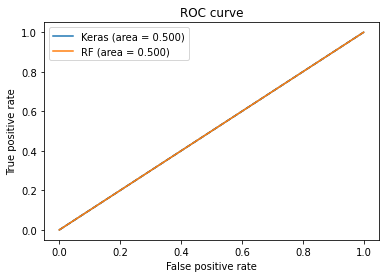

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_credf, tpr_credf, label='Keras (area = {:.3f})'.format(auc_credf))
plt.plot(fpr_rf_credf, tpr_rf_credf, label='RF (area = {:.3f})'.format(auc_rf_credf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Resampling the NLP model**

In order to resample the NLP model, I tested it using only the `ros` and `SMOTE` resampling strategy because the amount of topics within the data set was alreadys scarce and these strategies oversample the data. Moreover, I implemented againn the same embedding and the same hyperparameters that I used for training the model without resampled data.

In [ ]:
ros = RandomOverSampler(random_state=80)
Xros_credt, yros_credt = ros.fit_sample(padded_cred_total, cred1x_target)
print(Xros_credt[0:10])
print(yros_credt[0:10])

[[   0    0    0    0    0    0  489 1047   13   18   19  287  158   22
   106  107   13   18   19  196    1    2 1547 1548]
 [   0    0    0    0    0    0    0  693 1048   13   18   19  287  158
    22  106  107   13   18   19  601    1    2 1549]
 [   0    0    0    0    0    0  693 1048   13   18   19  287  158   22
   106  107   13   18   19  601    1    2  182 1550]
 [   0    0    0    0    0    0    0    0    3  450  419  420  124   92
    22   23  332   83   13    1    2  543    1    2]
 [   0    0    0    0    0    0    0    0    0    0 1551 1049   13   18
    19  856   22   23 1552   19  857 1553  355   75]
 [   0    0    0    0    0    0    0    0    0    0    0  390   13   18
    19   22   23    1    2  858 1050 1554  694  695]
 [   0    0    0    0    0    0    0    0    0    0  106  107  207 1555
   159 1556   13   18   19   22   23    1    2 1557]
 [   0    0    0    0    0    0    0    0   26   13   18   19   29   23
    22  160  172  602    1    2 1558  161 1051  135]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Xros_credt.shape)
print(yros_credt.shape)

(4076, 24)
(4076,)


In [ ]:
smote = SMOTE(random_state=80)
Xsmote_credt, ysmote_credt = smote.fit_sample(padded_cred_total, cred1x_target)
print(Xsmote_credt[0:10])
print(ysmote_credt[0:10])

[[   0    0    0    0    0    0  489 1047   13   18   19  287  158   22
   106  107   13   18   19  196    1    2 1547 1548]
 [   0    0    0    0    0    0    0  693 1048   13   18   19  287  158
    22  106  107   13   18   19  601    1    2 1549]
 [   0    0    0    0    0    0  693 1048   13   18   19  287  158   22
   106  107   13   18   19  601    1    2  182 1550]
 [   0    0    0    0    0    0    0    0    3  450  419  420  124   92
    22   23  332   83   13    1    2  543    1    2]
 [   0    0    0    0    0    0    0    0    0    0 1551 1049   13   18
    19  856   22   23 1552   19  857 1553  355   75]
 [   0    0    0    0    0    0    0    0    0    0    0  390   13   18
    19   22   23    1    2  858 1050 1554  694  695]
 [   0    0    0    0    0    0    0    0    0    0  106  107  207 1555
   159 1556   13   18   19   22   23    1    2 1557]
 [   0    0    0    0    0    0    0    0   26   13   18   19   29   23
    22  160  172  602    1    2 1558  161 1051  135]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Xsmote_credt.shape)
print(ysmote_credt.shape)

(4076, 24)
(4076,)


In [ ]:
print(sorted(Counter(yros_credt).items()))
print(sorted(Counter(ysmote_credt).items()))

[(0, 2038), (1, 2038)]
[(0, 2038), (1, 2038)]


In [ ]:
credros_Xtrain, credros_Xtest, credros_ytrain, credros_ytest = split_data(Xros_credt, yros_credt)
#credsmote_Xtrain, credsmote_Xtest, credsmote_ytrain, credsmote_ytest = split_data(Xsmote_credt, ysmote_credt)

Afterward, I tested the data setsresampled only with the `ros` and `smote` resampling strategy in order to find the one that trained the model with the highes accuracy. The model computed a slightly higher accuracy with the `ros` strategy and therefore I used it to resample the data at the NLP model.

In [ ]:
history_wordcred1x=model_credt.fit(credros_Xtrain, credros_ytrain, batch_size=10, epochs=500, validation_data=(credros_Xtest, credros_ytest), shuffle=False, verbose=1, callbacks=[cb_credt])

Train on 2853 samples, validate on 1223 samples
Epoch 1/500
2853/2853 [==============================] - 18s 6ms/step - loss: 0.0569 - accuracy: 0.9807 - val_loss: 0.0175 - val_accuracy: 0.9959
Epoch 2/500
2853/2853 [==============================] - 16s 6ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 3/500
2853/2853 [==============================] - 16s 6ms/step - loss: 0.0134 - accuracy: 0.9979 - val_loss: 0.0101 - val_accuracy: 0.9975
Epoch 4/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0175 - accuracy: 0.9958 - val_loss: 0.0076 - val_accuracy: 0.9984
Epoch 5/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0164 - accuracy: 0.9979 - val_loss: 0.0091 - val_accuracy: 0.9984
Epoch 6/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 0.0112 - val_accuracy: 0.9975
Epoch 7/500
2853/2853 [==============================] - 15s 5ms/step - loss

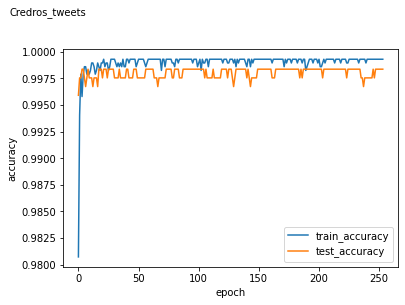

In [ ]:
show_history_acc(history_wordcred1x, 'Credros_tweets')

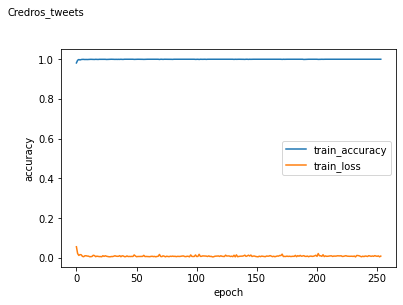

In [ ]:
show_history_loss(history_wordcred1x, 'Credros_tweets')

In [ ]:
scores_cred2s={}
score_best_credros = model_credt.evaluate(credros_Xtest, credros_ytest, verbose=0)
scores_cred2s["credt_finetuned"] = score_best_credros
print('Test loss:', score_best_credros[0])
print('Test accuracy:', score_best_credros[1])

Test loss: 0.010605883004661252
Test accuracy: 0.9983646869659424


In [ ]:
history_wordcred1x=model_credt.fit(credsmote_Xtrain, credsmote_ytrain, batch_size=10, epochs=500, validation_data=(credsmote_Xtest, credsmote_ytest), shuffle=False, verbose=1, callbacks=[cb_credt])

Train on 2853 samples, validate on 1223 samples
Epoch 1/500
2853/2853 [==============================] - 16s 5ms/step - loss: 0.1242 - accuracy: 0.9723 - val_loss: 0.0199 - val_accuracy: 0.9935
Epoch 2/500
2853/2853 [==============================] - 16s 5ms/step - loss: 0.0299 - accuracy: 0.9919 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 3/500
2853/2853 [==============================] - 16s 5ms/step - loss: 0.0197 - accuracy: 0.9965 - val_loss: 0.0213 - val_accuracy: 0.9967
Epoch 4/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0163 - accuracy: 0.9968 - val_loss: 0.0269 - val_accuracy: 0.9959
Epoch 5/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.0213 - val_accuracy: 0.9967
Epoch 6/500
2853/2853 [==============================] - 15s 5ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.0240 - val_accuracy: 0.9951
Epoch 7/500
2853/2853 [==============================] - 15s 5ms/step - loss

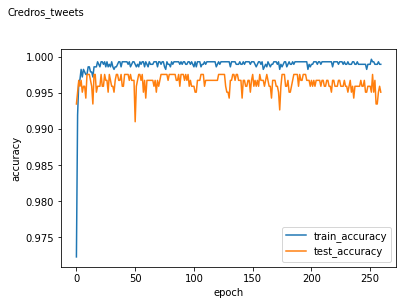

In [ ]:
show_history_acc(history_wordcred1x, 'Credros_tweets')

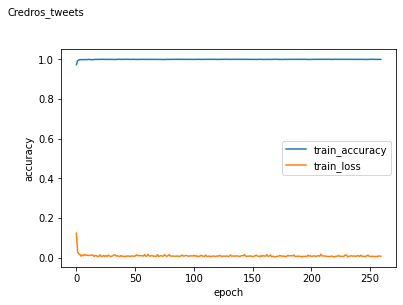

In [ ]:
show_history_loss(history_wordcred1x, 'Credros_tweets')

In [ ]:
scores_cred2s={}
score_best_credsmote = model_credt.evaluate(credsmote_Xtest, credsmote_ytest, verbose=0)
scores_cred2s["credt_finetuned"] = score_best_credsmote
print('Test loss:', score_best_credsmote[0])
print('Test accuracy:', score_best_credsmote[1])

Test loss: 0.024131009413535767
Test accuracy: 0.9975470304489136


In [ ]:
credtros_predict = model_credt.predict(credros_Xtest)
credtros_predict = (credtros_predict>0.5)
print('\nClassification report:\n', classification_report(credros_ytest, credtros_predict))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       613
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1223
   macro avg       1.00      1.00      1.00      1223
weighted avg       1.00      1.00      1.00      1223



In [ ]:
confusion_matrix(credros_ytest, credtros_predict)

array([[613,   0],
       [  2, 608]])

In [ ]:
fpr_credros, tpr_credros, thresholds_credros = roc_curve(credros_ytest, credtros_predict)

In [ ]:
auc_credros = auc(fpr_credros, tpr_credros)
auc_credros

0.9983606557377049

In [ ]:
model_credt.save('model_credtros.hdf5')

**Benchmark**

In [ ]:
MyBestModel_rfc_credt.fit(credros_Xtrain, credros_ytrain)
MyBestModelcredtros_target_pred=MyBestModel_rfc_credt.predict(credros_Xtest)
MyBestModelcredtros_target_pred[0:5]

array([0, 1, 0, 0, 1])

In [ ]:
credtros_target_matrix = metrics.confusion_matrix(credros_ytest, MyBestModelcredtros_target_pred)
print('Confussion Matrix: \n', credtros_target_matrix)

Confussion Matrix: 
 [[605   8]
 [ 11 599]]


In [ ]:
print(classification_report(credros_ytest, MyBestModelcredtros_target_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       613
           1       0.99      0.98      0.98       610

    accuracy                           0.98      1223
   macro avg       0.98      0.98      0.98      1223
weighted avg       0.98      0.98      0.98      1223



In [ ]:
fpr_rfc_credros, tpr_rfc_credros, thresholds_rfc_credros = roc_curve(credros_ytest, credtros_predict)

In [ ]:
auc_rfc_credros = auc(fpr_rfc_credros, tpr_rfc_credros)
auc_rfc_credros

0.9983606557377049

**ROC curve**

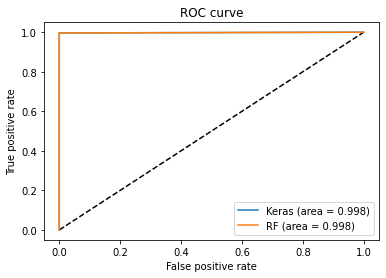

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_credros, tpr_credros, label='Keras (area = {:.3f})'.format(auc_credros))
plt.plot(fpr_rfc_credros, tpr_rfc_credros, label='RF (area = {:.3f})'.format(auc_rfc_credros))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Mixed data**

Next, both neuronal network's were mixed (beginning with the imbalanced data set) in order to be able to conduct the analysis with mixed data as input. Therefore I defined as first input the NLP model with a shape of (24,) since the longest tweet contains 24 words (and so does the embedding matrix). Subsequently I defined the embedding layer with the same embedding model followed by a LSTM-layer with 256 neurons. In between was defined a dropout with a rate of 0.3. The second input was also declared with a shape of (1,) since it contains the amount of columns of the data frame that has to be used as input (which is the the data set with the item `is_face`. The second input included two fully connected Dense-layers both containing 256 neurons and previous to both Dense layers was declared a dropout with a dropout rate of 0.4 in both cases. Both input models got concatenated with a single Dense layer that contained 10 neurons activated by a `relu` function. An finally, this Dense layer was connected to the last Dense layer which contained solely one neuron (again, activated with a sigmoid function for the binary classification issue). Also the loss function was set to a binary crossentropy function. To train this model was used also the call backs used for the NLP model which had the main purpose to restore the weights that produced the best model's result. Again, therefore it had a patience of 300 epochs. The whole model was trained with the train and test set for 500 epochs.

In [ ]:
input_cred_1 = Input(shape=(24,))
embedding_layer = Embedding(num_words_cred1x, #size of vocab
                            100, #size of embedding 
                            embeddings_initializer=Constant(embedding_matrix_cred1x), #weights to start with, and not touch during training
                            input_length=longest_cred1xtweets, 
                            trainable=False)(input_cred_1)
dropout_layer_text = Dropout(0.3)(embedding_layer)
LSTM_cred_layer = LSTM(256, recurrent_dropout=0.1)(dropout_layer_text)


input_cred_2 = Input(shape=(1,))
dropout_layer_face1 = Dropout(0.4)(input_cred_2)
dense_cred_layer1 = Dense(256, activation='softmax', kernel_initializer='uniform', bias_initializer='zeros')(dropout_layer_face1)
dropout_layer_face2 = Dropout(0.4)(dense_cred_layer1)
dense_cred_layer2 = Dense(256, activation='softmax', kernel_initializer='uniform', bias_initializer='zeros')(dropout_layer_face2)


concat_layer = Concatenate()([LSTM_cred_layer, dense_cred_layer2])
dense_cred_layer3 = Dense(10, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')(concat_layer)
output_cred_layer = Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')(dense_cred_layer3)


model_cred_mix = Model(inputs=[input_cred_1, input_cred_2], outputs=output_cred_layer)

In [ ]:
model_cred_mix.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
model_cred_mix.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 24, 100)      448300      input_1[0][0]                    
____________________________________________________________________________________________

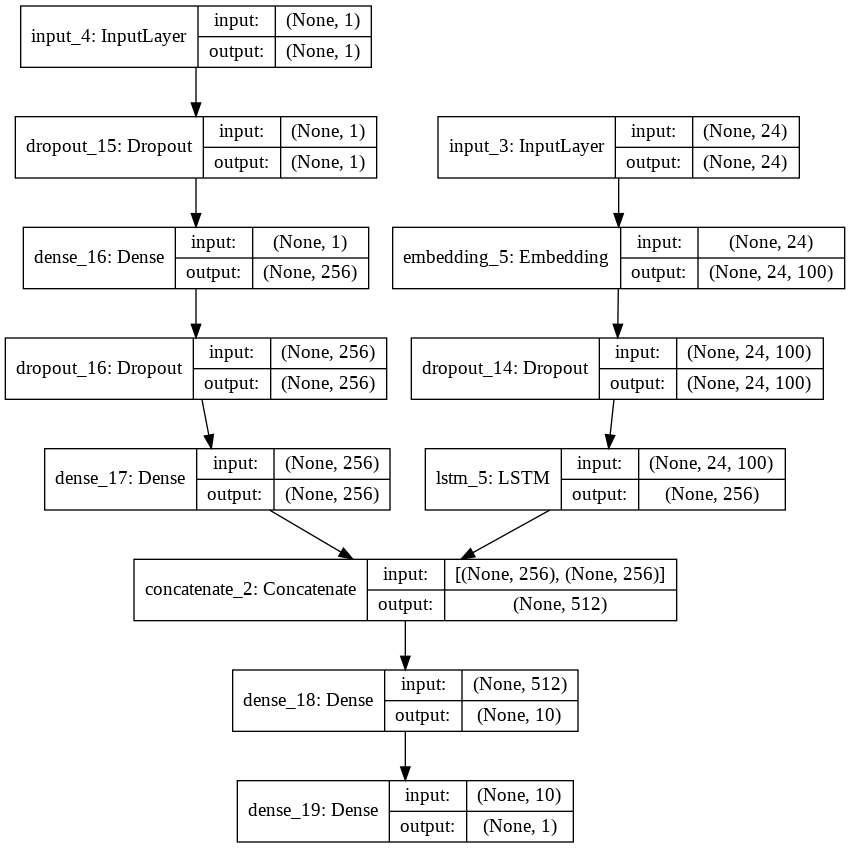

In [ ]:
plot_model(model_cred_mix, 'model_cred_mix.png', show_shapes=True, show_layer_names=True)

In [ ]:
cb_credm=EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=300, restore_best_weights=True)

In [ ]:
history_cred_mix=model_cred_mix.fit(x=[cred2_Xtrain, cred_f_Xtrain], y=cred2_ytrain, batch_size=20, epochs=500, validation_data=([cred2_Xtest, cred_f_Xtest], cred2_ytest), shuffle=True, callbacks=[cb_credm], verbose=1)

Train on 1600 samples, validate on 687 samples
Epoch 1/500
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0983 - accuracy: 0.9613 - val_loss: 0.0283 - val_accuracy: 0.9913
Epoch 2/500
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.0117 - val_accuracy: 0.9971
Epoch 3/500
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.0088 - val_accuracy: 0.9971
Epoch 4/500
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.0145 - val_accuracy: 0.9971
Epoch 5/500
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.0182 - val_accuracy: 0.9971
Epoch 6/500
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0186 - val_accuracy: 0.9971
Epoch 7/500
1600/1600 [==============================] - 4s 2ms/step - loss: 0.0073

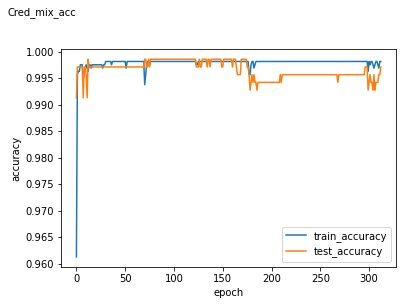

In [ ]:
show_history_acc(history_cred_mix, 'Cred_mix_acc')

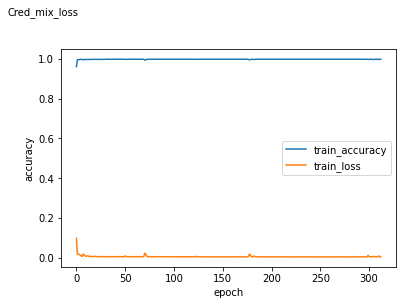

In [ ]:
show_history_loss(history_cred_mix, 'Cred_mix_loss')

After training the neuronal network, the model achieves an accuracy of 0.997. After filtering the values above and below of 0.5, the 'fake news' obtain a precision of 0.99 and a recall of 1 too and the `real news` obtain a precision of 1 and recall of 1. The model's AUC is equal to 0.5. It is important to repeat that this neuronal network with mixed data was not trained with the resampled data set and this can explain its low performance.

In [ ]:
scores_cred_mix={}
score_best_cred_mix = model_cred_mix.evaluate(x=[cred2_Xtrain, cred_f_Xtrain], y = cred2_ytrain, verbose=0)
scores_cred_mix["Mix_cred_finetuned"] = score_best_cred_mix
print('Test loss:', score_best_cred_mix[0])
print('Test accuracy:', score_best_cred_mix[1])

Test loss: 0.005775969238238758
Test accuracy: 0.9975000023841858


In [ ]:
credm_predict = model_cred_mix.predict([cred2_Xtest, cred_f_Xtest])

In [ ]:
credm_predict[0:10]

array([[9.9996841e-01],
       [9.9941146e-01],
       [9.9982244e-01],
       [3.8366450e-04],
       [6.2378094e-04],
       [9.9999666e-01],
       [9.9998522e-01],
       [9.9999702e-01],
       [9.9999702e-01],
       [2.5478186e-04]], dtype=float32)

In [ ]:
#credf_predict = model_credf.predict(cred_f_Xtest)
credm_predict = (credm_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(cred_f_ytest, credm_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      1.00      1.00       607

    accuracy                           1.00       687
   macro avg       0.99      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



In [ ]:
confusion_matrix(cred_f_ytest, credm_predict)

array([[ 80,   0],
       [  1, 606]])

In [ ]:
fpr_credm, tpr_credm, thresholds_credm = roc_curve(cred_f_ytest, MyBestModelcredf_target_pred)

In [ ]:
auc_credm = auc(fpr_credm, tpr_credm)
auc_credm

0.5

**ROC-curve**

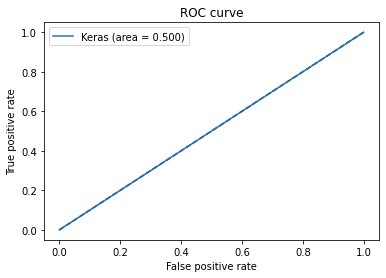

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_credm, tpr_credm, label='Keras (area = {:.3f})'.format(auc_credm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Resampling the mixed data model**

Next the whole data set `CRED` was resampled with the random oversampling strategy. However, it was important to  resample the whole data at the same time in roder to be sure that the data of each row was resampled with all its pairs from the other items to be able to use the function `split_data()` (which also gives a shuffle to the data) on it. Therefore, the padded matrix was converted to a data frame and subsequently the data set with the item `is_face` was appended to it. Next, the resulting data frame was resampled having the item `label` as target variable and using the function `ros()` on it. The output is a numpy array.

In [ ]:
cred_slicetx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_name  2287 non-null   object
 1   tweet_id     2287 non-null   object
 2   label        2287 non-null   int64 
 3   text         2287 non-null   object
 4   pictures     2287 non-null   object
 5   is_face      2287 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 107.3+ KB


In [ ]:
faces_cred = cred_slicetx3.is_face

In [ ]:
faces_cred.describe()

count    2287.000000
mean        0.348491
std         0.476597
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_face, dtype: float64

In [ ]:
print(faces_cred.shape)
print(padded_cred_total.shape)

(2287,)
(2287, 24)


In [ ]:
X_credm = pd.DataFrame(padded_cred_total)

In [ ]:
X_credm1 = pd.concat([X_credm, faces_cred], keys=[X_credm, faces_cred], axis=1, ignore_index=True)
X_credm1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,489,1047,13,18,19,287,158,22,106,107,13,18,19,196,1,2,1547,1548,0
1,0,0,0,0,0,0,0,693,1048,13,18,19,287,158,22,106,107,13,18,19,601,1,2,1549,0
2,0,0,0,0,0,0,693,1048,13,18,19,287,158,22,106,107,13,18,19,601,1,2,182,1550,0
3,0,0,0,0,0,0,0,0,3,450,419,420,124,92,22,23,332,83,13,1,2,543,1,2,0
4,0,0,0,0,0,0,0,0,0,0,1551,1049,13,18,19,856,22,23,1552,19,857,1553,355,75,1


In [ ]:
ros = RandomOverSampler(random_state=80)
Xros_credm, yros_credm = ros.fit_sample(X_credm1, cred1x_target)
print(Xros_credm[0:10])
print(yros_credm[0:10])

[[   0    0    0    0    0    0  489 1047   13   18   19  287  158   22
   106  107   13   18   19  196    1    2 1547 1548    0]
 [   0    0    0    0    0    0    0  693 1048   13   18   19  287  158
    22  106  107   13   18   19  601    1    2 1549    0]
 [   0    0    0    0    0    0  693 1048   13   18   19  287  158   22
   106  107   13   18   19  601    1    2  182 1550    0]
 [   0    0    0    0    0    0    0    0    3  450  419  420  124   92
    22   23  332   83   13    1    2  543    1    2    0]
 [   0    0    0    0    0    0    0    0    0    0 1551 1049   13   18
    19  856   22   23 1552   19  857 1553  355   75    1]
 [   0    0    0    0    0    0    0    0    0    0    0  390   13   18
    19   22   23    1    2  858 1050 1554  694  695    0]
 [   0    0    0    0    0    0    0    0    0    0  106  107  207 1555
   159 1556   13   18   19   22   23    1    2 1557    0]
 [   0    0    0    0    0    0    0    0   26   13   18   19   29   23
    22  160  172  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(sorted(Counter(yros_credm).items()))

[(0, 249), (1, 249)]


In [ ]:
Xros_credm_train, Xros_credm_test, yros_credm_train, yros_credm_test = split_data(Xros_credm, yros_credm)

In [ ]:
print(Xros_credm_train.shape)
print(Xros_credm_test.shape)
print(yros_credm_train.shape)
print(yros_credm_test.shape)

(2853, 25)
(1223, 25)
(2853,)
(1223,)


**Face / No face**

Once the data was resampled and split, both the train and test set were converted to a data frame. Next, only the last column of both sets (containing the item `is_face`) was saved in order to use it as an inputfor the neuronal network.

In [ ]:
#Xros_credmf_train=mixed and face
Xros_credmf_train = pd.DataFrame(Xros_credm_train)
Xros_credmf_test = pd.DataFrame(Xros_credm_test)
Xros_credmf_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,4041,4042,1210,342,246,206,98,8,4,20,9,111,342,4043,1,2,4044,4045,1
1,0,0,0,0,0,0,0,0,0,3,262,277,127,212,72,328,96,37,250,145,1,2,339,340,0
2,0,0,0,0,0,0,0,3,1405,10,11,5,174,54,447,27,1,2,67,1406,1,2,672,1407,1
3,0,0,0,0,0,0,0,0,3,253,52,51,102,103,199,148,55,142,1,2,264,44,225,194,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1773,13,18,19,22,23,1,2,1774,165,0


In [ ]:
print(Xros_credmf_train.shape)
print(Xros_credmf_test.shape)

(2853, 25)
(1223, 25)


In [ ]:
Xros_credmf_train = Xros_credmf_train.iloc[:, -1]
Xros_credmf_test = Xros_credmf_test.iloc[:, -1]
Xros_credmf_train.head()

0    1
1    0
2    1
3    0
4    0
Name: 24, dtype: int64

In [ ]:
Xros_credmf_train.name = 'is_face'
Xros_credmf_test.name = 'is_face'

In [ ]:
Xros_credmf_train = pd.DataFrame(Xros_credmf_train)
Xros_credmf_test = pd.DataFrame(Xros_credmf_test)

In [ ]:
Xros_credmf_train.head()

,is_face
0,1
1,0
2,1
3,0
4,0


**Tweets**

The rest of the data containing the sequencies with the indexes numbers of the tweets' words were already a numpy array. For this reason only the last value of each array which contained the value of the data set `is_face` was dropped.

In [ ]:
Xros_credt_train = Xros_credm_train[:, :-1]
Xros_credt_test = Xros_credm_test[:, :-1]
Xros_credt_train[0:10]

array([[   0,    0,    0,    0,    0,    0, 4041, 4042, 1210,  342,  246,
         206,   98,    8,    4,   20,    9,  111,  342, 4043,    1,    2,
        4044, 4045],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    3,  262,
         277,  127,  212,   72,  328,   96,   37,  250,  145,    1,    2,
         339,  340],
       [   0,    0,    0,    0,    0,    0,    0,    3, 1405,   10,   11,
           5,  174,   54,  447,   27,    1,    2,   67, 1406,    1,    2,
         672, 1407],
       [   0,    0,    0,    0,    0,    0,    0,    0,    3,  253,   52,
          51,  102,  103,  199,  148,   55,  142,    1,    2,  264,   44,
         225,  194],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3, 1773,   13,   18,   19,   22,   23,    1,    2,
        1774,  165],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   58,   26,   10,   11,   48,   66,   41,    5,    1,    2,
       

In [ ]:
print(Xros_credt_train.shape)
print(Xros_credt_test.shape)
print(len(yros_credm_train))
print(len(yros_credm_test))

(2853, 24)
(1223, 24)
2853
1223


**Model test**

Now, the exact previous neuronal network model for multiple inputs is defined, fed with the oversampled data and trained withe 500 epochs using also the callbacks with a patience for 300 epochs.

In [ ]:
history_cred_mix=model_cred_mix.fit(x=[Xros_credt_train, Xros_credmf_train], y=yros_credm_train, batch_size=20, epochs=500, validation_data=([Xros_credt_test, Xros_credmf_test], yros_credm_test), shuffle=True, callbacks=[cb_credm], verbose=1)

Train on 2853 samples, validate on 1223 samples
Epoch 1/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0329 - accuracy: 0.9919 - val_loss: 0.0179 - val_accuracy: 0.9910
Epoch 2/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 3/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0114 - val_accuracy: 0.9975
Epoch 4/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0120 - val_accuracy: 0.9975
Epoch 5/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0110 - val_accuracy: 0.9975
Epoch 6/500
2853/2853 [==============================] - 8s 3ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0104 - val_accuracy: 0.9975
Epoch 7/500
2853/2853 [==============================] - 7s 3ms/step - loss: 0.003

After training the neuronal network, the model achieves an accuracy of 0.996 which is practically equal to the resulting accuracy of the model with the inbalanced data. After filtering the values above and below of 0.5, the 'fake news' obtain a precision of 1 and a recall of 1 too and the `real news` obtain a precision of 1 and recall of 1. The model's AUC is equal to 0.99.

In [ ]:
scores_cred_mix={}
scores_best_credm_mix = model_cred_mix.evaluate(x=[Xros_credt_train, Xros_credmf_train], y=yros_credm_train, verbose=0)
scores_cred_mix["Mix_cred_finetuned"] = scores_best_credm_mix
print('Test loss:', scores_best_credm_mix[0])
print('Test accuracy:', scores_best_credm_mix[1])

Test loss: 0.021725355973151252
Test accuracy: 0.9964948892593384


In [ ]:
credr_predict = model_cred_mix.predict([Xros_credt_test, Xros_credmf_test])

In [ ]:
credr_predict[0:10]

array([[9.0754780e-05],
       [9.9974686e-01],
       [1.6427755e-04],
       [8.9657624e-06],
       [9.9999988e-01],
       [9.9999988e-01],
       [9.9999952e-01],
       [9.9999881e-01],
       [5.4090055e-05],
       [4.0502879e-01]], dtype=float32)

In [ ]:
credr_predict = (credr_predict>0.5)
print('\nClassification report RandomOverSampling:\n', classification_report(yros_credm_test, credr_predict))


Classification report RandomOverSampling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       613
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1223
   macro avg       1.00      1.00      1.00      1223
weighted avg       1.00      1.00      1.00      1223



In [ ]:
confusion_matrix(yros_credm_test, credr_predict)

array([[613,   0],
       [  2, 608]])

In [ ]:
fpr_credmr, tpr_credmr, thresholds_credmr = roc_curve(yros_credm_test, credr_predict)

In [ ]:
auc_credmr = auc(fpr_credmr, tpr_credmr)
auc_credmr

0.9983606557377049

In [ ]:
model_cred_mix.save('model_credros_mix.hdf5')

**ROC-curve**

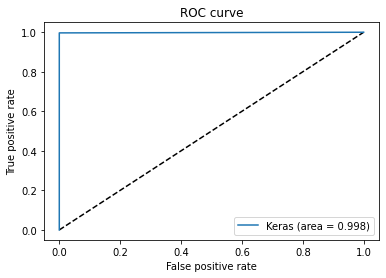

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_credmr, tpr_credmr, label='Keras (area = {:.3f})'.format(auc_credmr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##'Pheme'

The first step with this data set was to explore and clean the data in order to make it readable.

**Data exploration and data cleaning**

In [ ]:
Pheme.head()

,Event,Thread ID,Tweet ID,Support/denial,Evidentiality,Certainty
0,putinmissing,577258317942149000,577258317942149000,supporting,url-given,somewhat-certain}
1,putinmissing,576755174531863000,576755174531863000,supporting,url-given,somewhat-certain}
2,putinmissing,576319832800555000,576319832800555000,supporting,url-given,somewhat-certain}
3,putinmissing,576513463738110000,576513463738110000,denying,url-given,certain}
4,charliehebdo,552783667052167000,552783667052167000,supporting,url-given,certain}


In [ ]:
Pheme.columns = ['Event', 'Thread_ID', 'Tweet_ID', 'Support_denial', 'Evidentiality', 'Certainty']

In [ ]:
Pheme.shape

(289, 6)

In [ ]:
print(Pheme.Event.value_counts())

charliehebdo         74
sydneysiege          71
ottawashooting       56
ferguson             42
germanwings-crash    25
prince-toronto       12
putinmissing          9
Name: Event, dtype: int64


After conducting a preliminar data exploration I came to the conclusion that some values of the data set needed to be cleaned because they had a bracket in common. At the same time the values were mixed up and were placed in the wrong columns. For this reason, the function `replace_cbracketr` removed these brackets and the function `fix_cert` placed the values in the correct columns.

In [ ]:
def replace_cbracketr(value):
    value_as_string = str(value)
    return value_as_string.replace("}", '')

In [ ]:
Pheme = Pheme.applymap(replace_cbracketr)

In [ ]:
print(Pheme.Support_denial.value_counts())

certain             111
supporting          105
somewhat-certain     57
uncertain            10
denying               6
Name: Support_denial, dtype: int64


In [ ]:
Pheme.shape

(289, 6)

In [ ]:
def fix_cert(dataf):
  d = ['Event', 'Thread_ID', 'Tweet_ID', 'Support_denial', 'Evidentiality', 'Certainty']

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['supporting'])]
  dataf = dataf[dataf.Certainty != 'supporting']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['url-given'])]
  dataf = dataf[dataf.Certainty != 'url-given']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)
  
  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['witnessed'])]
  dataf = dataf[dataf.Certainty != 'witnessed']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['source-quoted'])]
  dataf = dataf[dataf.Certainty != 'source-quoted']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['no-evidence'])]
  dataf = dataf[dataf.Certainty != 'no-evidence']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['unverifiable-source-quoted'])]
  dataf = dataf[dataf.Certainty != 'unverifiable-source-quoted']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['reasoning'])]
  dataf = dataf[dataf.Certainty != 'reasoning']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['picture-attached'])]
  dataf = dataf[dataf.Certainty != 'picture-attached']
  dataf1['Support_denial1'] = dataf1['Evidentiality']
  dataf1['Evidentiality1'] = dataf1['Certainty']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['denying'])]
  dataf = dataf[dataf.Certainty != 'denying']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)
  
  dataf1 = dataf.loc[dataf.loc[:, 'Support_denial'].isin(['certain'])]
  dataf = dataf[dataf.Support_denial != 'certain']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)
  
  dataf1 = dataf.loc[dataf.loc[:, 'Support_denial'].isin(['somewhat-certain'])]
  dataf = dataf[dataf.Support_denial != 'somewhat-certain']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Support_denial'].isin(['uncertain'])]
  dataf = dataf[dataf.Support_denial != 'uncertain']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['underspecified'])]
  dataf = dataf[dataf.Certainty != 'underspecified']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  dataf1 = dataf.loc[dataf.loc[:, 'Certainty'].isin(['supporting'])]
  dataf = dataf[dataf.Certainty != 'supporting']
  dataf1['Support_denial1'] = dataf1['Certainty']
  dataf1['Evidentiality1'] = dataf1['Evidentiality']
  dataf1['Certainty1'] = dataf1['Support_denial']
  dataf1 = dataf1.drop(['Support_denial', 'Evidentiality', 'Certainty'], axis=1)
  dataf1.columns = d
  dataf = pd.concat([dataf, dataf1], keys=['dataf', 'dataf1'], axis=0, ignore_index=True)

  return dataf

In [ ]:
x = Pheme1.loc[Pheme1.loc[:, 'Support_denial'].isin(['underspecified'])]
x

,Event,Thread_ID,Tweet_ID,Support_denial,Evidentiality,Certainty
276,putinmissing,576323086888362000,576323086888362000,underspecified,source-quoted,certain
277,charliehebdo,553575232867672000,553575232867672000,underspecified,url-given,certain
278,charliehebdo,553461741917864000,553461741917864000,underspecified,url-given,certain
279,ferguson,500284699546518000,500284699546518000,underspecified,reasoning,certain
280,germanwings-crash,580332109782467000,580332109782467000,underspecified,source-quoted,certain
281,ferguson,500303431928922000,500303431928922000,underspecified,no-evidence,somewhat-certain
282,ferguson,500308076004930000,500308076004930000,underspecified,unverifiable-source-quoted,somewhat-certain
283,ferguson,500332933098385000,500332933098385000,underspecified,unverifiable-source-quoted,somewhat-certain
284,prince-toronto,529716453792956000,529716453792956000,underspecified,url-given,uncertain
285,prince-toronto,529687410611728000,529687410611728000,underspecified,url-given,uncertain


In [ ]:
Pheme1 = fix_cert(Pheme)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
Pheme1.shape

(289, 6)

In [ ]:
Pheme1.head()

,Event,Thread_ID,Tweet_ID,Support_denial,Evidentiality,Certainty
0,putinmissing,577258317942149000,577258317942149000,supporting,url-given,somewhat-certain
1,putinmissing,576755174531863000,576755174531863000,supporting,url-given,somewhat-certain
2,putinmissing,576319832800555000,576319832800555000,supporting,url-given,somewhat-certain
3,putinmissing,576513463738110000,576513463738110000,denying,url-given,certain
4,charliehebdo,552783667052167000,552783667052167000,supporting,url-given,certain


In [ ]:
print(Pheme1.Support_denial.value_counts())

supporting        269
underspecified     11
denying             9
Name: Support_denial, dtype: int64


In [ ]:
print(Pheme1.Evidentiality.value_counts())

url-given                     177
witnessed                      40
source-quoted                  27
unverifiable-source-quoted     20
no-evidence                    16
reasoning                       7
picture-attached                2
Name: Evidentiality, dtype: int64


In [ ]:
print(Pheme1.Certainty.value_counts())

certain             200
somewhat-certain     77
uncertain            10
underspecified        2
Name: Certainty, dtype: int64


Subsequently, I mapped the scores in the item `Certainty` to 1 if it was **certain** and 0 if it contained any other score and storaged the whole normalized scores in the new column `label`.

In [ ]:
Pheme1['label'] = Pheme1.Certainty.map({'certain': 1, 'somewhat-certain': 0, 'uncertain': 0, 'underspecified': 0})
Pheme1.head()

,Event,Thread_ID,Tweet_ID,Support_denial,Evidentiality,Certainty,label
0,putinmissing,577258317942149000,577258317942149000,supporting,url-given,somewhat-certain,0
1,putinmissing,576755174531863000,576755174531863000,supporting,url-given,somewhat-certain,0
2,putinmissing,576319832800555000,576319832800555000,supporting,url-given,somewhat-certain,0
3,putinmissing,576513463738110000,576513463738110000,denying,url-given,certain,1
4,charliehebdo,552783667052167000,552783667052167000,supporting,url-given,certain,1


In [ ]:
print(Pheme1.label.value_counts())

1    200
0     89
Name: label, dtype: int64


**Twitter API**

Here I streamed the list containing the tweets' IDs of the data set with the function `getMessages2()` in order to download the tweets' content.

In [ ]:
Phemet = list(Pheme1.Tweet_ID)

In [ ]:
len(Phemet)

289

In [ ]:
Phemet

['577258317942149000',
 '576755174531863000',
 '576319832800555000',
 '576513463738110000',
 '552783667052167000',
 '552793679082312000',
 '553548567420629000',
 '552832817089237000',
 '552833028201144000',
 '553184482241815000',
 '553534838880608000',
 '553512735192142000',
 '552834961762710000',
 '553197863971611000',
 '552792802309181000',
 '553586860334010000',
 '553486439129039000',
 '552848620375261000',
 '553588178687656000',
 '553518472798683000',
 '553503184174711000',
 '552805488631759000',
 '553506608203170000',
 '553221600955621000',
 '553549686129562000',
 '552792913910833000',
 '552996335319007000',
 '552806309540528000',
 '553550301886956000',
 '529660296080917000',
 '500295393301647000',
 '500278045597368000',
 '499612545909416000',
 '500279189405434000',
 '500341884678836000',
 '500270780832174000',
 '500319801344930000',
 '499530130487018000',
 '500298752469770000',
 '500327120770302000',
 '500394061887709000',
 '500377145349521000',
 '500381163866063000',
 '500258409

In [ ]:
PhemeMess1 = [getMessages2(x) for x in Phemet]

In [ ]:
PhemeMess1

['suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'susp

Unfortunately, the API only downloaded the content of 1 from the 289 tweet IDs of this data set. For this reason, I decided to disregard this data set.

In [ ]:
PhemeMess1.count('suspended')

288

In [ ]:
text = pd.DataFrame(PhemeMess1)
text.head()

,0
0,suspended
1,suspended
2,suspended
3,suspended
4,suspended


In [ ]:
Pheme1['text'] = text
Pheme1.head()

,Event,Thread_ID,Tweet_ID,Support_denial,Evidentiality,Certainty,label,text
0,putinmissing,577258317942149000,577258317942149000,supporting,url-given,somewhat-certain,0,suspended
1,putinmissing,576755174531863000,576755174531863000,supporting,url-given,somewhat-certain,0,suspended
2,putinmissing,576319832800555000,576319832800555000,supporting,url-given,somewhat-certain,0,suspended
3,putinmissing,576513463738110000,576513463738110000,denying,url-given,certain,1,suspended
4,charliehebdo,552783667052167000,552783667052167000,supporting,url-given,certain,1,suspended


In [ ]:
Pheme1.to_csv('Pheme1.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
PhemeMess

['suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'suspended',
 'susp

In [ ]:
PhemeDir = PhemeDir.iloc[:, 1:]
PhemeDir = PhemeDir.iloc[1:, :]
PhemeDir.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Event,NaN,Thread ID,NaN,Tweet ID,NaN,NaN,NaN,NaN,NaN,NaN
1,putinmissing,NaN,577258317942149000,NaN,577260238316831000,responsetype-vs-source,comment},NaN,NaN,NaN,NaN
2,putinmissing,NaN,577258317942149000,NaN,577282462788678000,responsetype-vs-source,comment},NaN,NaN,NaN,NaN
3,putinmissing,NaN,577258317942149000,NaN,577283431089902000,responsetype-vs-source,comment},NaN,NaN,NaN,NaN
4,putinmissing,NaN,577258317942149000,NaN,577284294051123000,responsetype-vs-source,comment},NaN,NaN,NaN,NaN


I looked at some of the exceptions that resulted when the API downloaded the tweets' status in depth. For example in the case of the status ID 552783667052167000 that returned the message "No status found with that ID."

In [ ]:
api.get_status(552783667052167000)

TweepError: ignored

In [ ]:
PhemeDir = PhemeDir.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10'], axis=1)

In [ ]:
PhemeDir.shape

(2505, 8)

In [ ]:
PhemeDir.iloc[:, 5].value_counts()

url-given}                      160
witnessed}                      158
appeal-for-more-information}    124
agreed}                         111
source-quoted}                  107
no-evidence}                     87
picture-attached}                52
disagreed}                       42
unverifiable-source-quoted}      32
reasoning}                       16
Name: Unnamed: 11, dtype: int64

In [ ]:
PhemeDir.columns = ['Event', 'Thread_ID', 'Tweet_ID', 'Support_denial', 'Certainty', 'Evidentiality']

In [ ]:
PhemeDir.head()

,Event,Thread_ID,Tweet_ID,Support_denial,Certainty,Evidentiality
1,putinmissing,577258317942149000,577260238316831000,comment},NaN,NaN
2,putinmissing,577258317942149000,577282462788678000,comment},NaN,NaN
3,putinmissing,577258317942149000,577283431089902000,comment},NaN,NaN
4,putinmissing,577258317942149000,577284294051123000,comment},NaN,NaN
5,putinmissing,577258317942149000,577287160329466000,comment},NaN,NaN


In [ ]:
PhemeDirM = list(PhemeDir.Tweet_ID)

In [ ]:
PhemeDirMT = getMessages(PhemeDirM)

In [ ]:
len(PhemeDirMT)

2504

In [ ]:
PhemeDirMT.count('suspended')

2501

##Twitter API

At the beginning I used only few Twitter tweet IDs of the data set `bintweets` in order to learn how to download the corresponding text. Subsequently, I streamed the Twitter API's commands in order to download the texts and to append them to a list in order to be able to transform the next to a data frame that could be appended to the dat set.

In [ ]:
bintweets.head

<bound method NDFrame.head of            user_id            tweet_id  label
0       1495729418  713291759388921857      1
1       4759224608  714837313960878080      1
2         61482996  709767014018056192      1
3         41767207  714280648555372545      1
4        428221173  712533209234464769      1
...            ...                 ...    ...
131579  3686112494  710515264085823488      0
131580   582562920  714074815288754176      0
131581   118351622  710370744396595200      0
131582   292359937  711791682610733056      0
131583  2150693388  711790088363978752      0

[131584 rows x 3 columns]>

In [ ]:
binmess=list(bintweets.tweet_id)

In [ ]:
binmessls=binmess[0:9]
print(binmessls)

[713291759388921857, 714837313960878080, 709767014018056192, 714280648555372545, 712533209234464769, 710288599288307716, 711598873098190849, 714093571708682241, 713875780036665344]


In [ ]:
statusls = []
for status in binmessls:
  x = api.get_status(status)
  statusls.append(x.text)
print(statusls)

['@business A Korean-American man detained in North Korea has reportedly confessed to trying… https://t.co/u1pu0gCNLM', 'The chart that proves that Spanish schedules are downright weird https://t.co/MNPUJkiJdQ via @el_pais', '@pammaysmcdonald @chesterbadger3 @docrocktex26 @NPR Meanwhile,culture &amp; economic shifts left both irrelevant,but still sizeable demographics', '@htTweets Do members of these two parties allow their members to marry members of the other party? Hypocrisy is dominant and rules', 'Cuando Antonio Vega voló en solitario https://t.co/ja6APXXnyP vía @el_pais', 'RT @el_pais: 30 años después, en Chernóbil los niños hacen cola para pasar el control de radiación https://t.co/g5DnhLvX3f En @elpaissemanal', 'RT @allthingsvr: Can virtual reality cure phobias? via @guardian https://t.co/oYRRx6cEA9 https://t.co/830nd6NCQR', 'RT @clarincom: 10 paisajes secretos de la Argentina https://t.co/iHyi0hx3PL', "@leightonhealey @globeandmail I'd say so but I'm biased :-) There are deals

In [ ]:
binids=list(bintweets.user_id)

In [ ]:
binidls = binids[0:9]
print(binidls)

[1495729418, 4759224608, 61482996, 41767207, 428221173, 565073957, 3296322931, 477962215, 34260642]


In [ ]:
photo1 = set()
test1 = ''
photolist = []
name = ''

for i in binidls:
  photo1 = api.get_user(user_id=i)
  if (photo1.profile_image_url_https.find('_normal.png') != -1):
    test1 = photo1.profile_image_url_https.replace('_normal.png', '.png')
    name = str(wget.download(test1))
    photolist.append(name)
    print(test1)
  elif (photo1.profile_image_url_https.find('_normal.jpeg') != -1):
    test1 = photo1.profile_image_url_https.replace('_normal.jpeg', '.jpeg')
    name = str(wget.download(test1))
    photolist.append(name)
    print(test1)
  elif (photo1.profile_image_url_https.find('_normal.jpg') != -1):
    test1 = photo1.profile_image_url_https.replace('_normal.jpg', '.jpg')
    name = str(wget.download(test1))
    photolist.append(name)
    print(test1)
  else:
    test1 = photo1.profile_image_url_https
    name = str(wget.download(test1))
    photolist.append(name)
    print(photo1.profile_image_url_https)

https://pbs.twimg.com/profile_images/414041895086858240/q3thcXo4.jpeg
https://pbs.twimg.com/profile_images/775912624148115457/kTLOhmak.jpg
https://pbs.twimg.com/profile_images/395769781/P9015901.jpg
https://pbs.twimg.com/profile_images/3032406310/87e1370bc7f991a905af04d68b1a8b63.jpeg
https://pbs.twimg.com/profile_images/1124021894271963137/OtcyaGot.png
https://pbs.twimg.com/profile_images/1254267723250405378/q3rvhQXI.jpg
https://pbs.twimg.com/profile_images/673992890415124484/WybAvlPH.jpg
https://pbs.twimg.com/profile_images/1071474085761376256/SBBLlXJJ.jpg
https://pbs.twimg.com/profile_images/3359547626/236ccd0e83f65d0f6e326820634e7c18.jpeg


In [ ]:
photo = set()
phototest =''
photo = api.get_user(screen_name='DREHierUndJetzt')
test = photo.profile_image_url_https
print(test)
if (photo.profile_image_url_https.find('_normal.png') != -1):
  phototest = photo.profile_image_url_https.replace('_normal.png', '.png')
  print(phototest)
else:
  print('was not found')

print(phototest)

https://pbs.twimg.com/profile_images/1131969258014089222/cFpJqmzX_normal.png
https://pbs.twimg.com/profile_images/1131969258014089222/cFpJqmzX.png
https://pbs.twimg.com/profile_images/1131969258014089222/cFpJqmzX.png


In [ ]:
photolist

['q3thcXo4.jpeg',
 'kTLOhmak.jpg',
 'P9015901.jpg',
 '87e1370bc7f991a905af04d68b1a8b63.jpeg',
 'OtcyaGot.png',
 'q3rvhQXI.jpg',
 'WybAvlPH.jpg',
 'SBBLlXJJ.jpg',
 '236ccd0e83f65d0f6e326820634e7c18.jpeg']

In [ ]:
phototest

'https://pbs.twimg.com/profile_images/1131969258014089222/cFpJqmzX.png'

In [ ]:
imagePath = str(wget.download(phototest))
imagePath

'cFpJqmzX.png'

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text)

RT @3501502: @Noelleal No llores por mi ... chile.
RT @RealJamesWoods: Don’t be stupid. #Trump2020 https://t.co/nyu5AY4Anb
RT @DanielSanin: Será que @VickyDavilaH nos hace el favor y también nos publica los expedientes de los que se robaron la salud, la ESAP y d…
Hay un país por recuperar una Nación por construir. https://t.co/LC4KdmYW3S
RT @maosilv: Otro líder social y catedrático de la paz masacrado por las https://t.co/ve6Ve5OnwY. ¿Hasta cuando @IvanDuque? Señor @IvanCepe…
RT @ELNODOColombia: Los $409 millones y los casos de corrupción de la Comisión de la Verdad https://t.co/MvNSZADFus https://t.co/cHwhZfDY0T
RT @Alexandvilla129: @GiuseppeNoc Y sobre todo, antes de buscar una vacuna.
RT @ValenciaGuille8: @CeciliaFdezdeC @FiscaliaCol https://t.co/2Vls6MP5Eg
RT @uribista481: @ArielAnaliza Y usted estaba hablando con el camarada Uriel cuando llegó  el @COL_EJERCITO o por qué  tanto detalle?
"NOT A RACIST" Black Pastors PRAY and DEFEND President Trump In Atlanta https://t.co/EjOCo7rSB8

##Face recognition with CV2

The functions `isFace` and `isFace2` look up for the pictures storaged in the memory, decode them and implement the cascades that were downloaded from the repo of Tiwari (2017a) in order to recognize whether the pictures include a face or not. If a picture does, the function draws a rectangle on the face, and if it does not, it does not manipulate the picture. `isFace` either returns a 1 or a 0 if the picture contains a face or not and can be streamed. `isFace2` looks for a list of pictures at the same time and appends a 1 to a list if a pictures contains a face and appends a 0 if it does not. Subsequently it returns the list with the results.

In [ ]:
def isFace(imagepath):
    resultint = 0
    if imagepath == 'suspended':
      resultint = 'suspended'
    else:
      try:
        image = cv2.imread(imagepath)
        faceCascade = cv2.CascadeClassifier('/content/FaceDetect/haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier('/content/FaceDetect/haarcascade_eye.xml')
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
          grayImage,
          scaleFactor=1.2,
          minNeighbors=5,
          minSize=(30, 30)
        )

        for (x, y, w, h) in faces:
          if (cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2).any() == True):
            resultint = 1
          elif (cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2).any() == False):
            resultint = 0
      except:
        resultint = 'photo_with_space'
        pass
    return resultint

In [ ]:
def isFace2(path_list):
  f_list = []
  for i in path_list:
    if i == 'suspended':
      f_list.append('suspended')
    else:
      try:
        image = cv2.imread(i)
        faceCascade = cv2.CascadeClassifier('/content/FaceDetect/haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier('/content/FaceDetect/haarcascade_eye.xml')
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
          grayImage,
          scaleFactor=1.2,
          minNeighbors=5,
          minSize=(30, 30)
        )

        for (x, y, w, h) in faces:
          if (cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2).any() == True):
            f_list.append(1)
          elif (cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2).any() == False):
            f_list.append(0)
      except:
        f_list.append('photo_with_space')
        pass
  return f_list

In [ ]:
result = isFace(imagePath)
result

1

In [ ]:
resultList = []
for i in photolist:
  resultList.append(isFace(i))
print(resultList)

[0, 0, 0, 1, 0, 1, 0, 0, 1]


In [ ]:
result

0

In [ ]:
type(result)

int

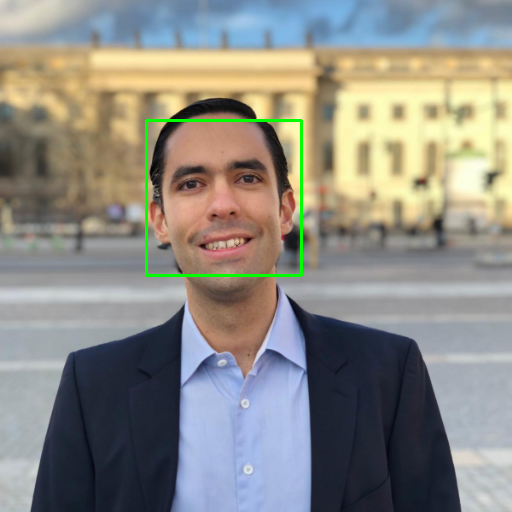

-1

In [ ]:
cv2_imshow(image)
cv2.waitKey(0)